In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [75]:
#READING CLEANED EXCEL FILE
df_cleaned = pd.read_csv("../dataset/carbon_emission_cleaned.csv")

DATASET OVERVIEW

In [76]:
print("Dataset Overview")
print(f"Total records: {df_cleaned.shape[0]}")
print(f"Total features: {df_cleaned.shape[1]}")
print("\nCategorical columns:", list(df_cleaned.select_dtypes(include='category').columns))
print("Numerical columns:", list(df_cleaned.select_dtypes(include='number').columns))
print("\nMissing values:\n", df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])


Dataset Overview
Total records: 2109
Total features: 18

Categorical columns: []
Numerical columns: ['distance_in_km_per_route', 'vehicle_capacity_in_kg', 'load_capacity_in_kg', 'average_speed_in_km_per_hr', 'no_of_stop', 'vehicle_age_in_years', 'adjusted_fuel_efficiency_in_km_litre', 'adjusted_energy_kwh_per_km', 'total_energy_kwh', 'fuel_consumption_in_litre', 'load_factor', 'c02_emission_kg']

Missing values:
 engine_norm_type                         114
adjusted_fuel_efficiency_in_km_litre     567
adjusted_energy_kwh_per_km              1542
total_energy_kwh                        1542
fuel_consumption_in_litre                567
dtype: int64


MISSING VALUE HEATMAP

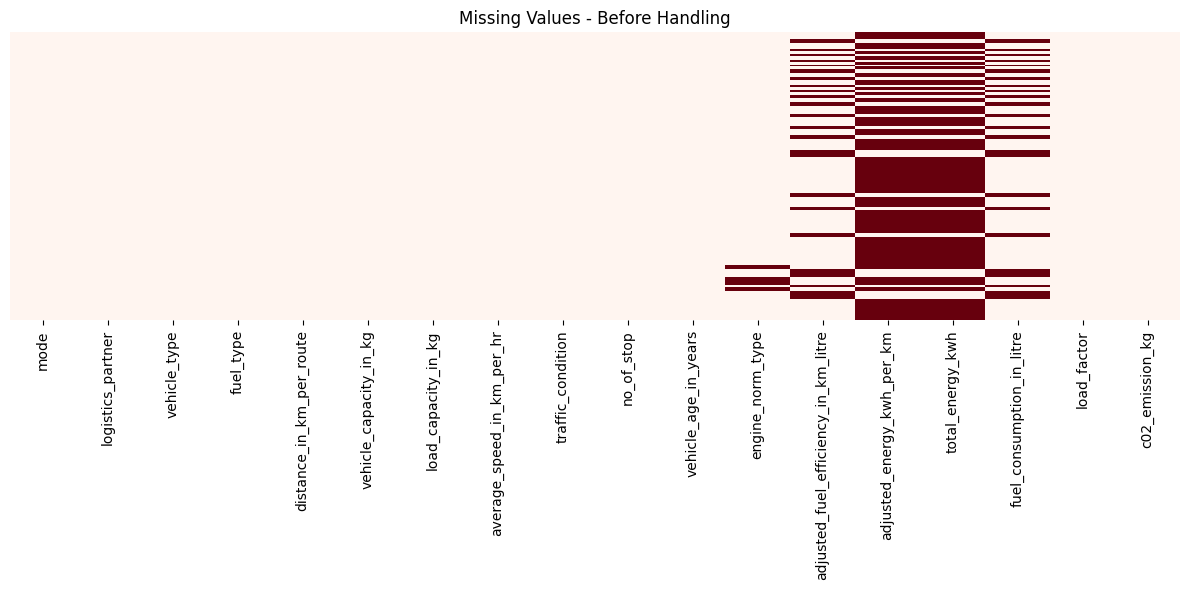

In [77]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing Values - Before Handling")
plt.tight_layout()
plt.show()


In [78]:
#missing value count and percentage
missing_count = df_cleaned.isnull().sum()
missing_percent = (missing_count / len(df_cleaned)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percent})
print("Missing Value Overview:\n", missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False))




Missing Value Overview:
                                       Missing Count  Missing %
adjusted_energy_kwh_per_km                     1542  73.115220
total_energy_kwh                               1542  73.115220
adjusted_fuel_efficiency_in_km_litre            567  26.884780
fuel_consumption_in_litre                       567  26.884780
engine_norm_type                                114   5.405405


In [79]:
# For numerical columns: Fill with median (robust to outliers)
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1026138535.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1026138535.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [80]:
#CATEGORICAL FEATURES
categorical_cols = ['mode', 'logistics_partner', 'vehicle_type', 'fuel_type', 'traffic_condition','engine_norm_type']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

In [81]:
# For categorical columns: Fill with mode
cat_cols = df_cleaned.select_dtypes(include='category').columns
for col in cat_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_val, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\485963344.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_val, inplace=True)


In [82]:
print("\nRemaining missing values after handling:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])


Remaining missing values after handling:
Series([], dtype: int64)


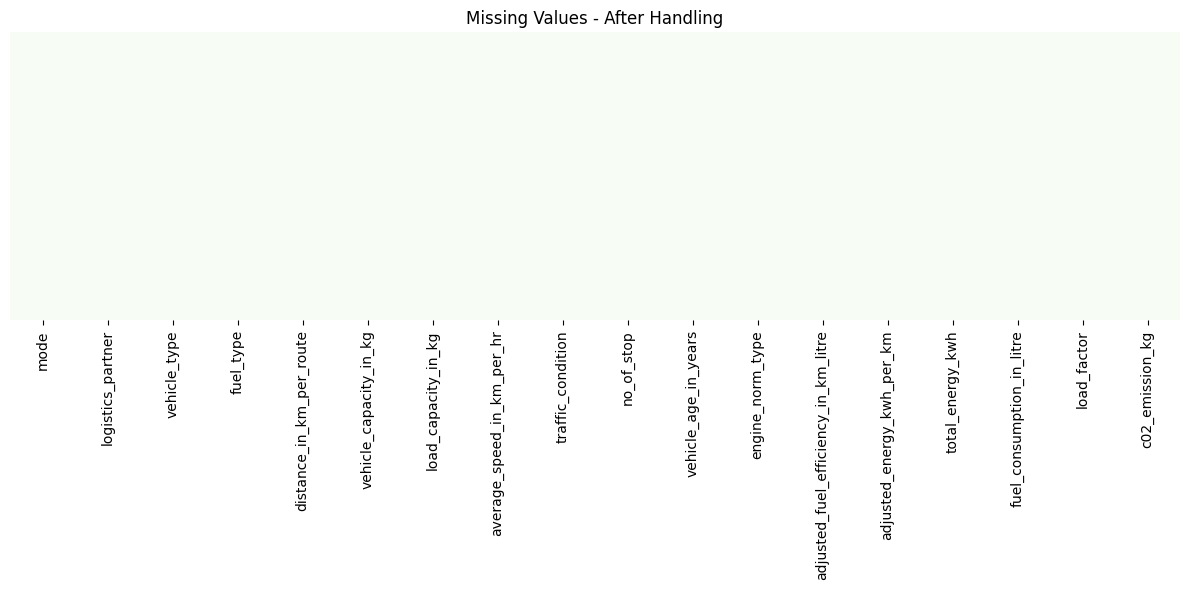

In [83]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="Greens", yticklabels=False)
plt.title("Missing Values - After Handling")
plt.tight_layout()
plt.show()


In [84]:
# OVERALL DESCRIBING DATA
print("Shape of dataset:", df_cleaned.shape)
print("Data types:\n", df_cleaned.dtypes)

Shape of dataset: (2109, 18)
Data types:
 mode                                    category
logistics_partner                       category
vehicle_type                            category
fuel_type                               category
distance_in_km_per_route                   int64
vehicle_capacity_in_kg                   float64
load_capacity_in_kg                      float64
average_speed_in_km_per_hr               float64
traffic_condition                       category
no_of_stop                                 int64
vehicle_age_in_years                       int64
engine_norm_type                        category
adjusted_fuel_efficiency_in_km_litre     float64
adjusted_energy_kwh_per_km               float64
total_energy_kwh                         float64
fuel_consumption_in_litre                float64
load_factor                              float64
c02_emission_kg                          float64
dtype: object


VISUALIZING DATA

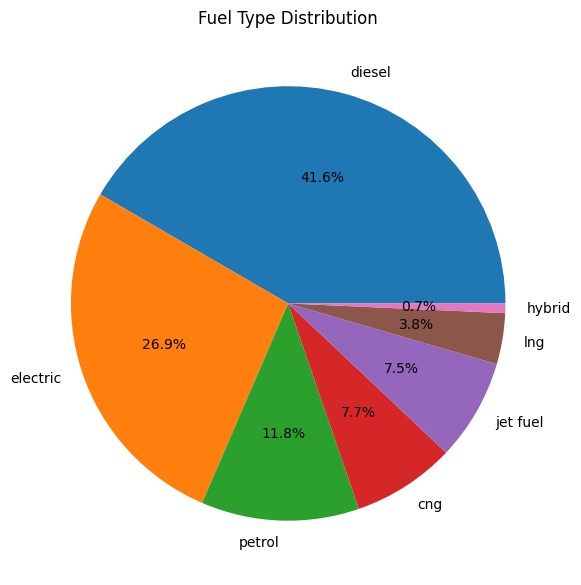

In [85]:
df_cleaned['fuel_type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Fuel Type Distribution')
plt.ylabel("")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\30035411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='vehicle_type', order=df_cleaned['vehicle_type'].value_counts().index, palette='Set3')


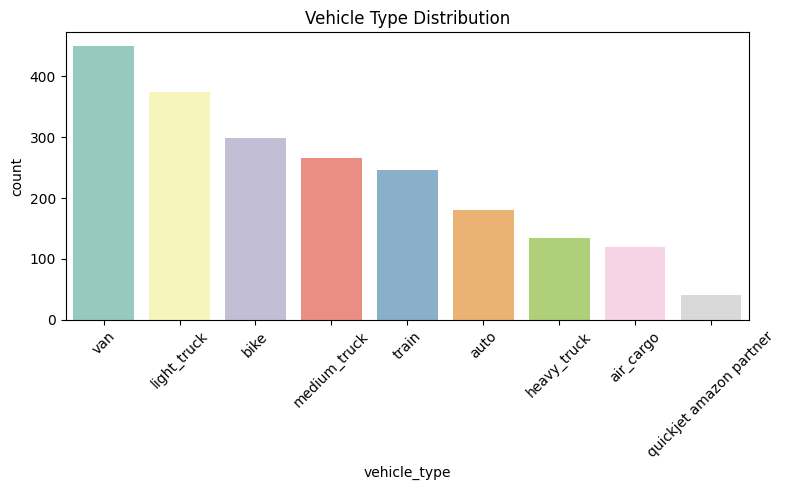

In [86]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='vehicle_type', order=df_cleaned['vehicle_type'].value_counts().index, palette='Set3')
plt.title("Vehicle Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


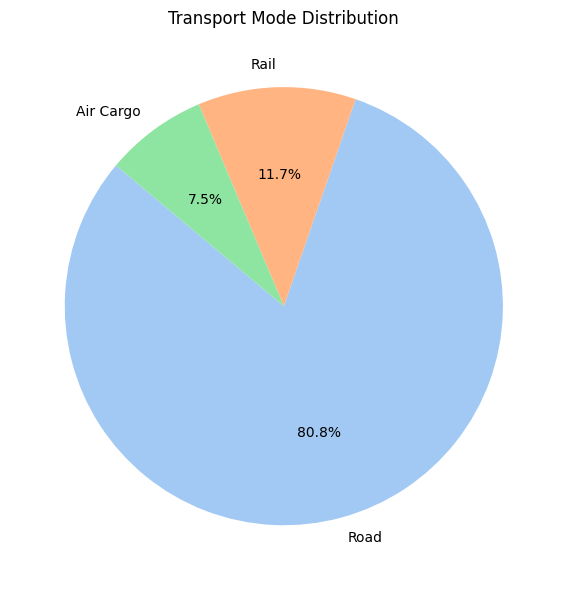

In [87]:
plt.figure(figsize=(6, 6))
df_cleaned['mode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Transport Mode Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\2961873379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='logistics_partner', order=df_cleaned['logistics_partner'].value_counts().index, palette='coolwarm')


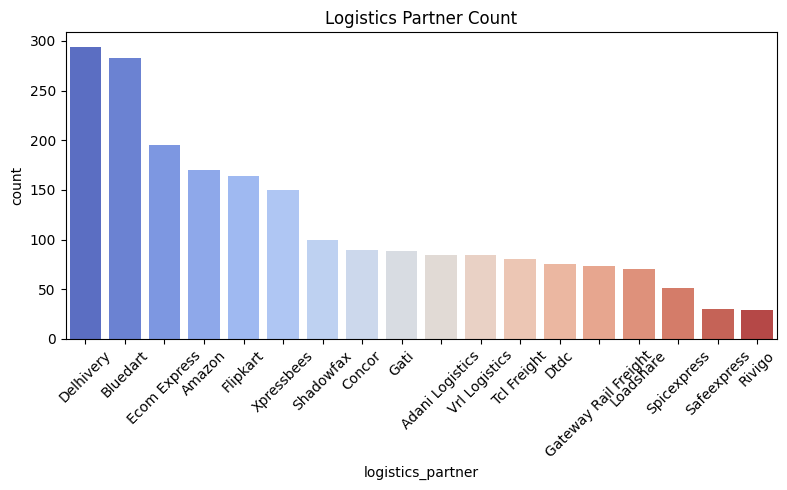

In [88]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='logistics_partner', order=df_cleaned['logistics_partner'].value_counts().index, palette='coolwarm')
plt.title("Logistics Partner Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\3740935458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='traffic_condition', order=df_cleaned['traffic_condition'].value_counts().index, palette='Set2')


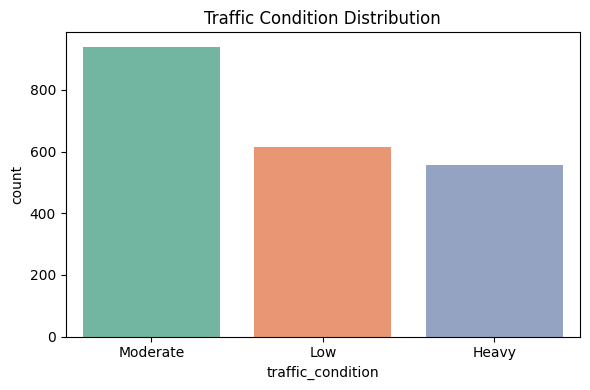

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='traffic_condition', order=df_cleaned['traffic_condition'].value_counts().index, palette='Set2')
plt.title("Traffic Condition Distribution")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1669505219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='engine_norm_type', order=df_cleaned['engine_norm_type'].value_counts().index, palette='cubehelix')


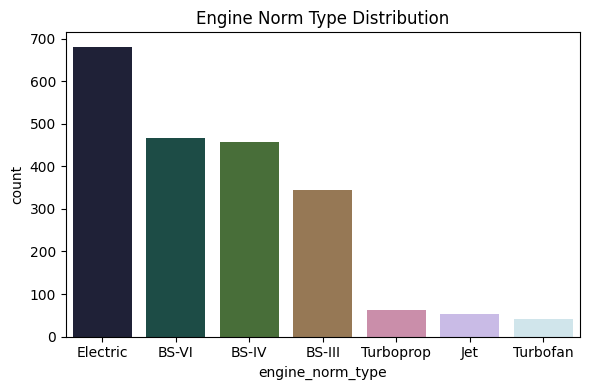

In [90]:
if 'engine_norm_type' in df_cleaned.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x='engine_norm_type', order=df_cleaned['engine_norm_type'].value_counts().index, palette='cubehelix')
    plt.title("Engine Norm Type Distribution")
    plt.tight_layout()
    plt.show()


UNIVARIATE ANALYSIS

In [91]:
#CATEGORICAL FEATURES
categorical_cols = ['mode', 'logistics_partner', 'vehicle_type', 'fuel_type', 'traffic_condition']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

In [92]:
#PRINTING NUMERICAL AND CATEGORICAL DATA
print("\nNumerical Summary:\n", df_cleaned.describe())
print("\nCategorical Summary:\n", df_cleaned.describe(include='category'))


Numerical Summary:
        distance_in_km_per_route  vehicle_capacity_in_kg  load_capacity_in_kg  \
count               2109.000000            2.109000e+03         2.109000e+03   
mean                 280.171645            9.146133e+04         5.893160e+04   
std                  351.683515            3.531117e+05         2.324779e+05   
min                   10.000000            1.300000e+01         1.340000e+01   
25%                   96.000000            6.000000e+02         3.269900e+02   
50%                  142.000000            1.800000e+03         9.000000e+02   
75%                  277.000000            1.200000e+04         6.730000e+03   
max                 2345.000000            1.999344e+06         1.750859e+06   

       average_speed_in_km_per_hr   no_of_stop  vehicle_age_in_years  \
count                 2109.000000  2109.000000           2109.000000   
mean                    87.923561    20.339023              5.989569   
std                    172.731852    20.52

In [93]:
#COUNTING CATEGORICAL DATA
for col in df_cleaned.select_dtypes(include='category').columns:
    print(f"\nValue counts for {col}:\n{df_cleaned[col].value_counts()}")


Value counts for mode:
mode
Road         1704
Rail          246
Air Cargo     159
Name: count, dtype: int64

Value counts for logistics_partner:
logistics_partner
Delhivery               294
Bluedart                283
Ecom Express            195
Amazon                  170
Flipkart                164
Xpressbees              150
Shadowfax               100
Concor                   89
Gati                     88
Adani Logistics          84
Vrl Logistics            84
Tcl Freight              80
Dtdc                     75
Gateway Rail Freight     73
Loadshare                70
Spicexpress              51
Safeexpress              30
Rivigo                   29
Name: count, dtype: int64

Value counts for vehicle_type:
vehicle_type
van                        450
light_truck                374
bike                       299
medium_truck               266
train                      246
auto                       180
heavy_truck                135
air_cargo                  119
quickjet amaz

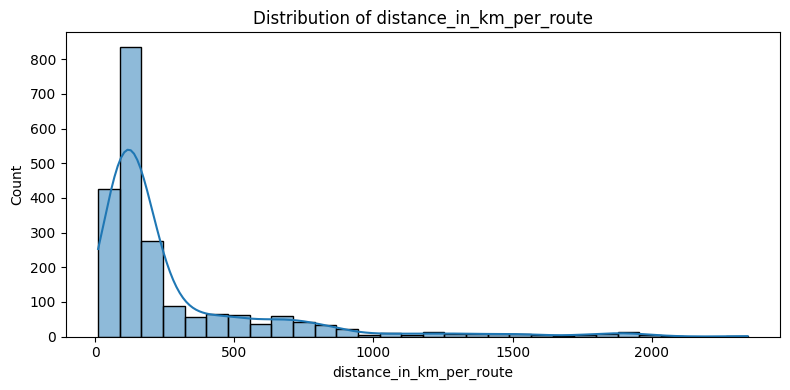

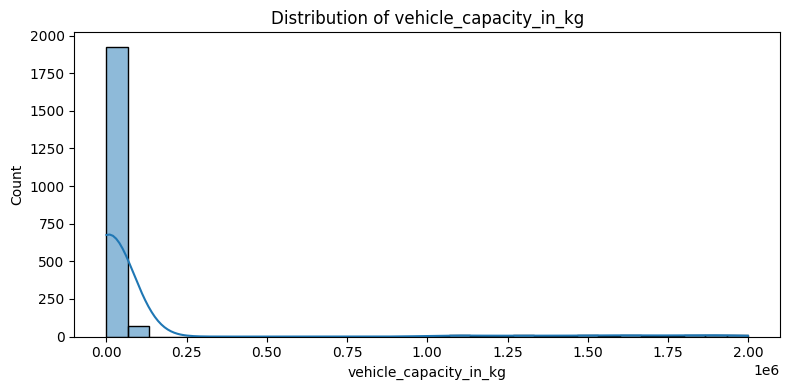

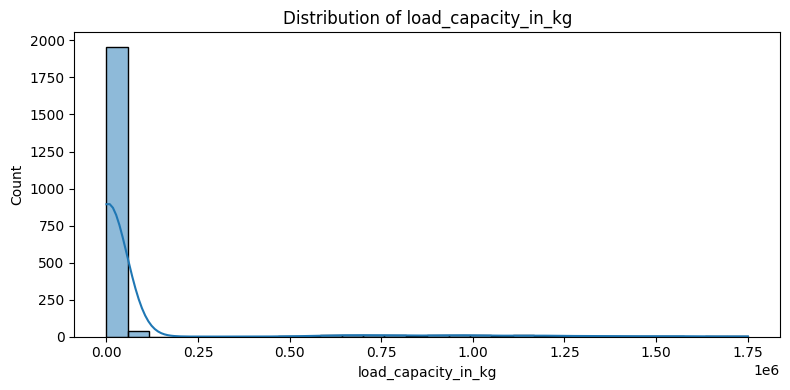

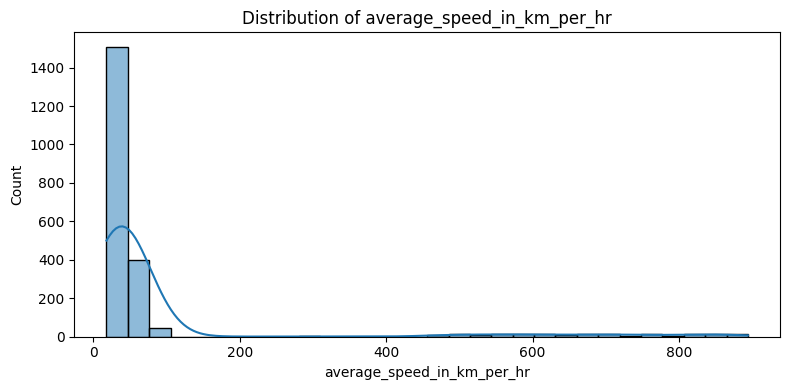

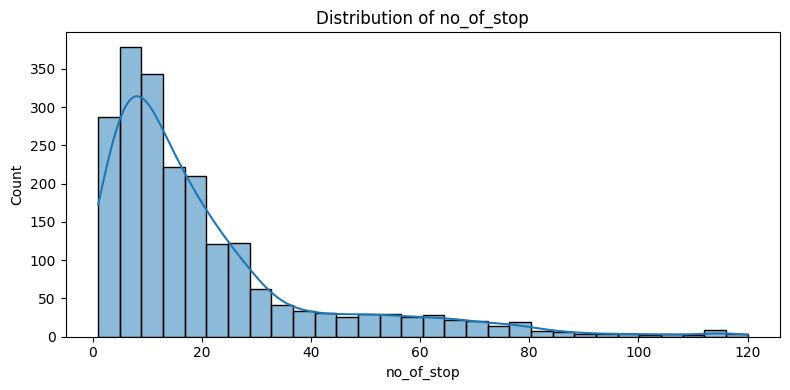

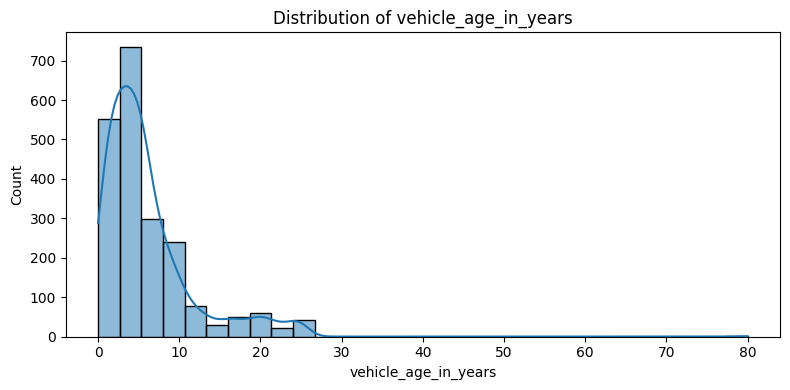

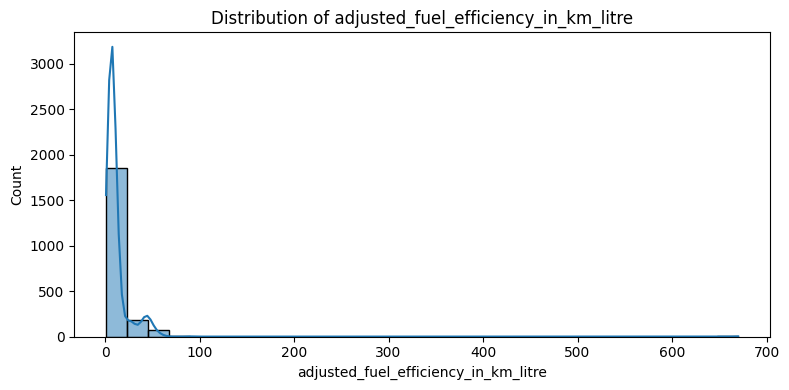

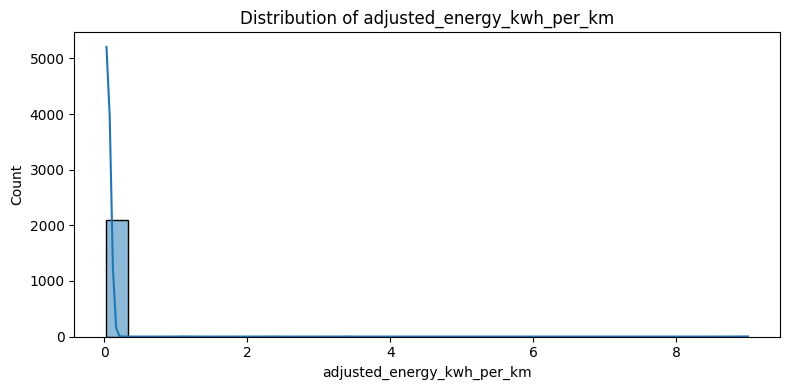

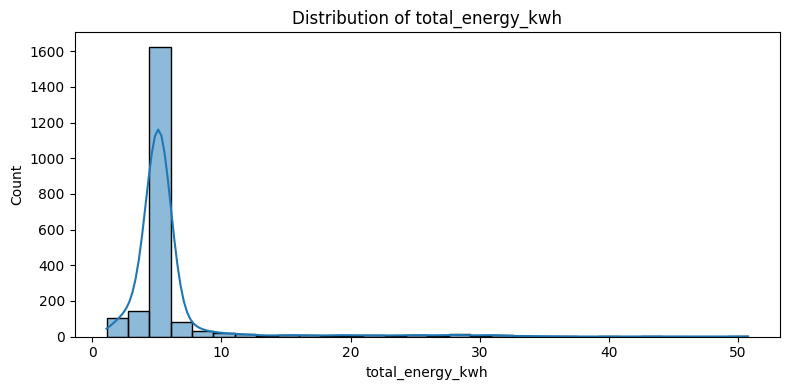

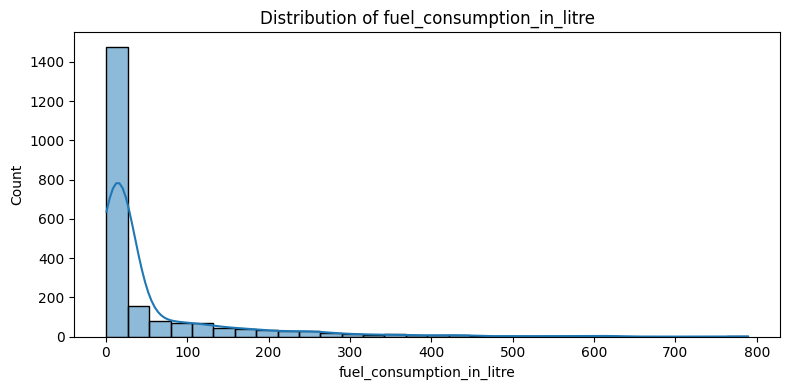

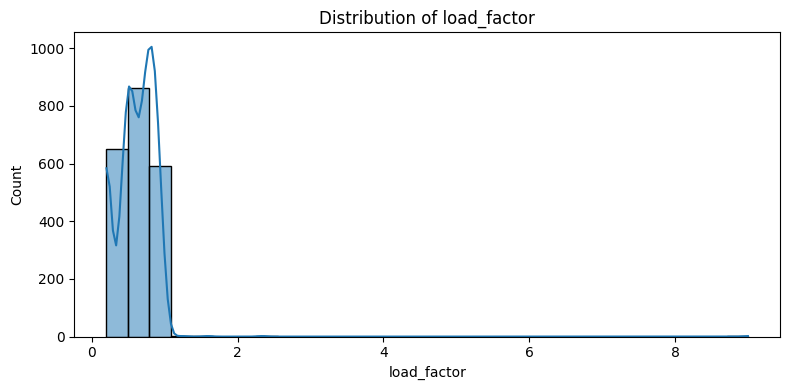

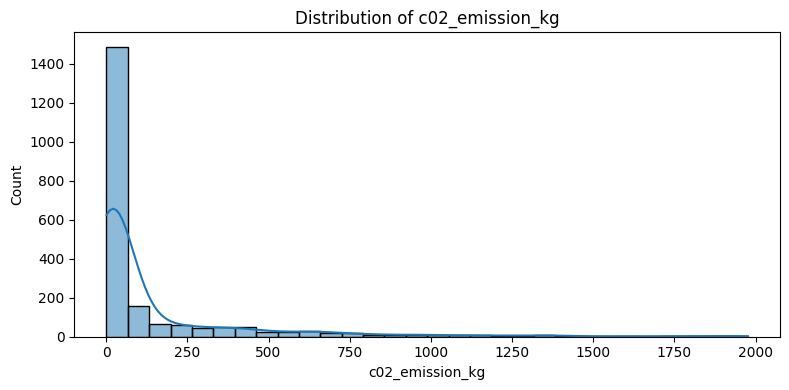

In [94]:
# Histogram for numerical columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_cleaned, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


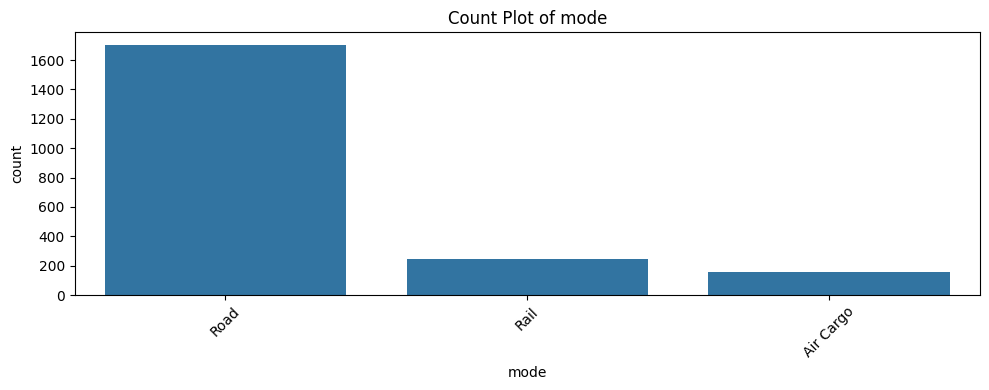

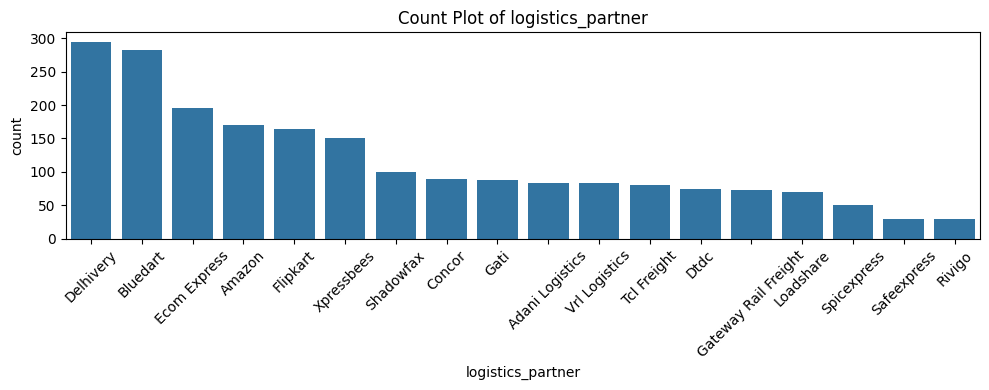

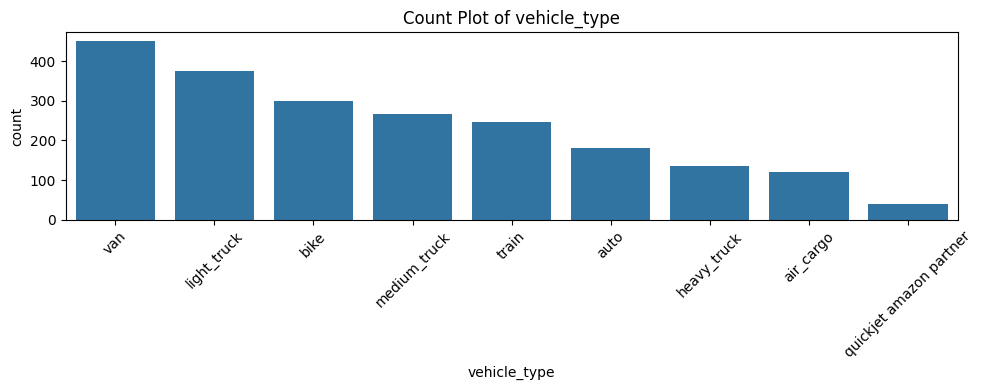

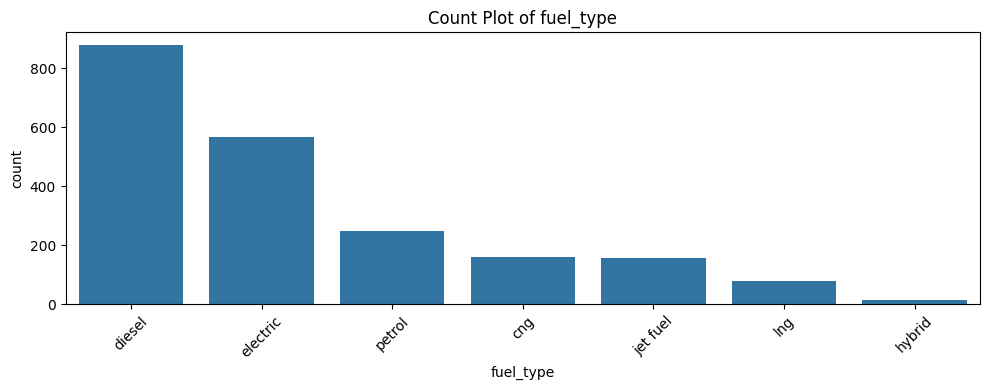

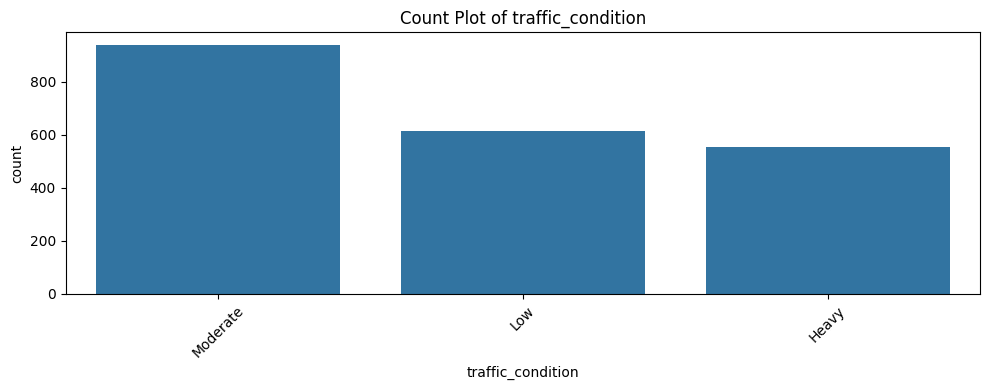

In [95]:
#COUNTPLOT FOR CATEGORICAL COLUMNS
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_cleaned, x=col, order=df_cleaned[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


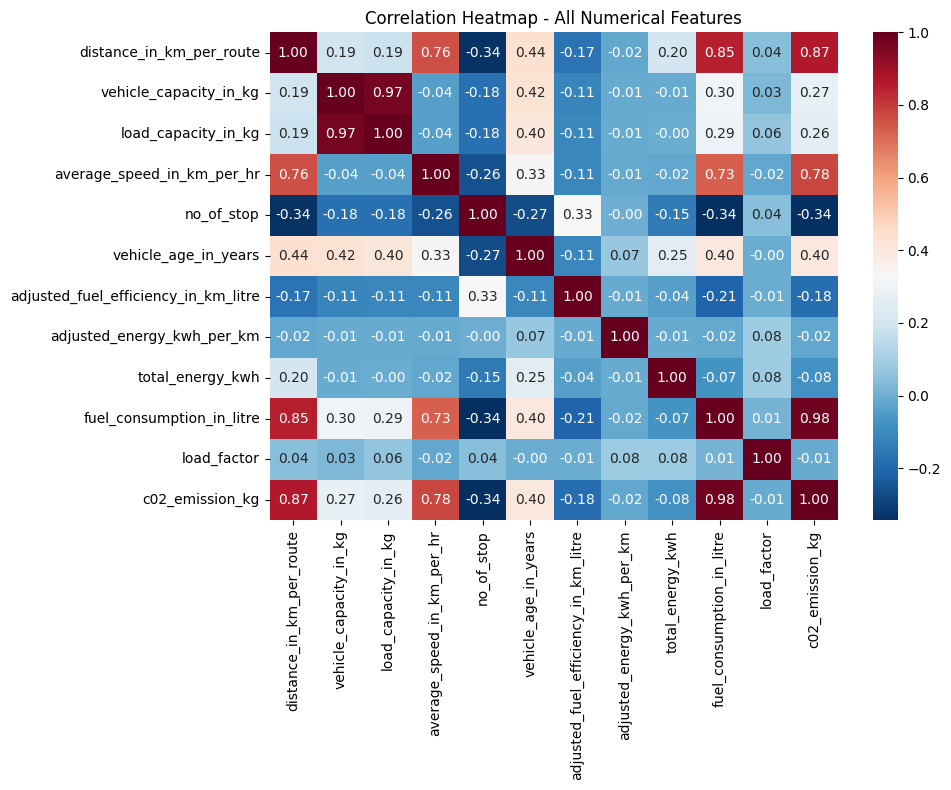

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='RdBu_r')
plt.title("Correlation Heatmap - All Numerical Features")
plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS

NUMERICAL VS NUMERICAL

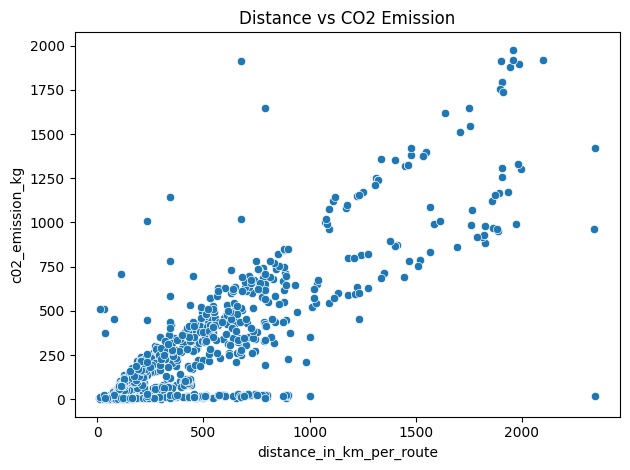

In [97]:
#RELATIONSHIP BETWEEN DISTANCE AND CO2
sns.scatterplot(data=df_cleaned, x='distance_in_km_per_route', y='c02_emission_kg')
plt.title("Distance vs CO2 Emission")
plt.tight_layout()
plt.show()


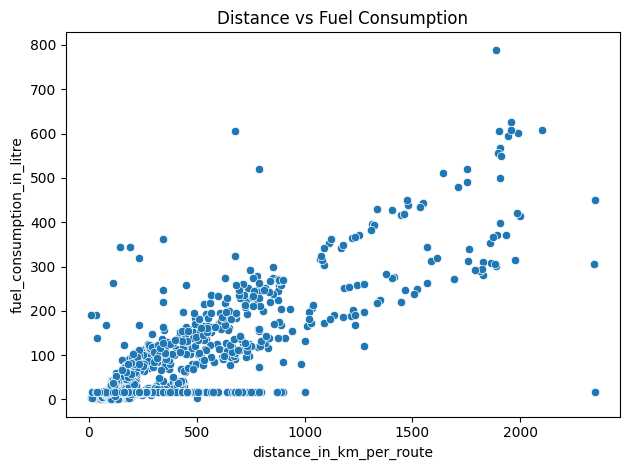

In [98]:
#REALTIONSHIP BETWEEN DISTANCE AND FUEL
sns.scatterplot(data=df_cleaned, x='distance_in_km_per_route', y='fuel_consumption_in_litre')
plt.title("Distance vs Fuel Consumption")
plt.tight_layout()
plt.show()


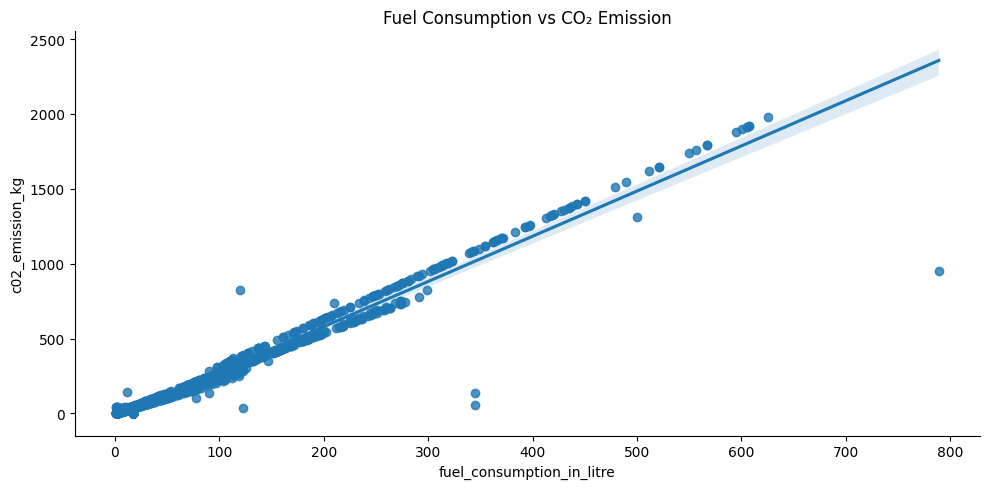

In [99]:
#RELATIONSHIP BETWEEN FUEL AND CO2
sns.lmplot(data=df_cleaned, x='fuel_consumption_in_litre', y='c02_emission_kg', aspect=2, height=5)
plt.title("Fuel Consumption vs CO₂ Emission")
plt.tight_layout()
plt.show()


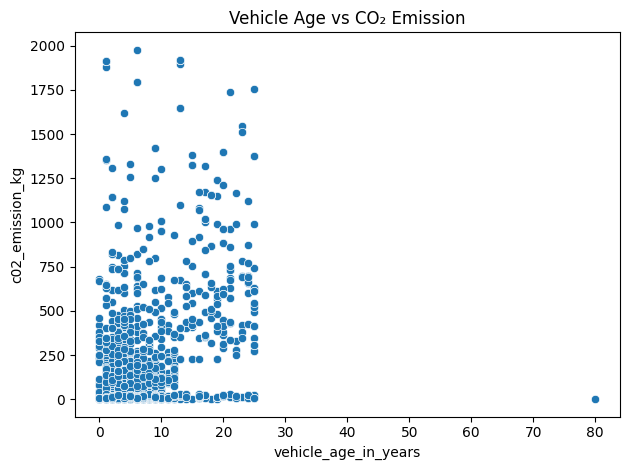

In [100]:
#RELATIONSHIP BETWEEN VEHICLE AGE AND CO2
sns.scatterplot(data=df_cleaned, x='vehicle_age_in_years', y='c02_emission_kg')
plt.title("Vehicle Age vs CO₂ Emission")
plt.tight_layout()
plt.show()


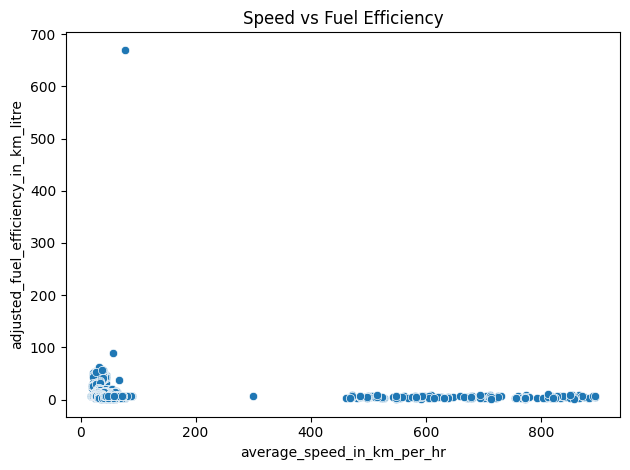

In [101]:
#RELATIONSHIP BETWEEN FUEL EFFICIENCY AND SPEED
sns.scatterplot(data=df_cleaned, x='average_speed_in_km_per_hr', y='adjusted_fuel_efficiency_in_km_litre')
plt.title("Speed vs Fuel Efficiency")
plt.tight_layout()
plt.show()


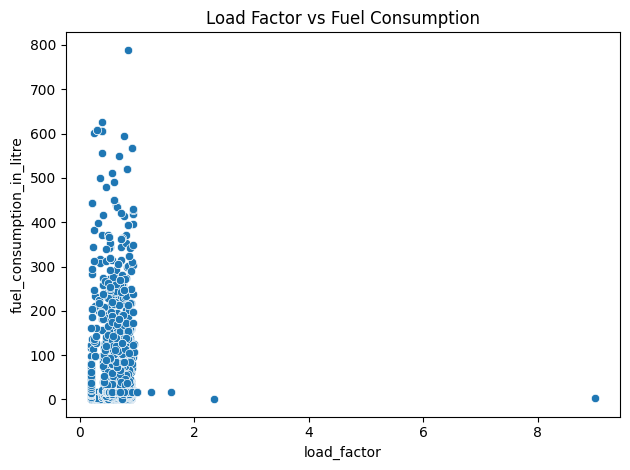

In [102]:
#RELATIONSHIP BETWEEN LOAD FACTOR AND FUEL CONSUMPTION
sns.scatterplot(data=df_cleaned, x='load_factor', y='fuel_consumption_in_litre')
plt.title("Load Factor vs Fuel Consumption")
plt.tight_layout()
plt.show()


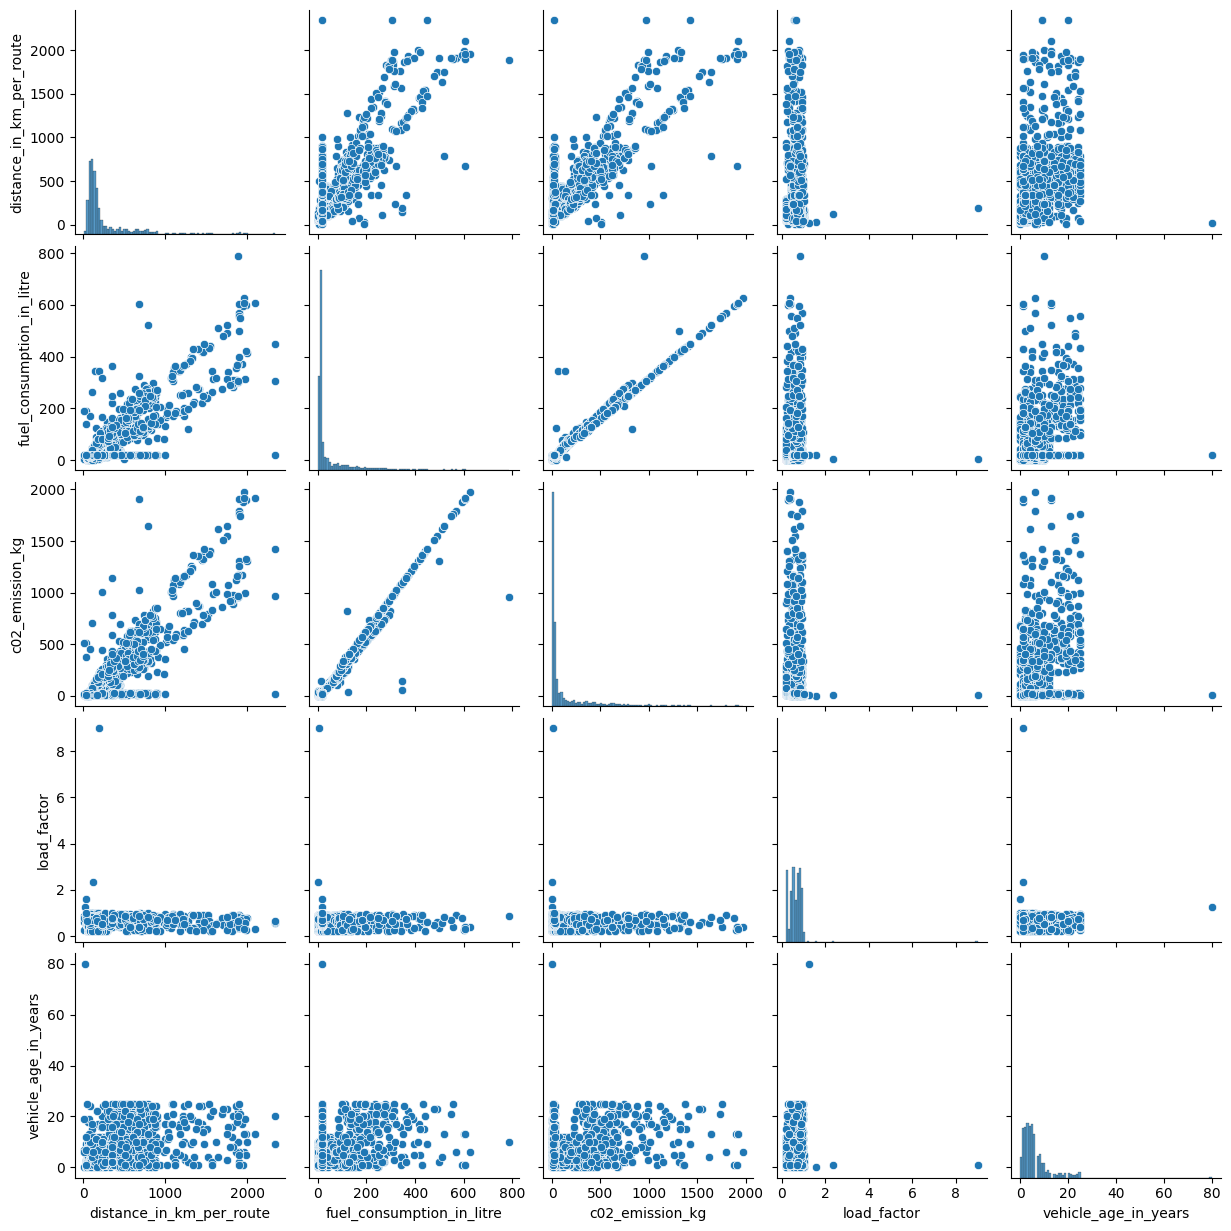

In [103]:
sns.pairplot(df_cleaned[[
    'distance_in_km_per_route',
    'fuel_consumption_in_litre',
    'c02_emission_kg',
    'load_factor',
    'vehicle_age_in_years'
]])
plt.show()


CATEGORICAL VS CATEGORICAL


Cross-tabulation of Vehicle Type vs Fuel Type:

fuel_type                cng  diesel  electric  hybrid  jet fuel  lng  petrol
vehicle_type                                                                 
air_cargo                  0       0         0       0       119    0       0
auto                      15       0        75       0         0   20      70
bike                       0       0       121       0         0    0     178
heavy_truck                0     135         0       0         0    0       0
light_truck               61     238        55       0         0   20       0
medium_truck              46     150        30       0         0   40       0
quickjet amazon partner    0       0         0       0        40    0       0
train                      0     114       132       0         0    0       0
van                       40     241       154      15         0    0       0


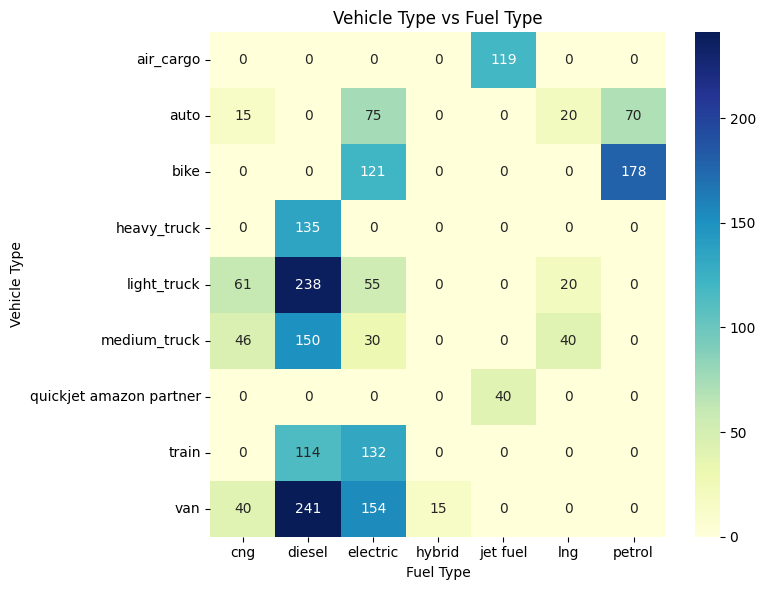

In [104]:
cross_tab = pd.crosstab(df_cleaned['vehicle_type'], df_cleaned['fuel_type'])
print("\nCross-tabulation of Vehicle Type vs Fuel Type:\n")
print(cross_tab)

#Heatmap for visualizing cross-tab result
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Vehicle Type vs Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()


Cross-tabulation of Fuel Type vs Mode:

mode       Air Cargo  Rail  Road
fuel_type                       
cng                0     0   162
diesel             0   114   764
electric           0   132   435
hybrid             0     0    15
jet fuel         159     0     0
lng                0     0    80
petrol             0     0   248


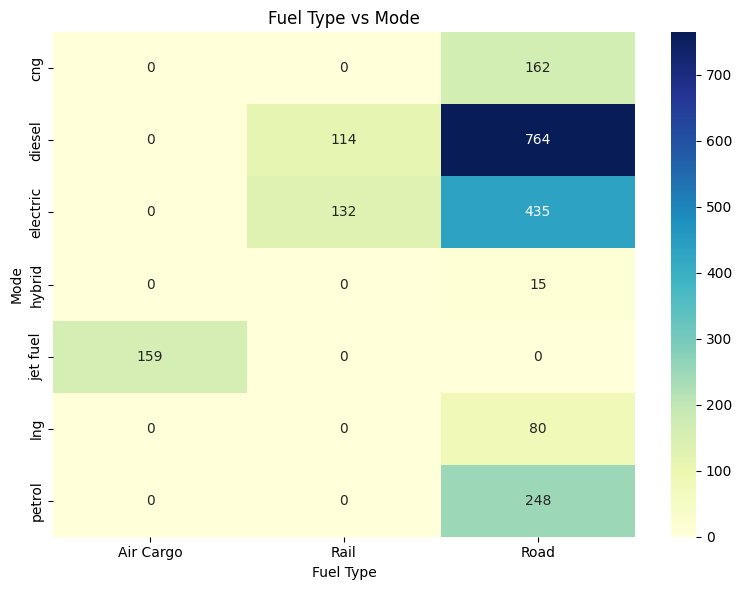

In [105]:
cross_tab = pd.crosstab(df_cleaned['fuel_type'], df_cleaned['mode'])
print("\nCross-tabulation of Fuel Type vs Mode:\n")
print(cross_tab)

#Heatmap for visualizing cross-tab result
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Fuel Type vs Mode")
plt.xlabel("Fuel Type")
plt.ylabel("Mode")
plt.tight_layout()
plt.show()


Cross-tabulation of Logistics Partner vs Mode:

mode                  Air Cargo  Rail  Road
logistics_partner                          
Adani Logistics               0    84     0
Amazon                       40     0   130
Bluedart                     68     0   215
Concor                        0    89     0
Delhivery                     0     0   294
Dtdc                          0     0    75
Ecom Express                  0     0   195
Flipkart                      0     0   164
Gateway Rail Freight          0    73     0
Gati                          0     0    88
Loadshare                     0     0    70
Rivigo                        0     0    29
Safeexpress                   0     0    30
Shadowfax                     0     0   100
Spicexpress                  51     0     0
Tcl Freight                   0     0    80
Vrl Logistics                 0     0    84
Xpressbees                    0     0   150


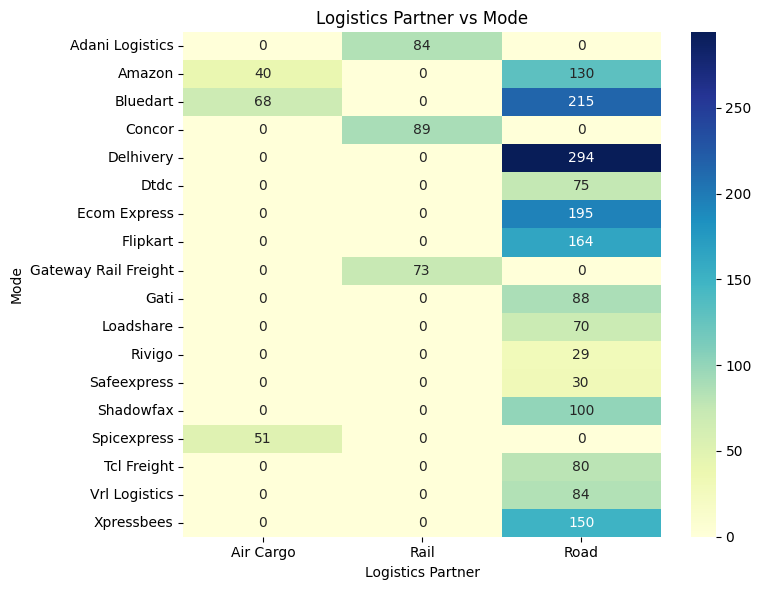

In [106]:
cross_tab = pd.crosstab(df_cleaned['logistics_partner'], df_cleaned['mode'])
print("\nCross-tabulation of Logistics Partner vs Mode:\n")
print(cross_tab)

#Heatmap for visualizing cross-tab result
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Logistics Partner vs Mode")
plt.xlabel("Logistics Partner")
plt.ylabel("Mode")
plt.tight_layout()
plt.show()

NUMERICAL VS CATEGORICAL

In [107]:
categorical_cols = ['mode', 'logistics_partner', 'vehicle_type', 'fuel_type', 'traffic_condition']
numerical_cols = ['distance_in_km_per_route', 'fuel_consumption_in_litre', 
                  'c02_emission_kg', 'load_factor', 'vehicle_age_in_years']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

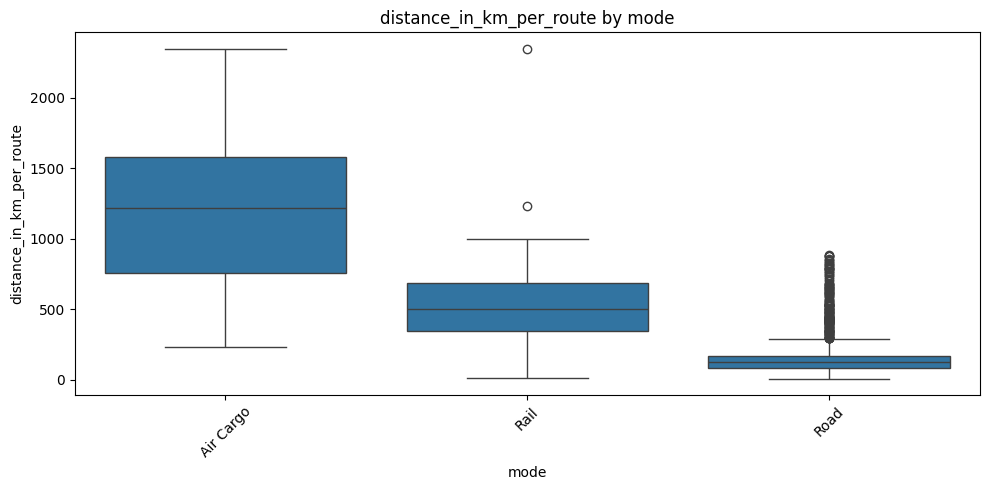

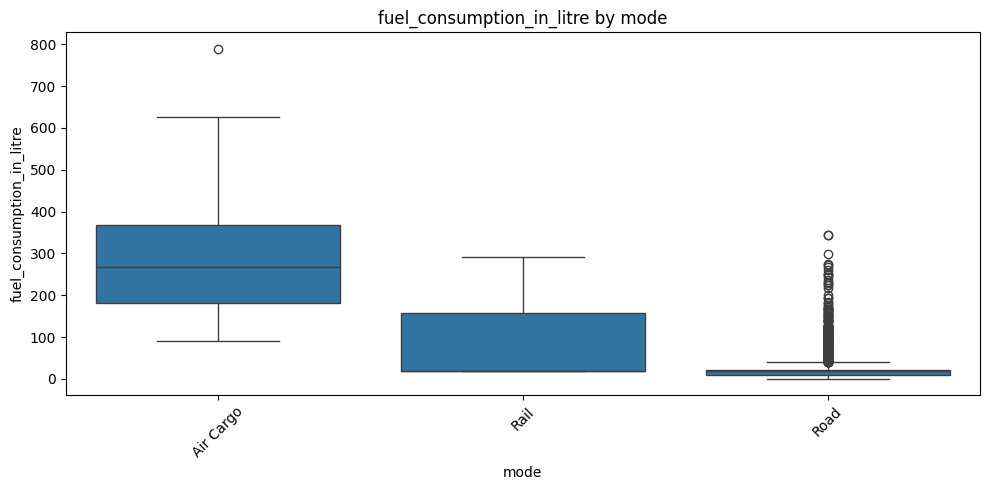

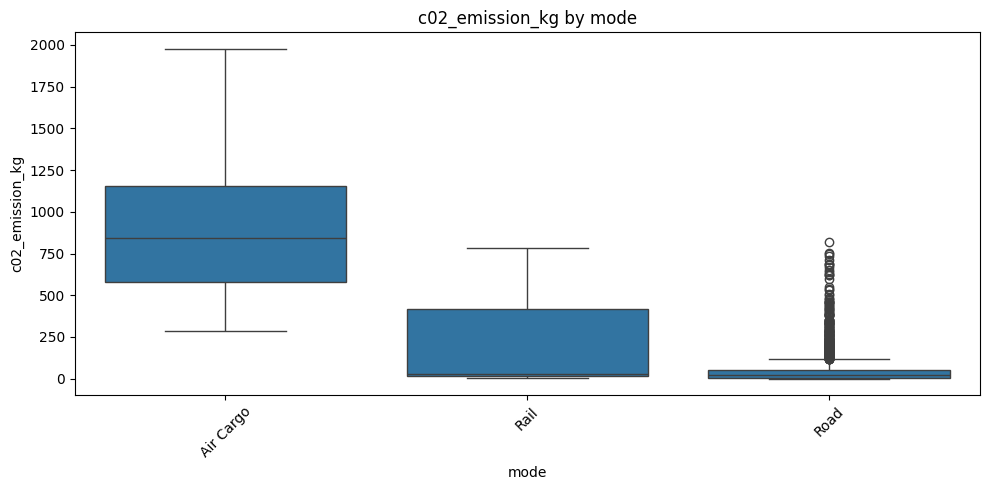

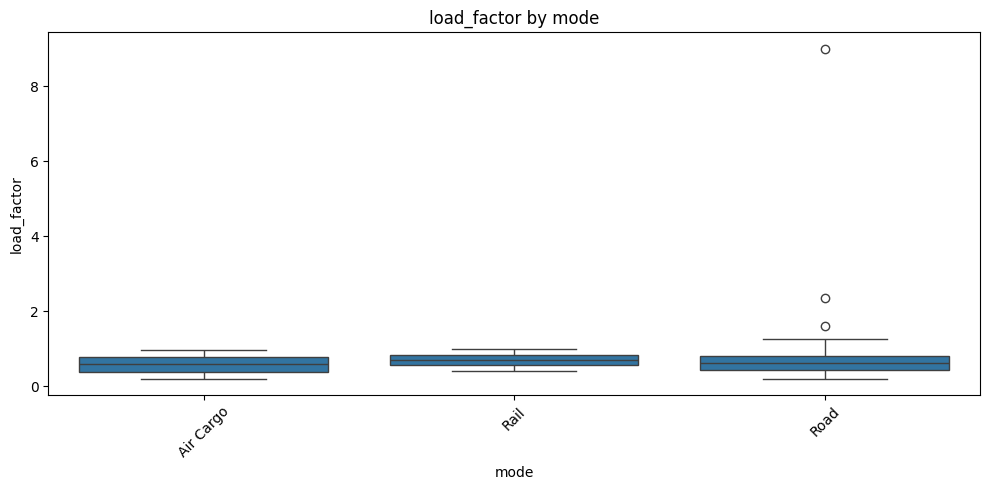

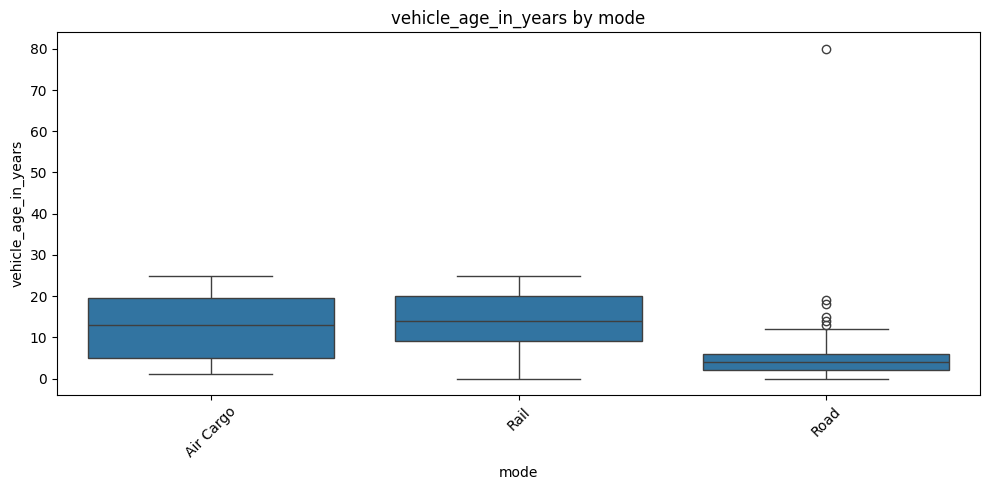

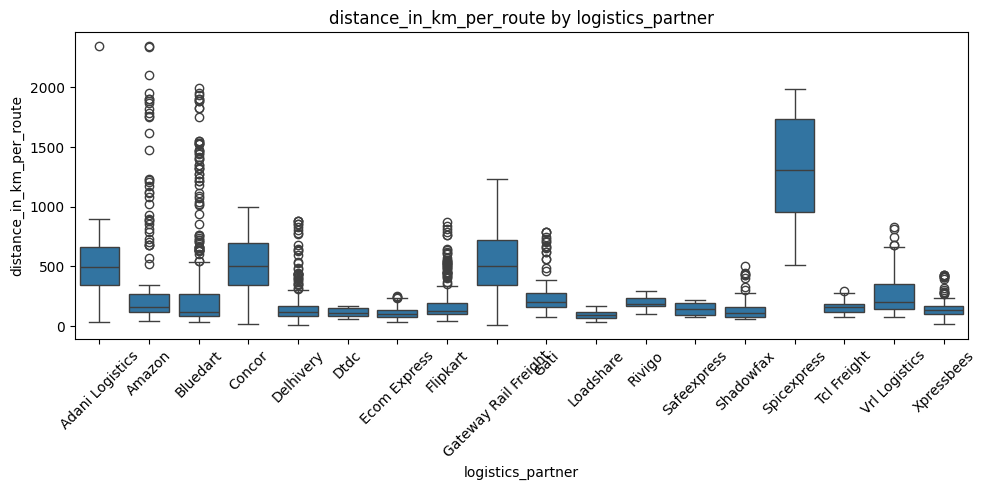

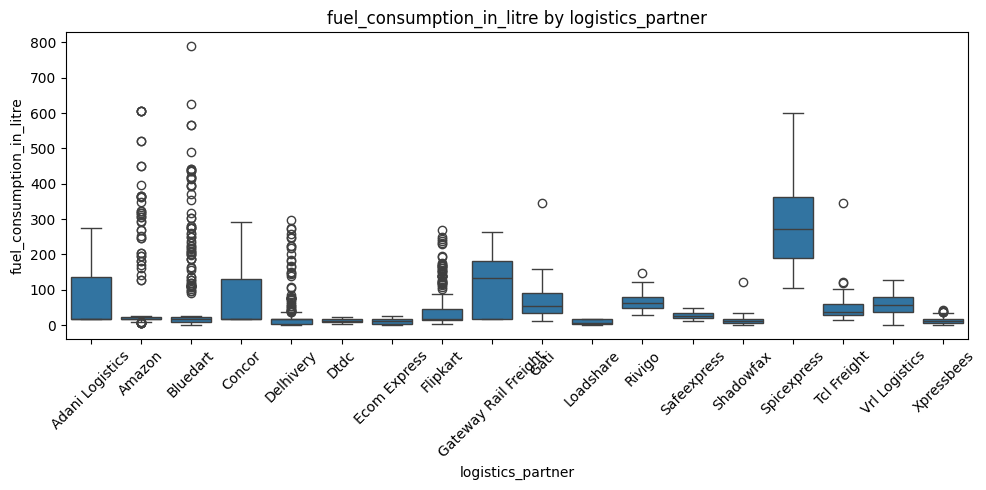

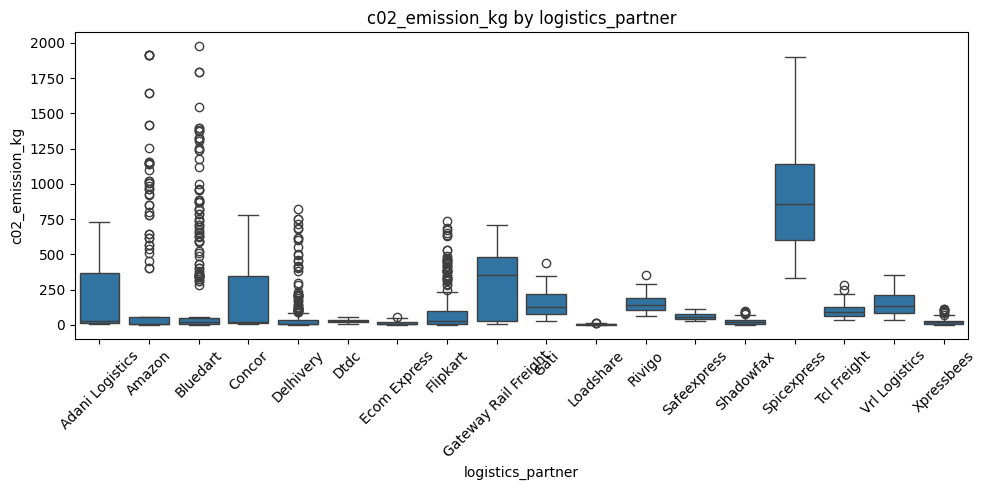

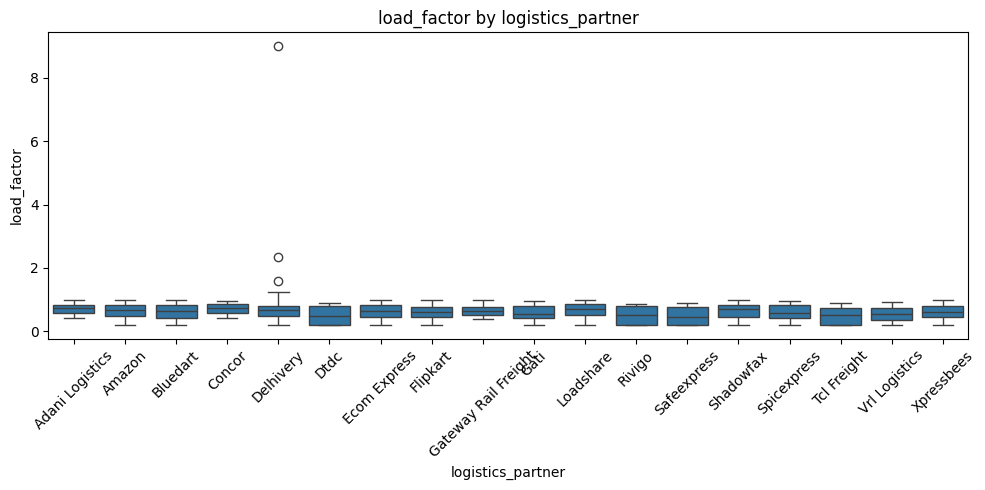

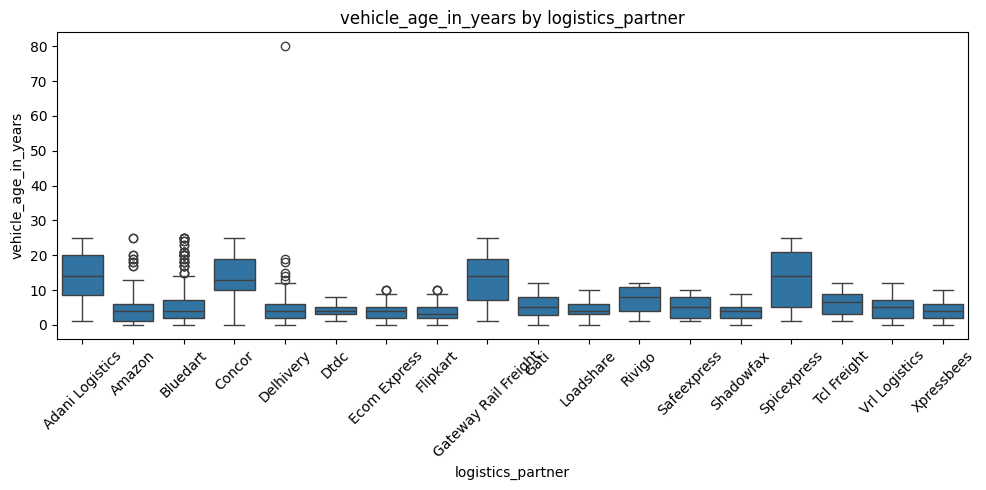

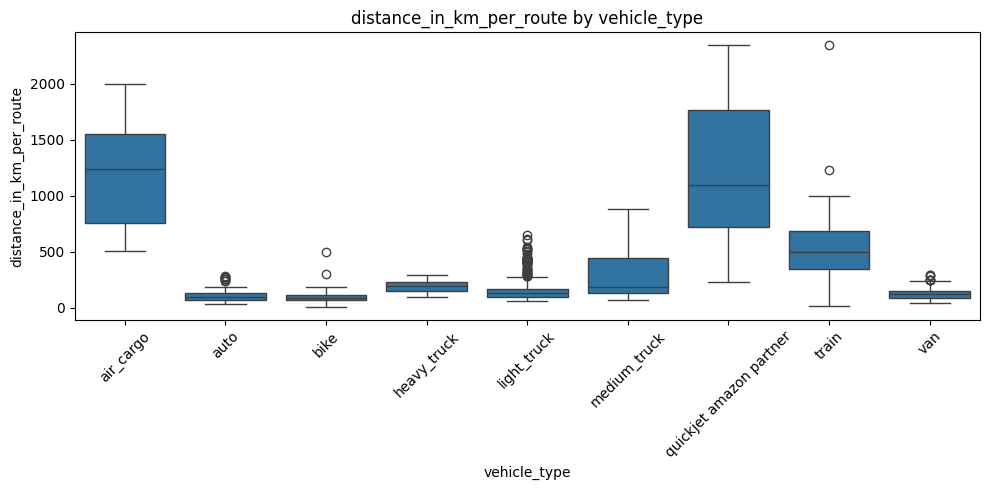

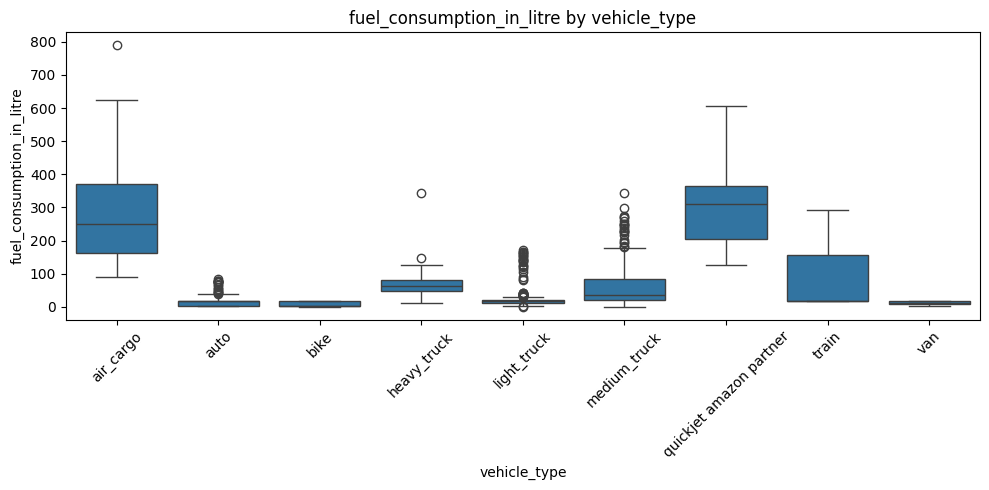

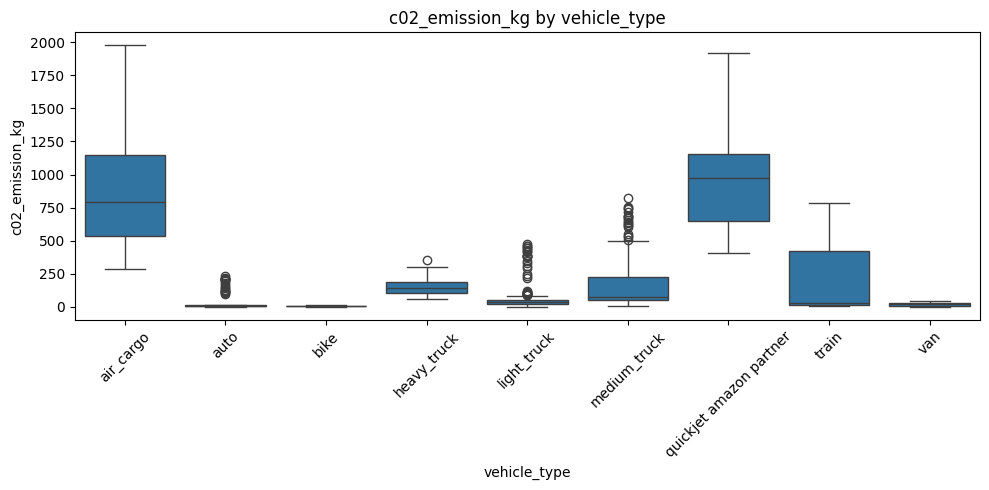

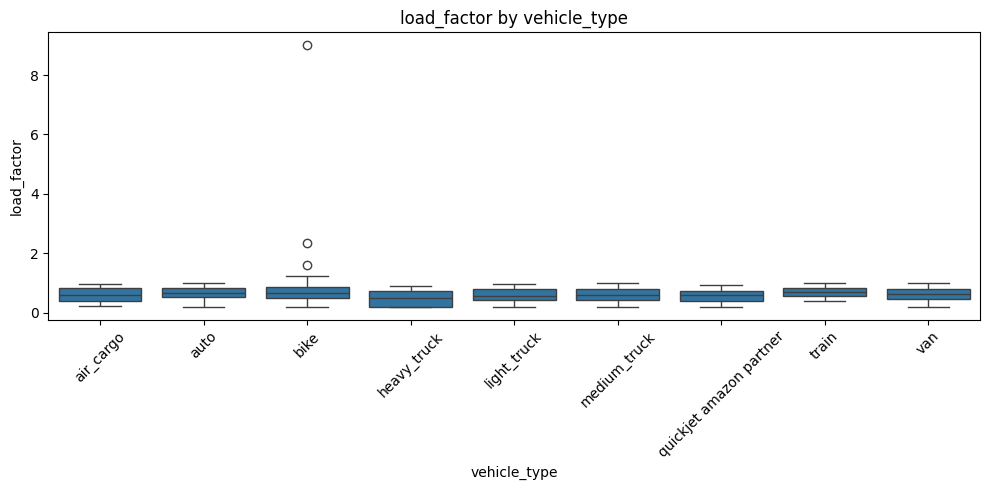

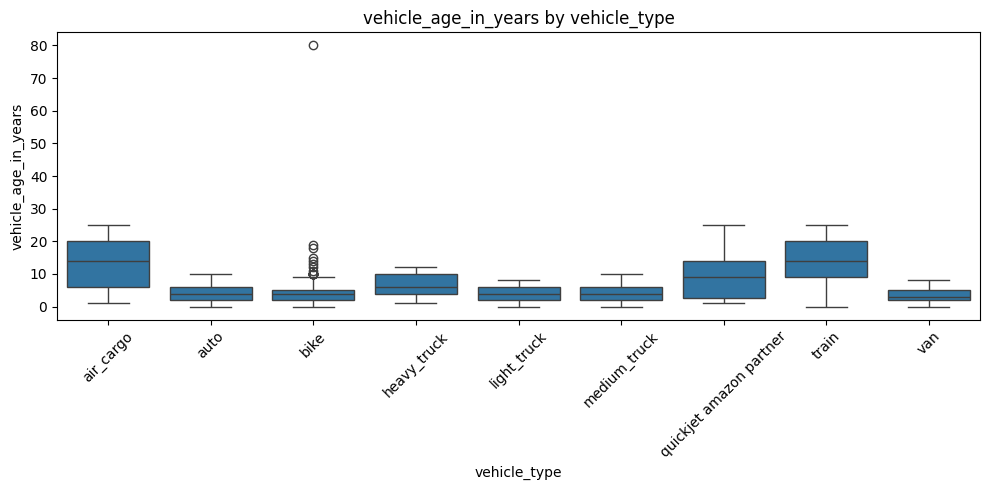

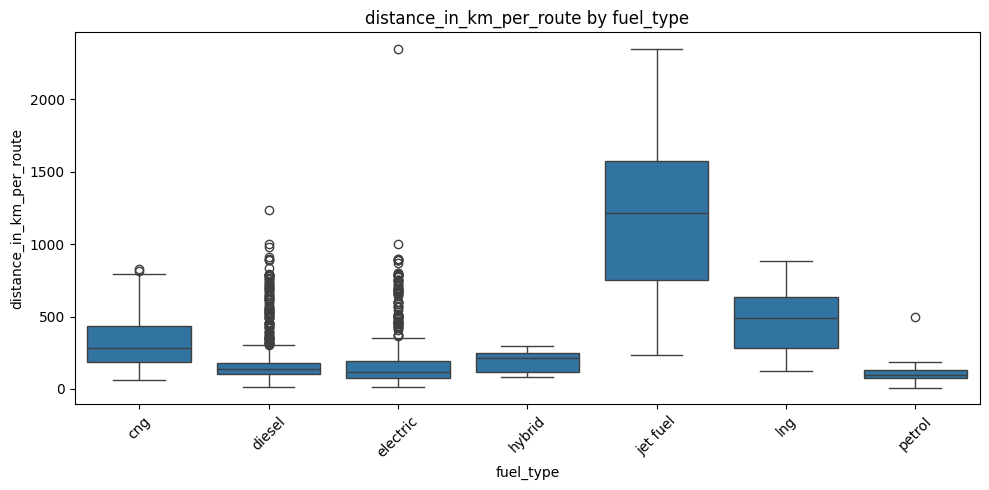

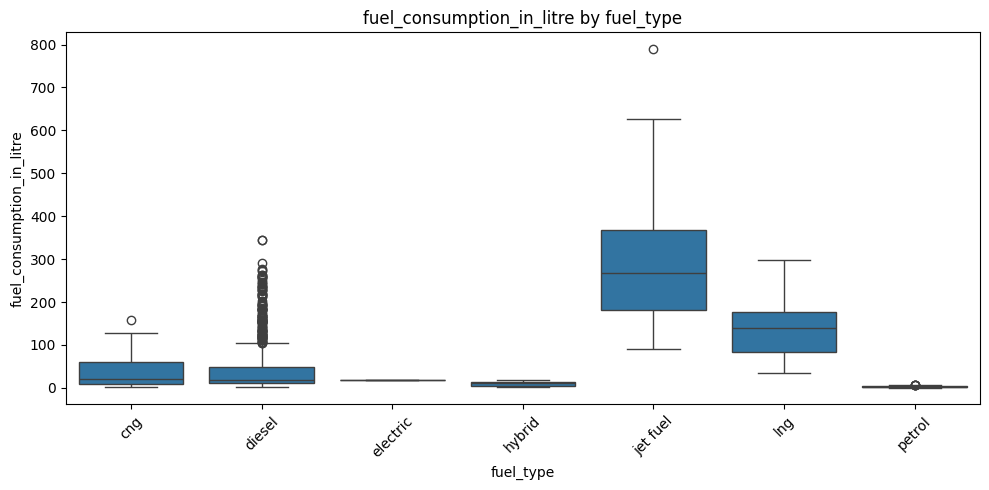

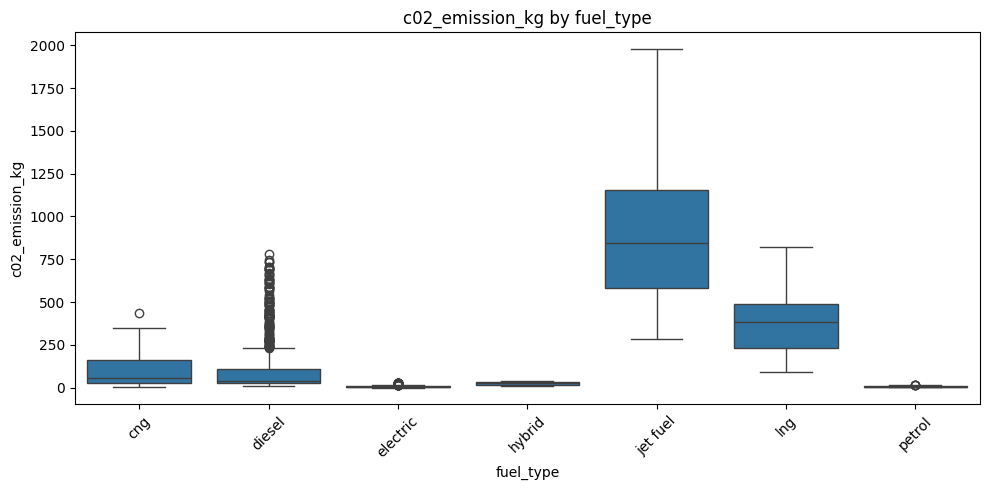

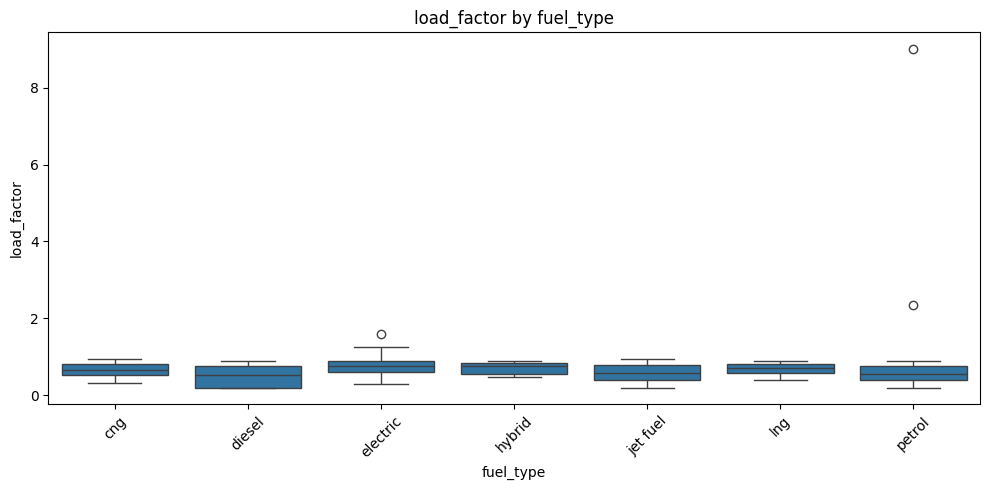

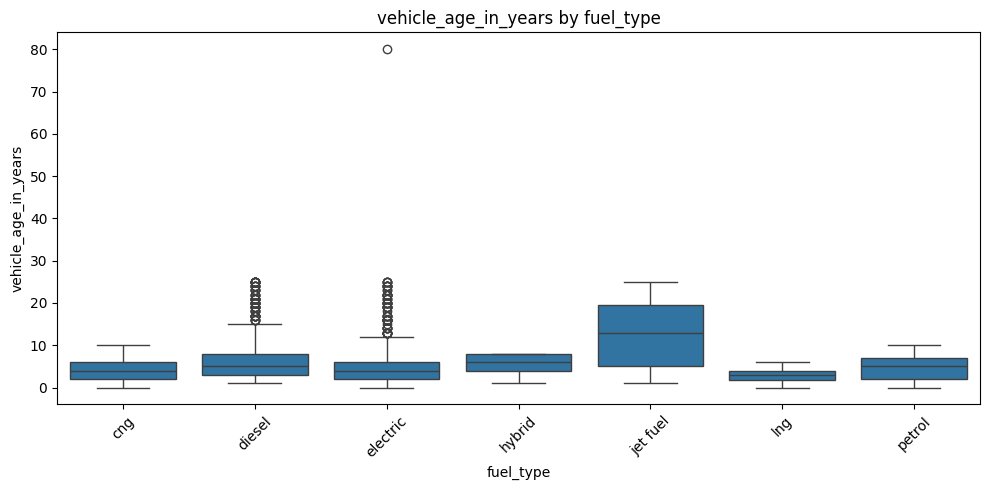

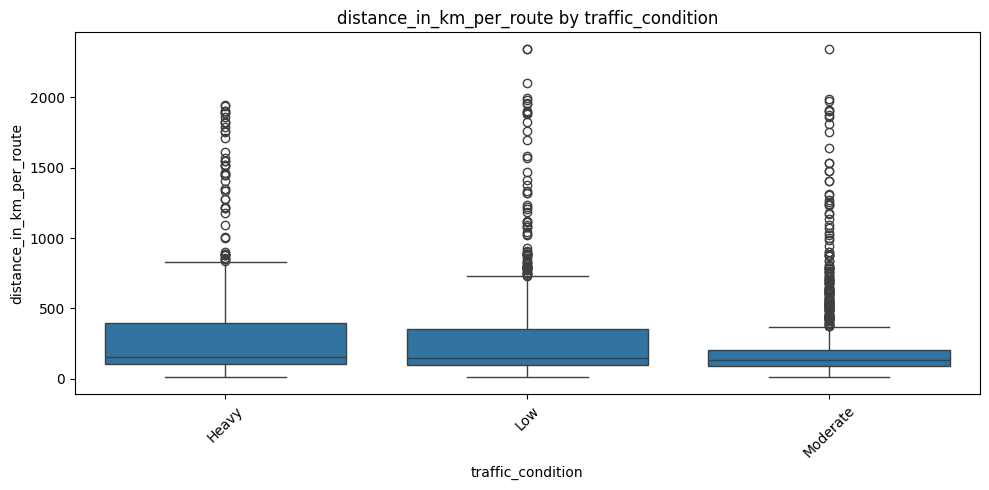

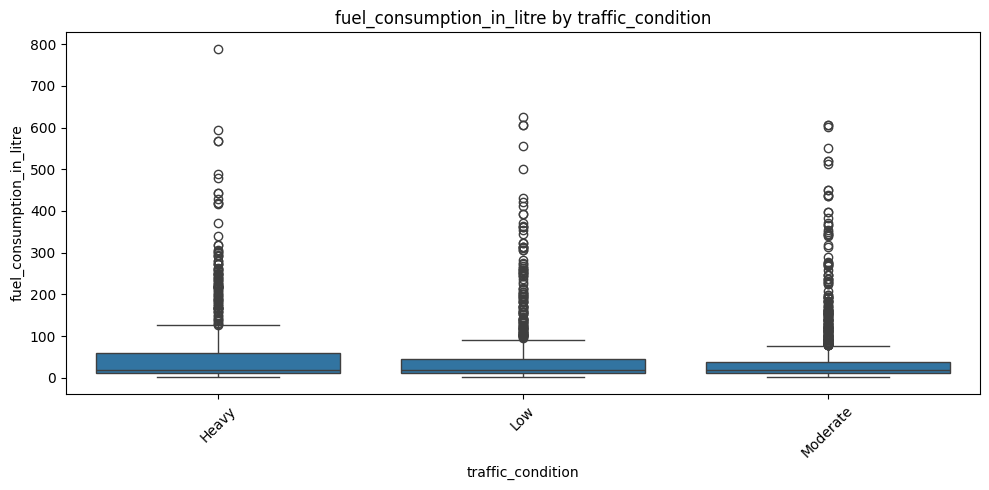

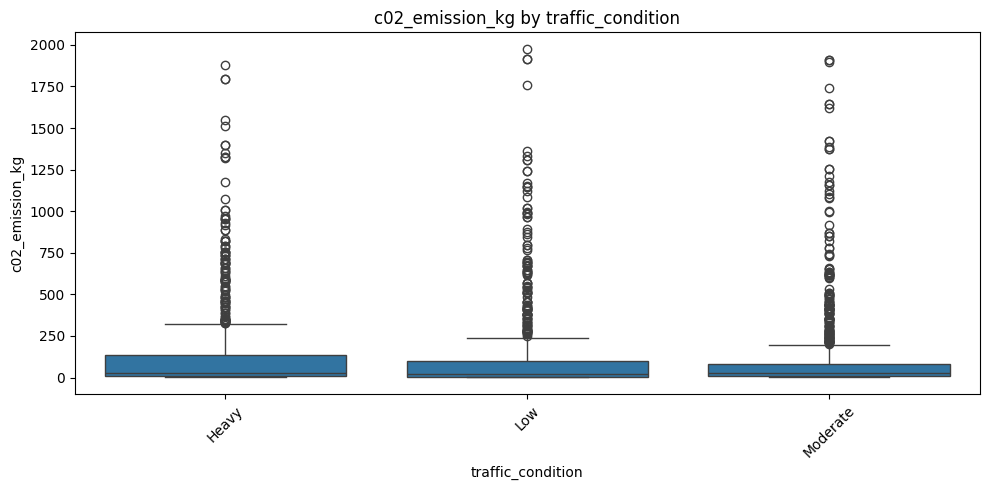

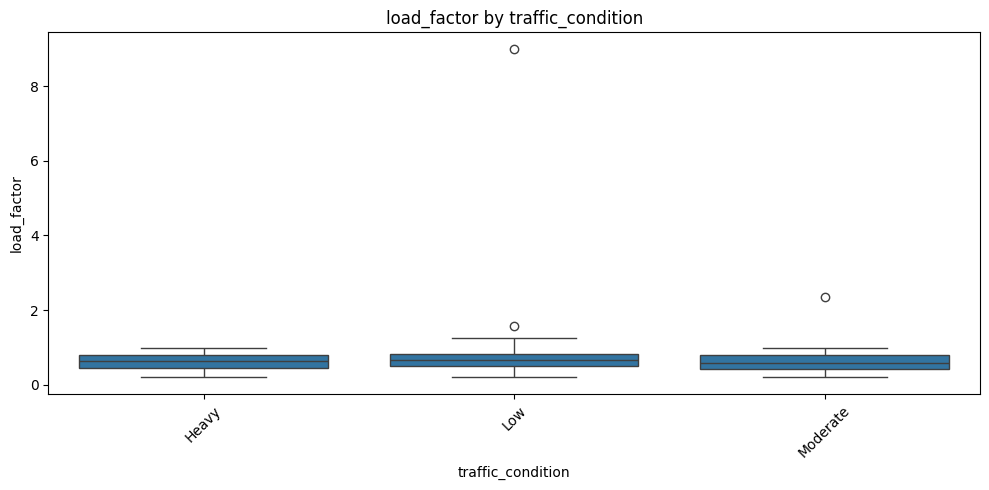

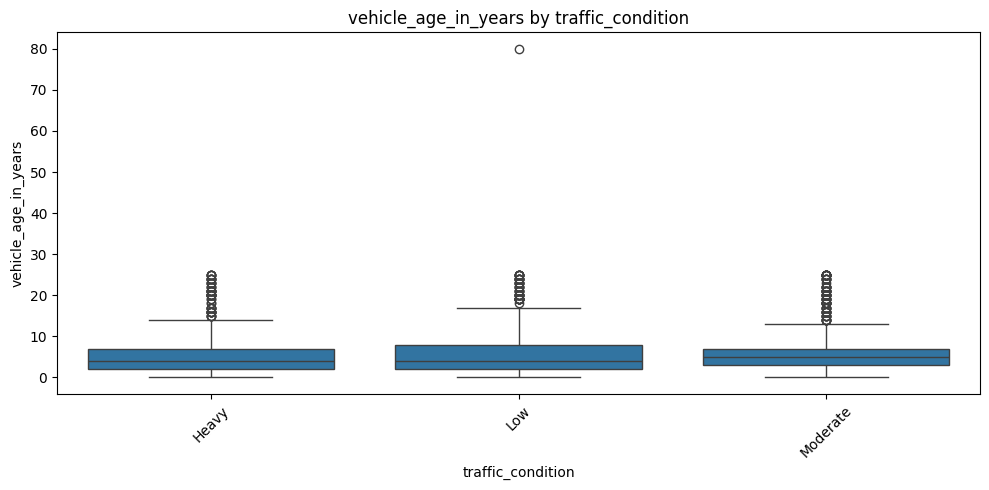

In [108]:
#Box Plot: For each numerical vs categorical
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cat_col, y=num_col, data=df_cleaned)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

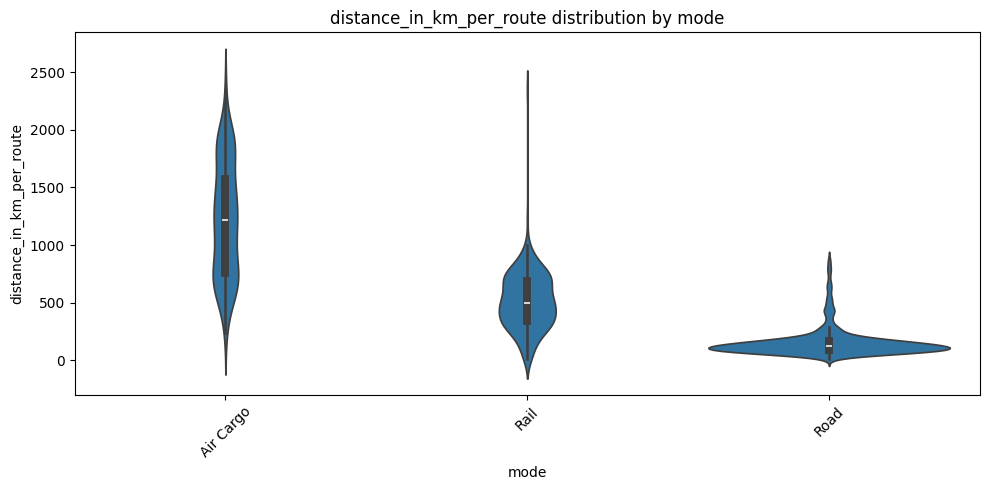

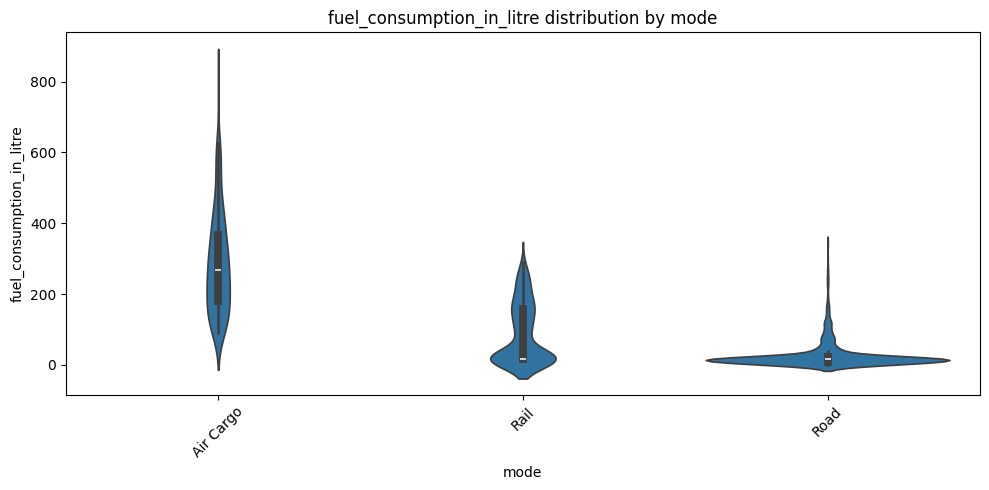

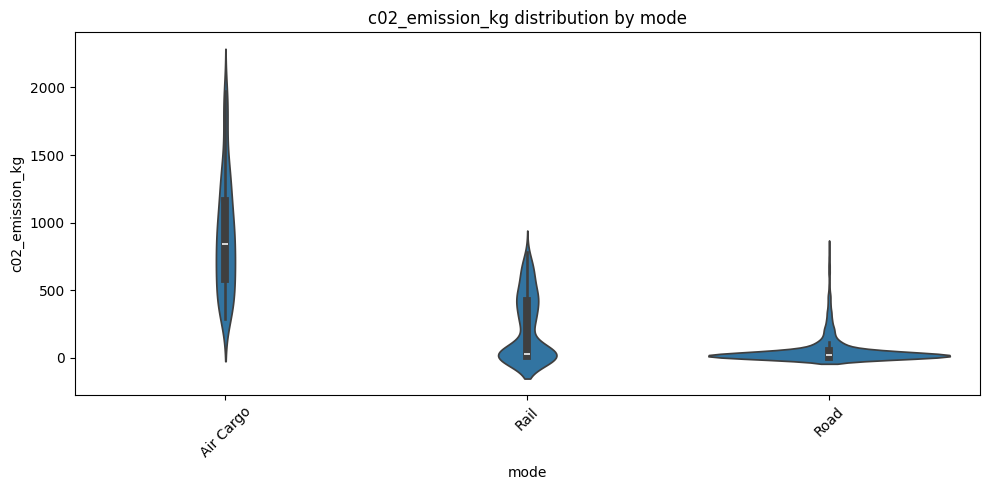

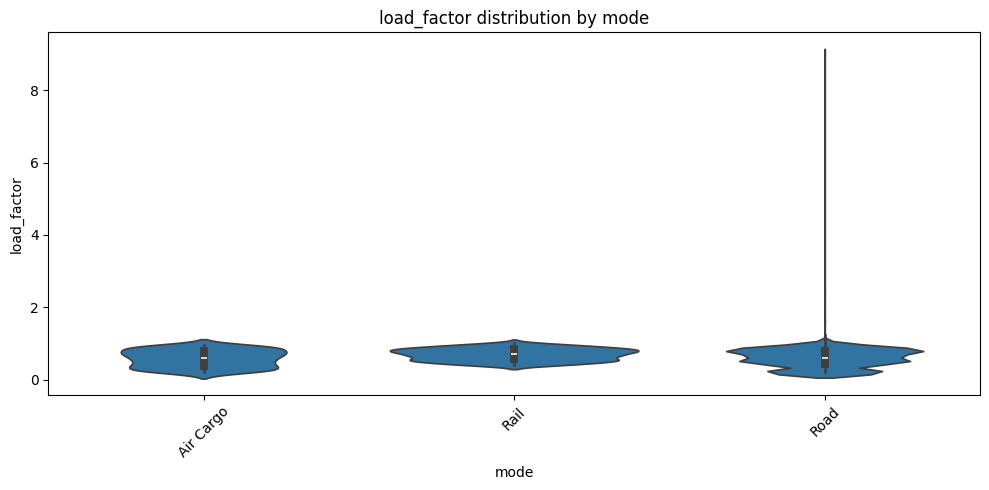

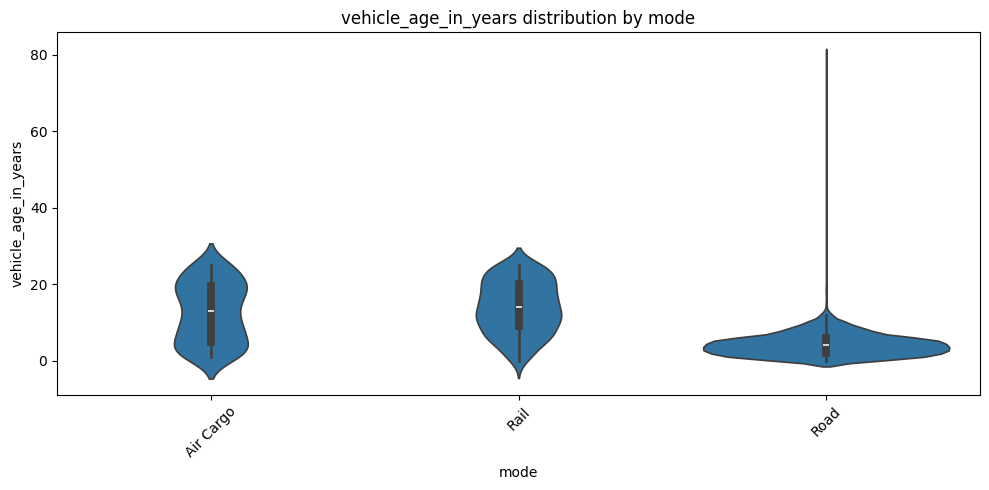

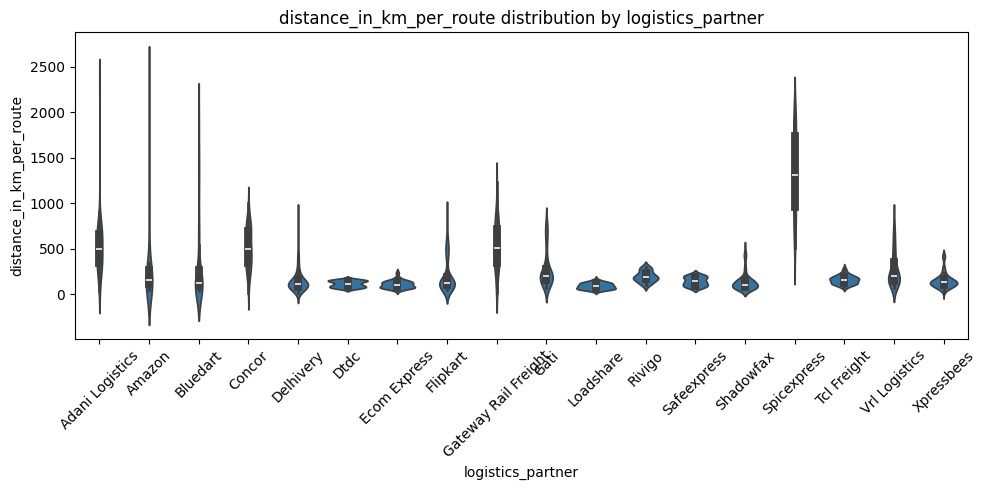

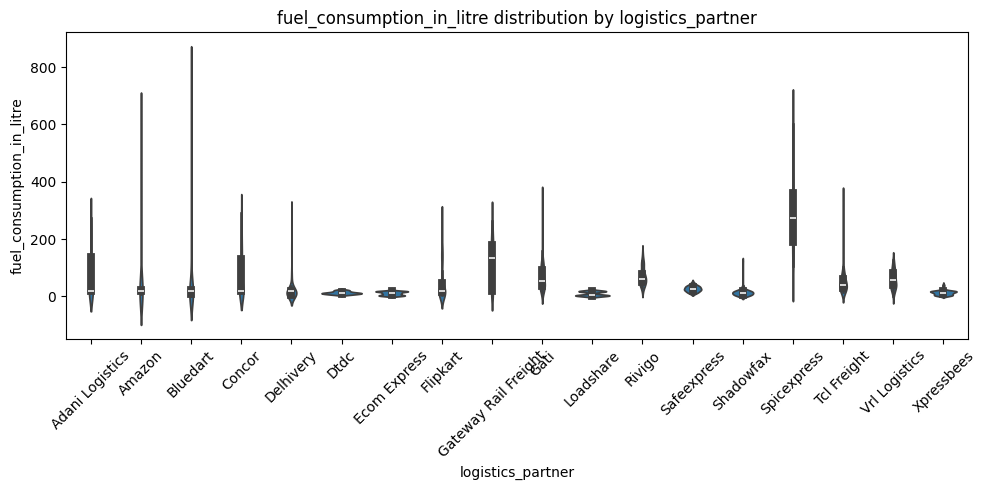

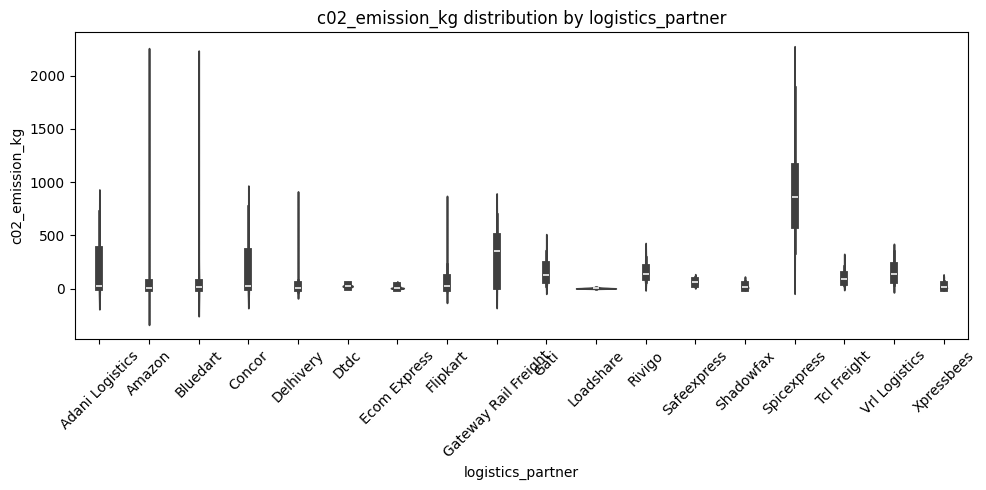

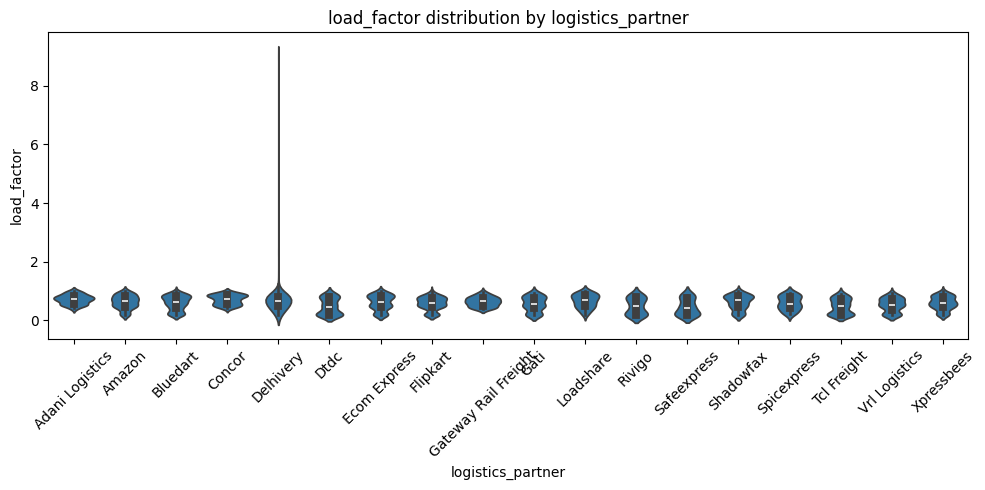

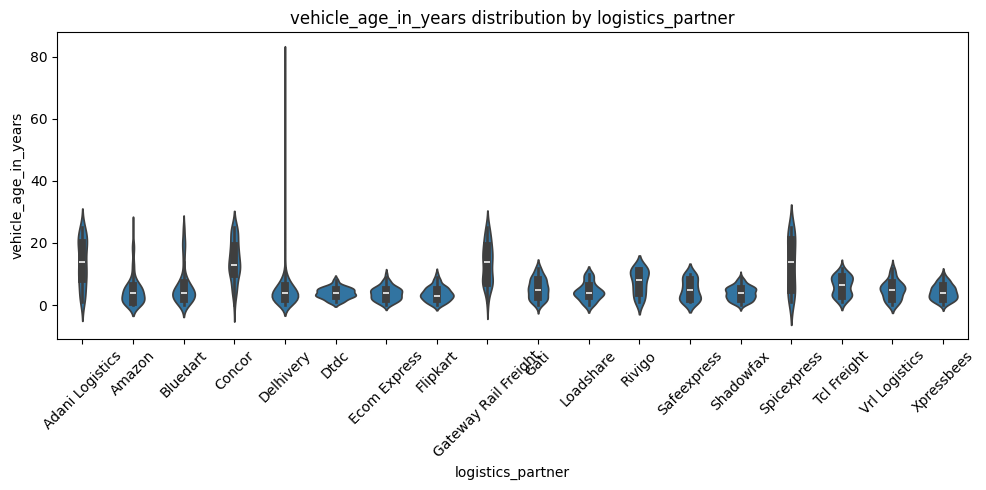

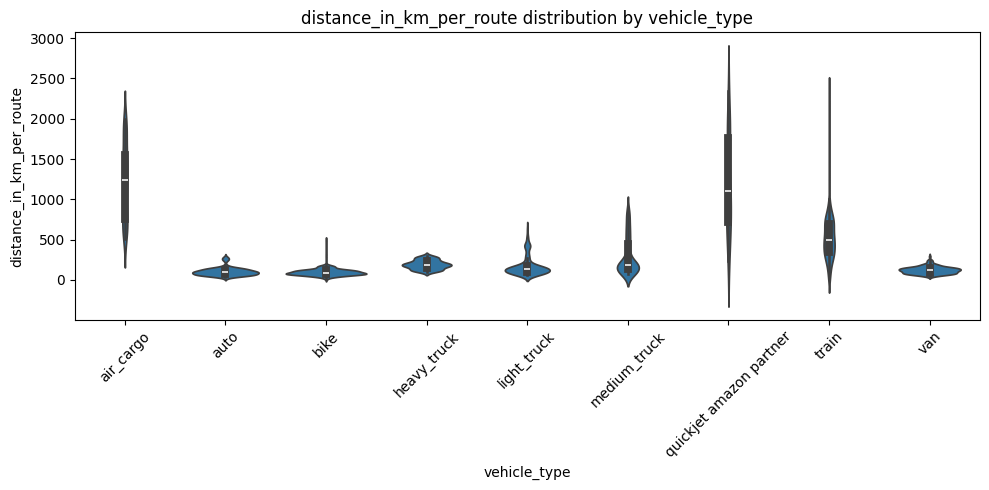

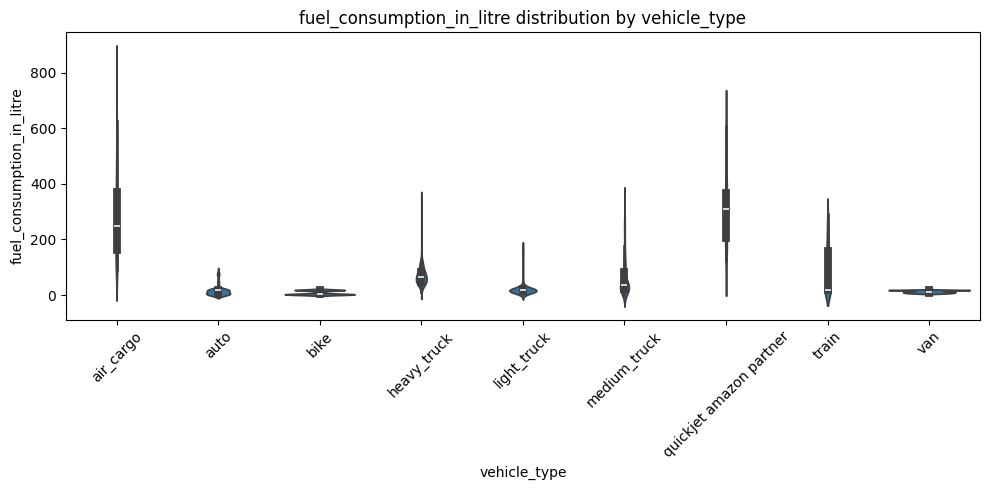

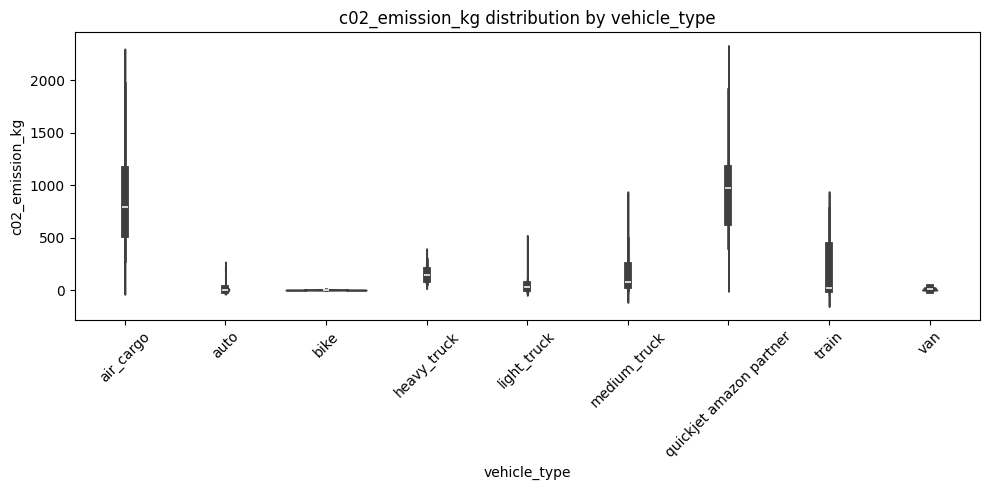

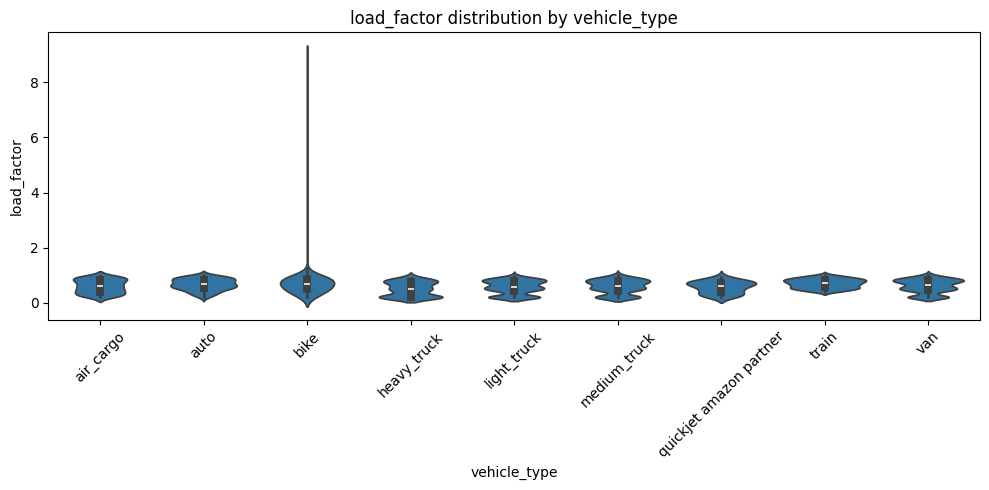

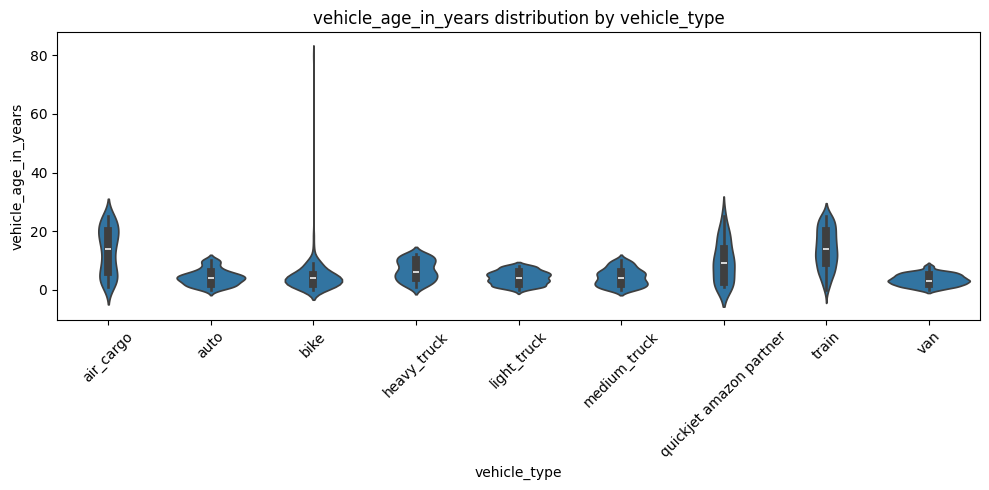

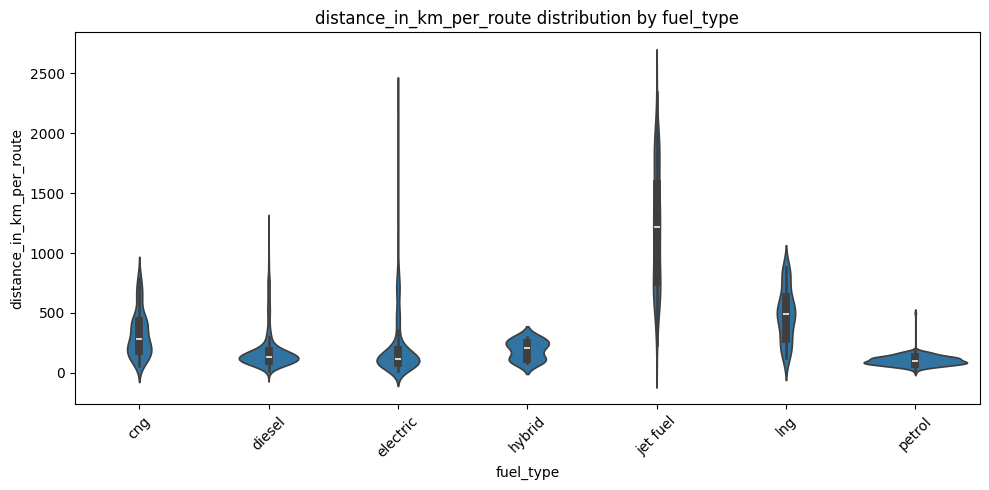

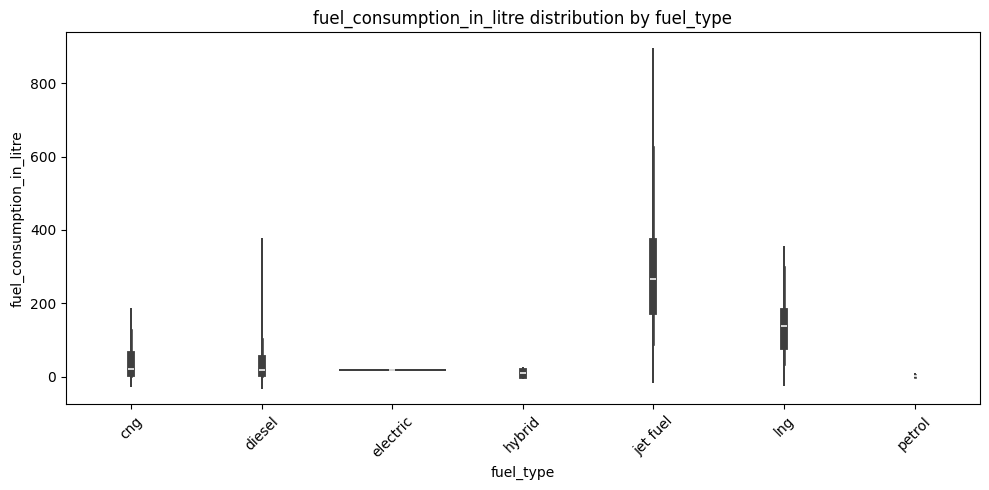

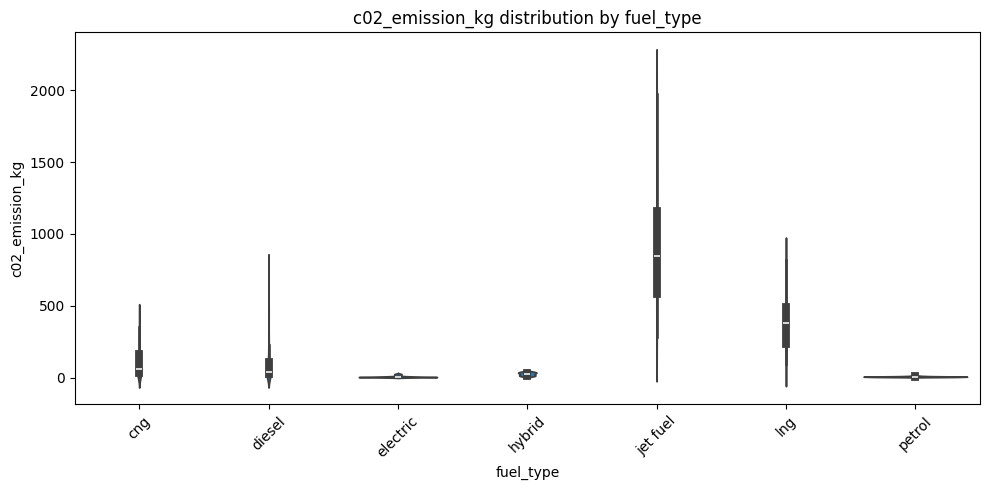

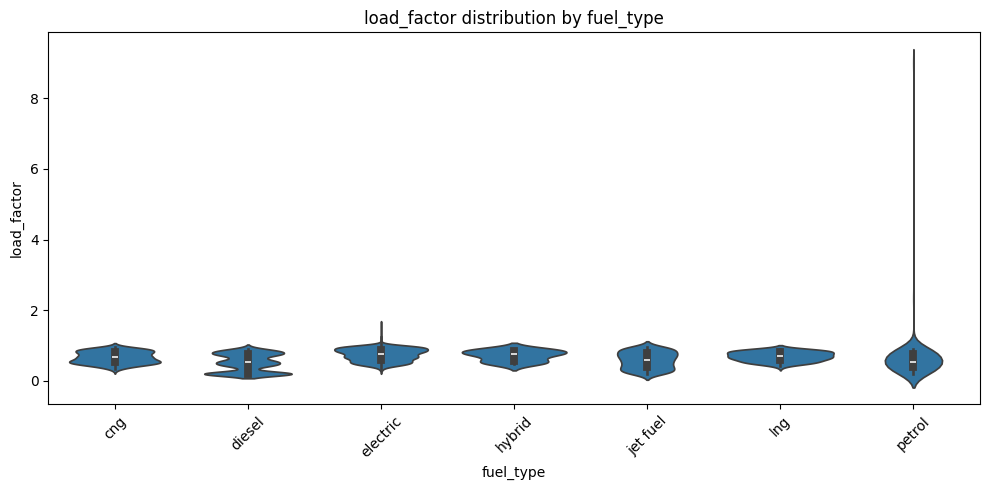

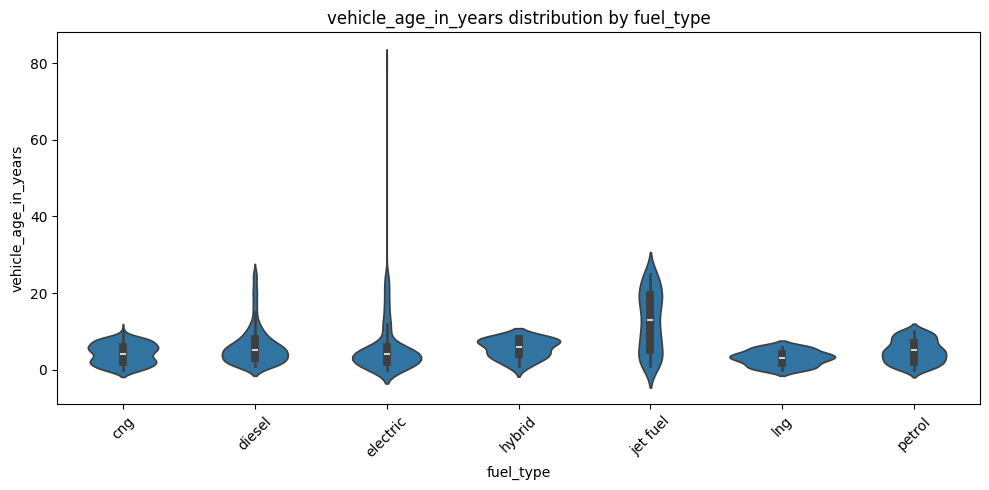

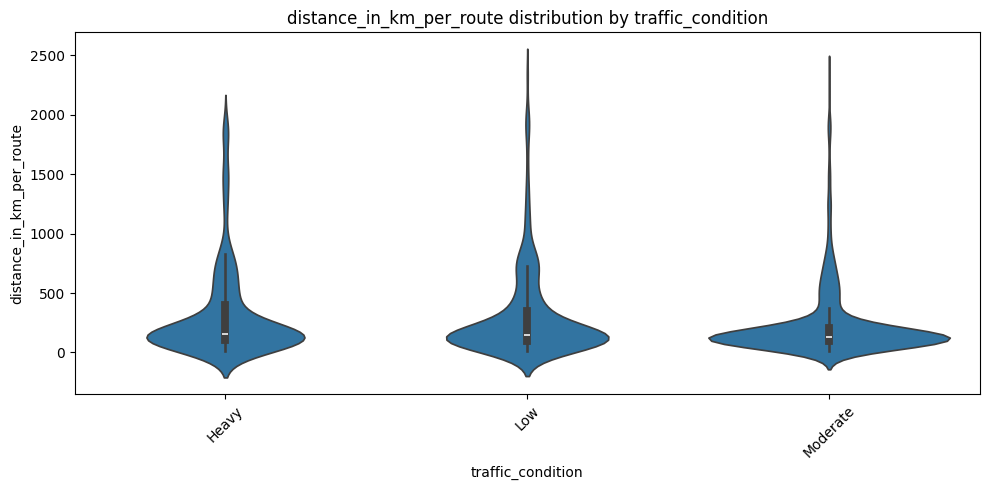

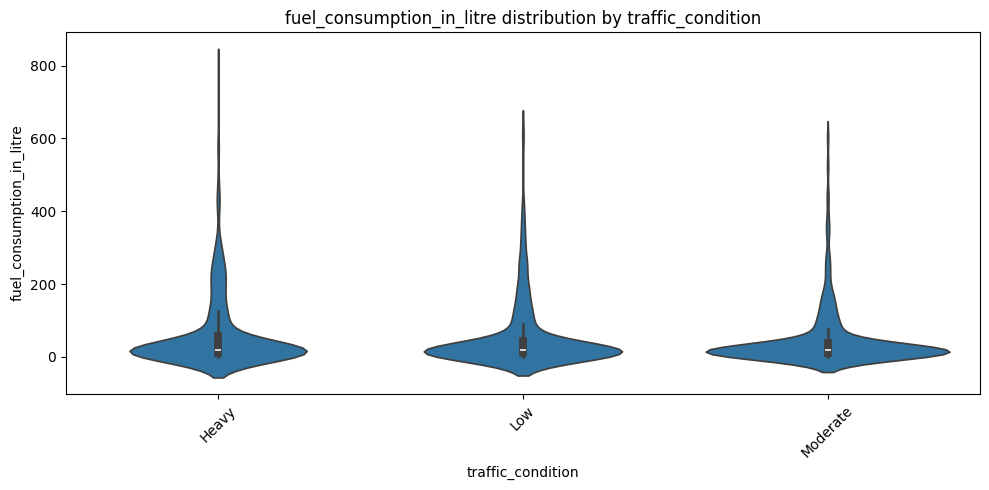

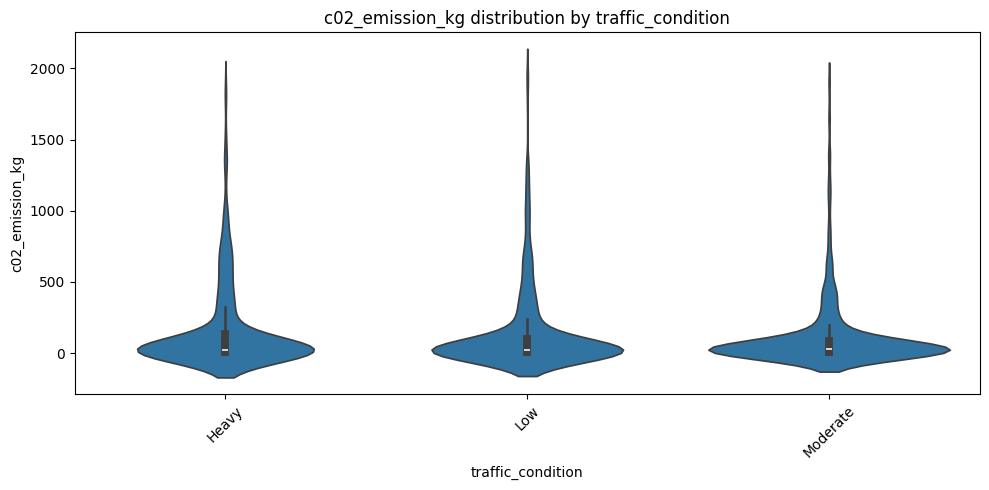

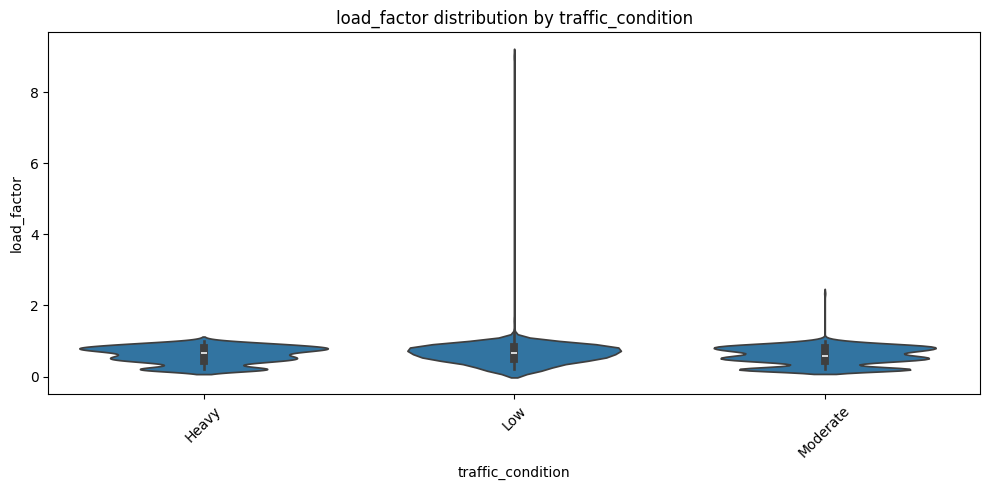

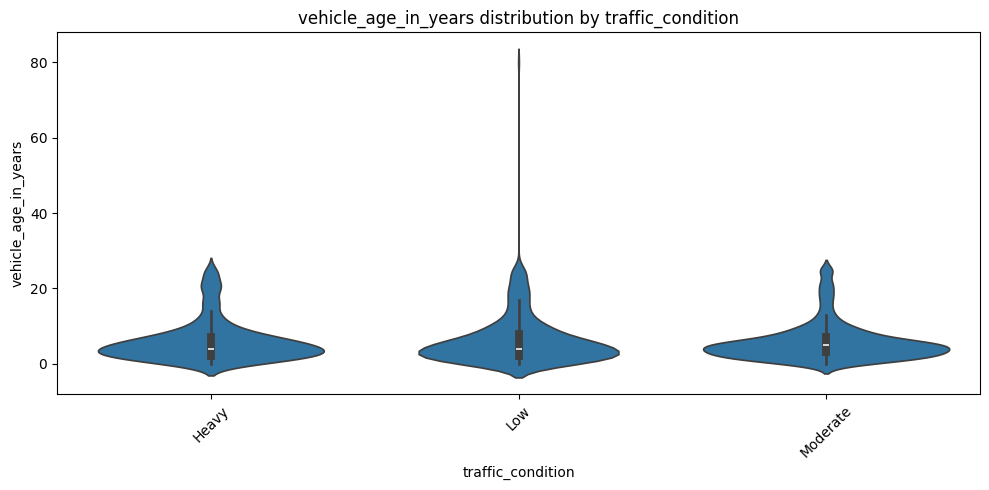

In [109]:
#Violin Plots
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.violinplot(x=cat_col, y=num_col, data=df_cleaned)
        plt.title(f'{num_col} distribution by {cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

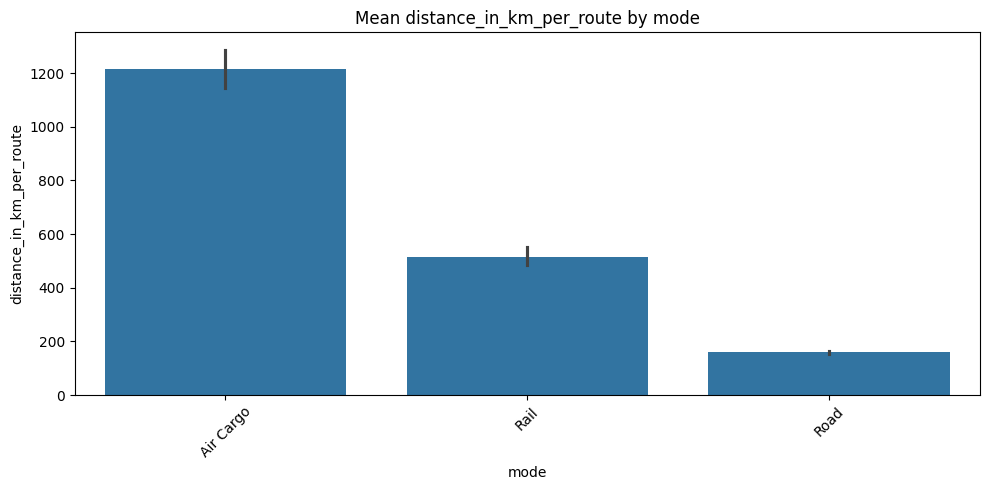

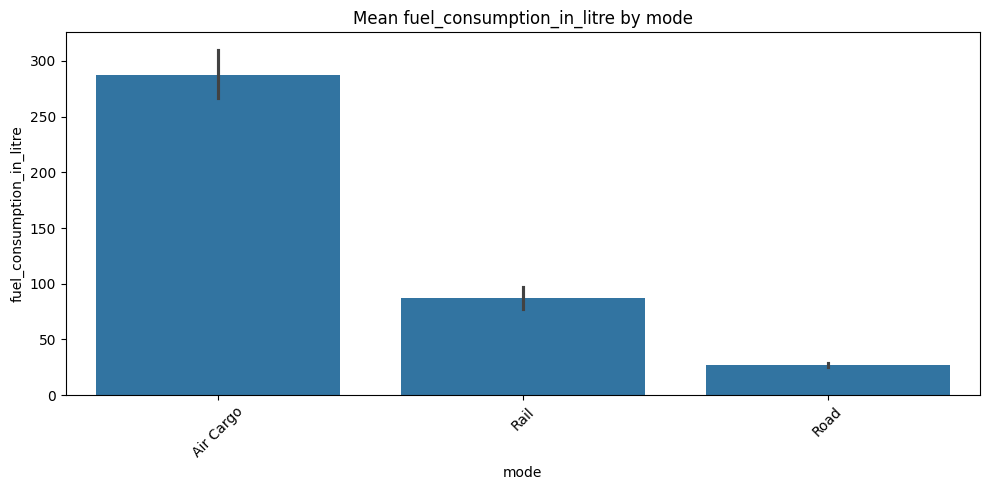

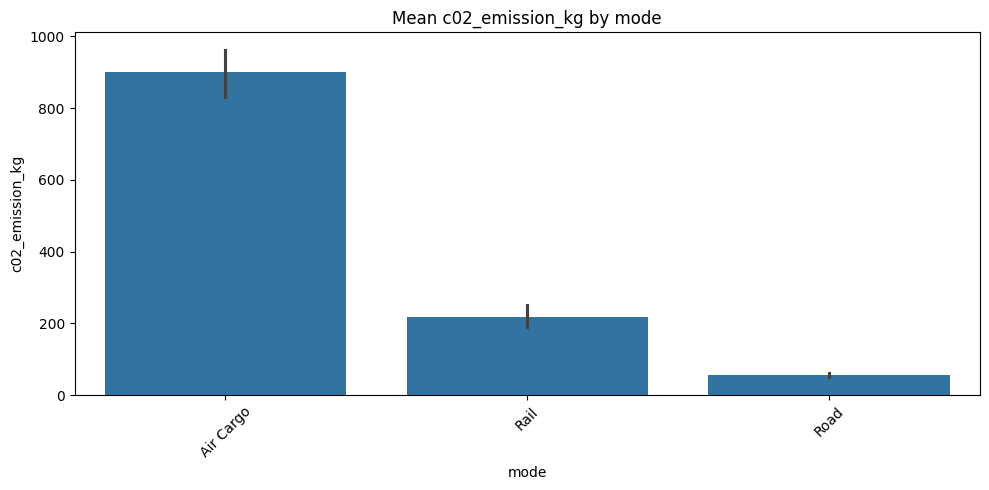

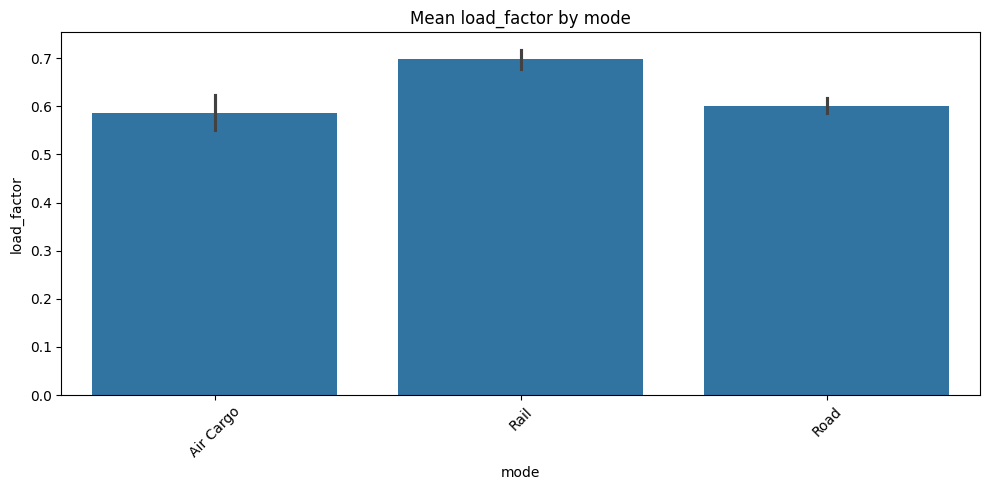

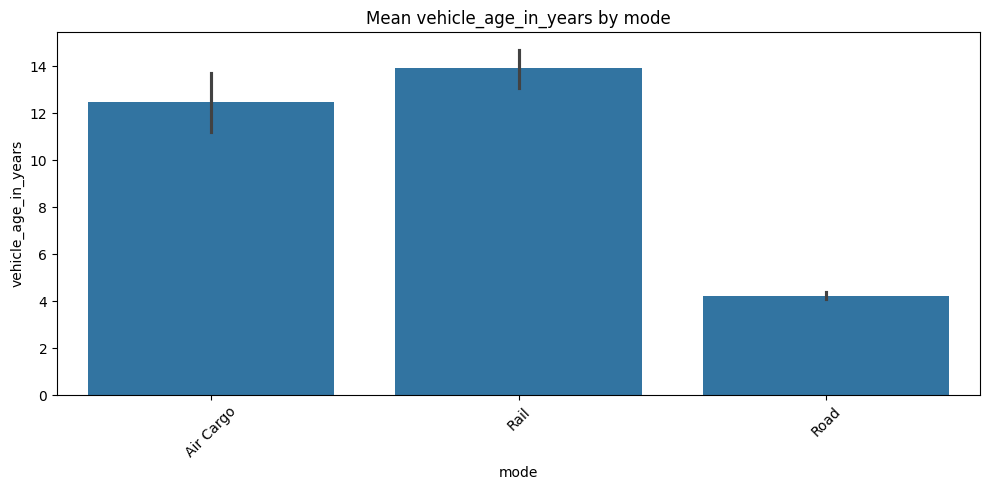

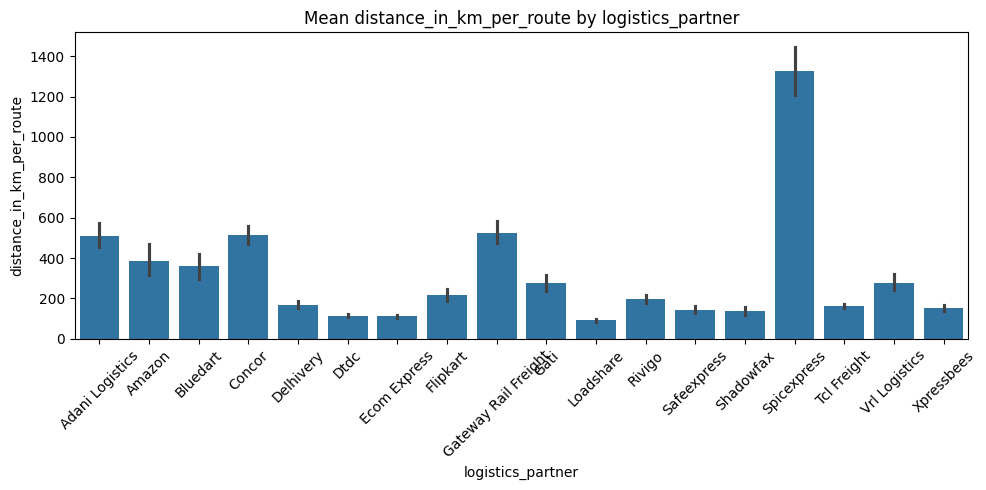

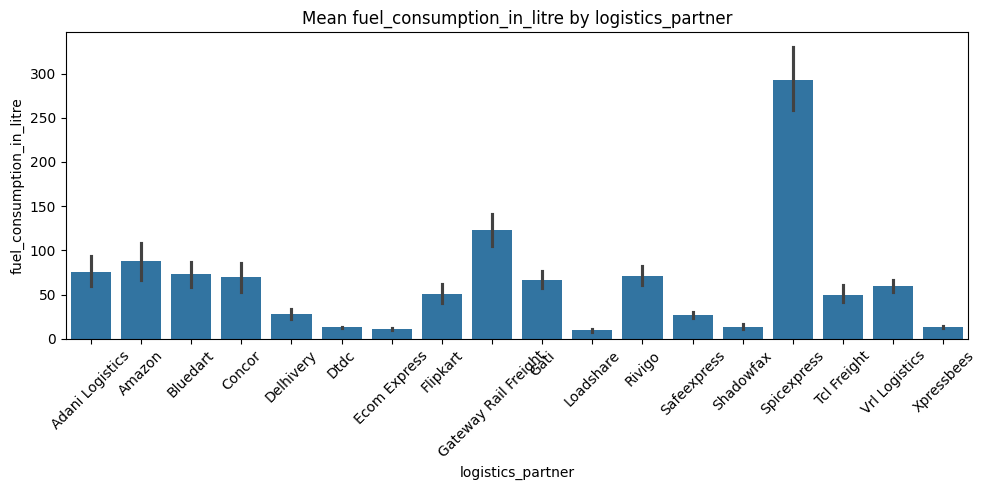

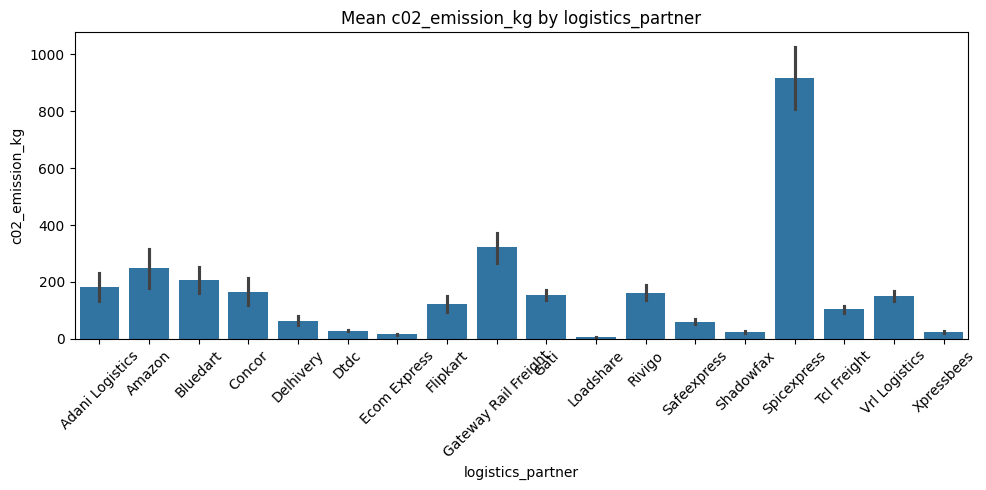

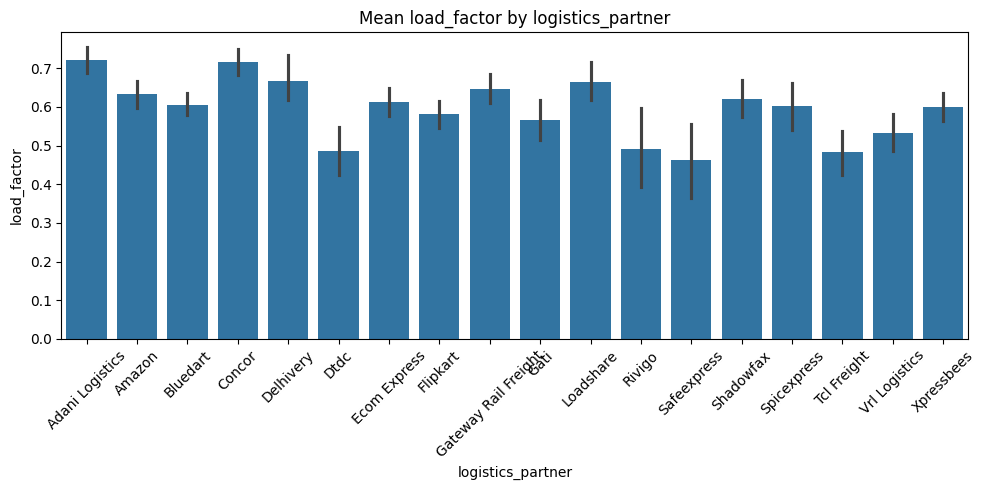

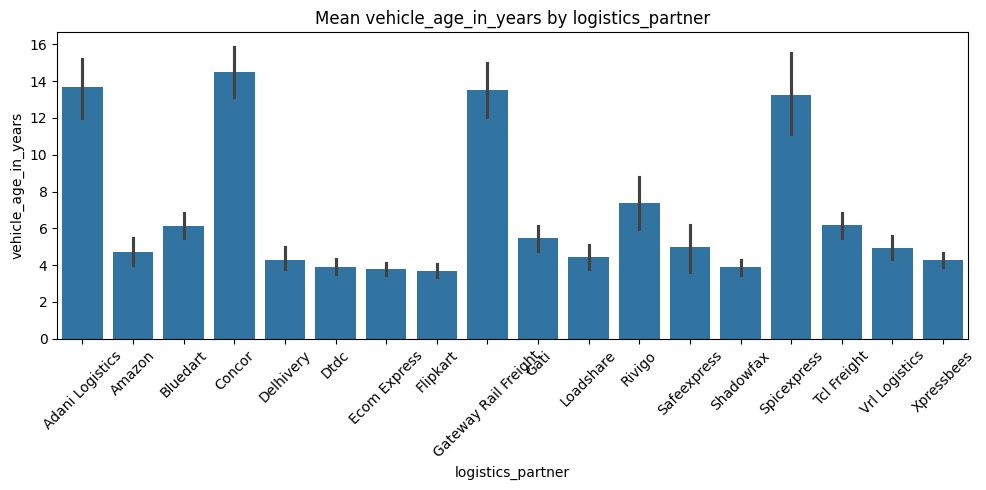

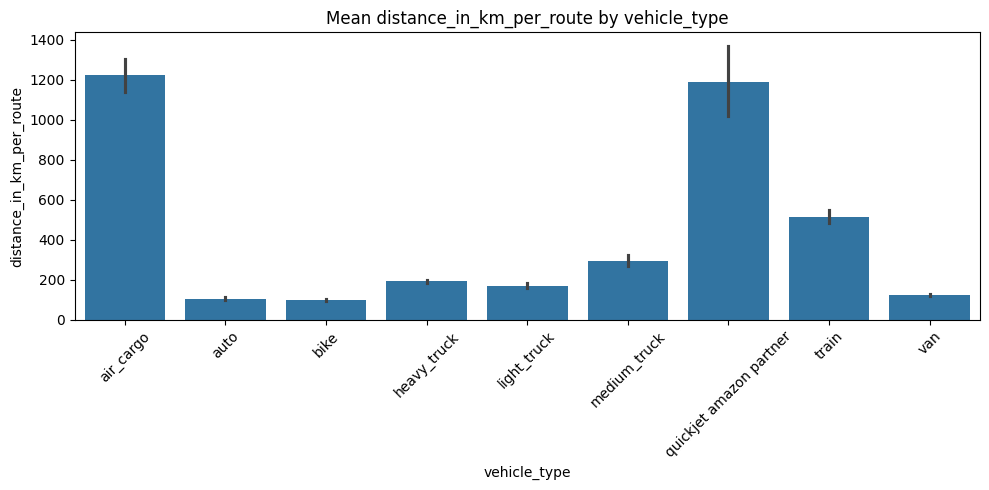

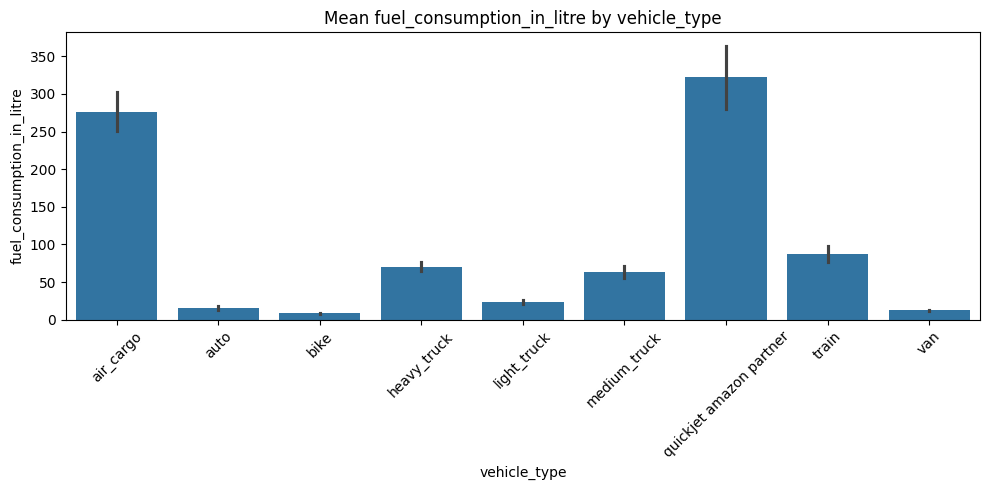

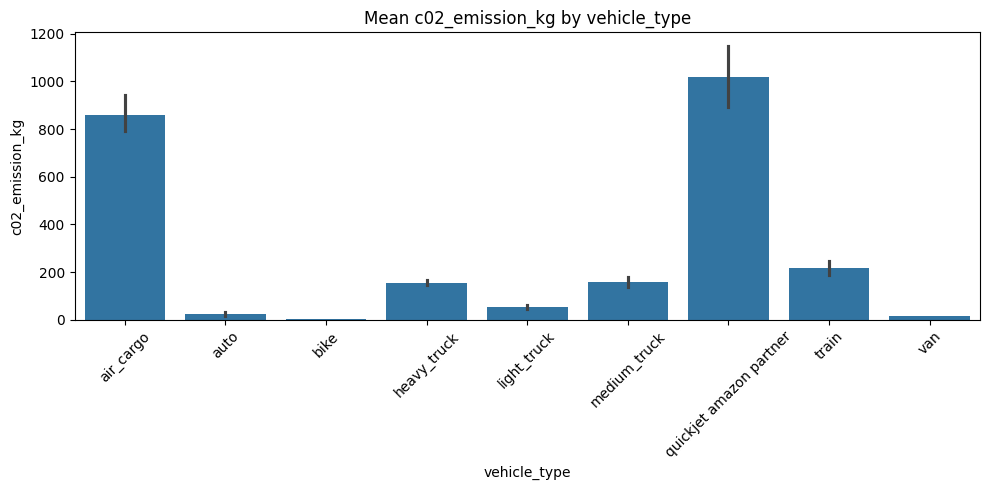

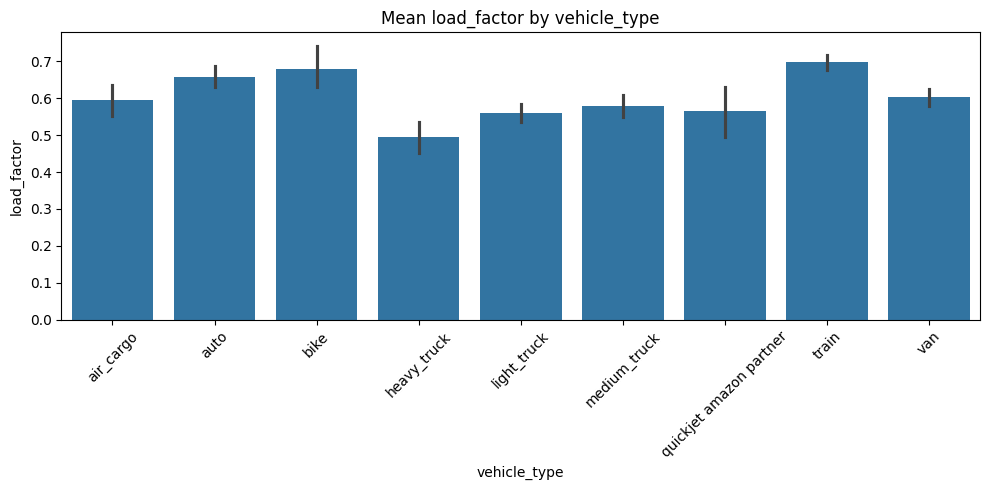

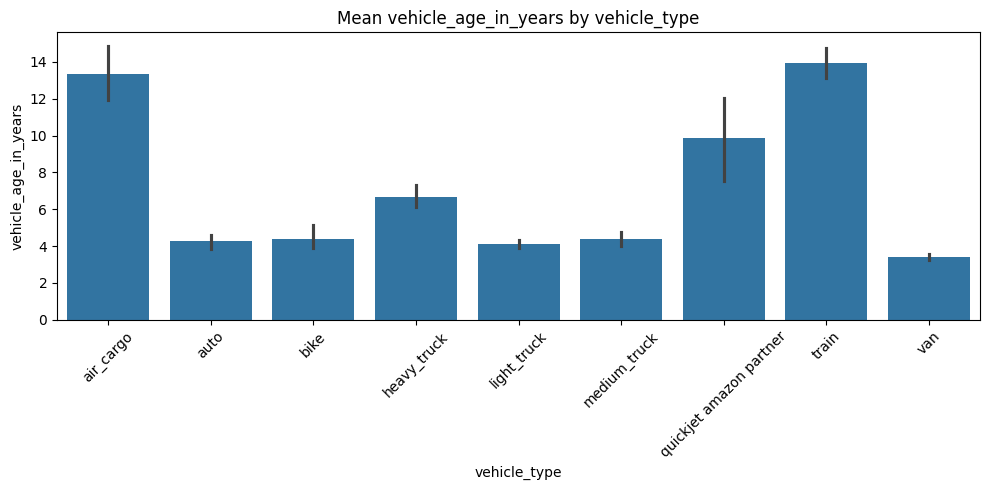

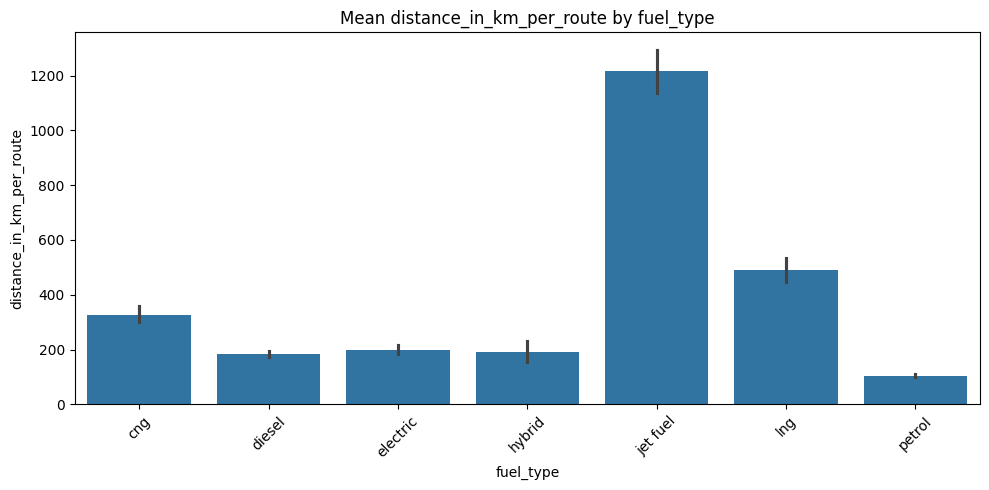

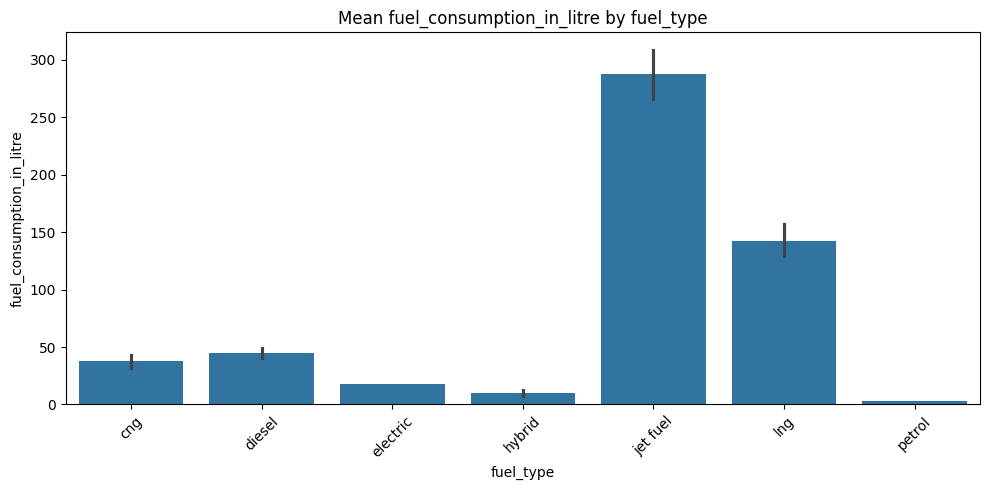

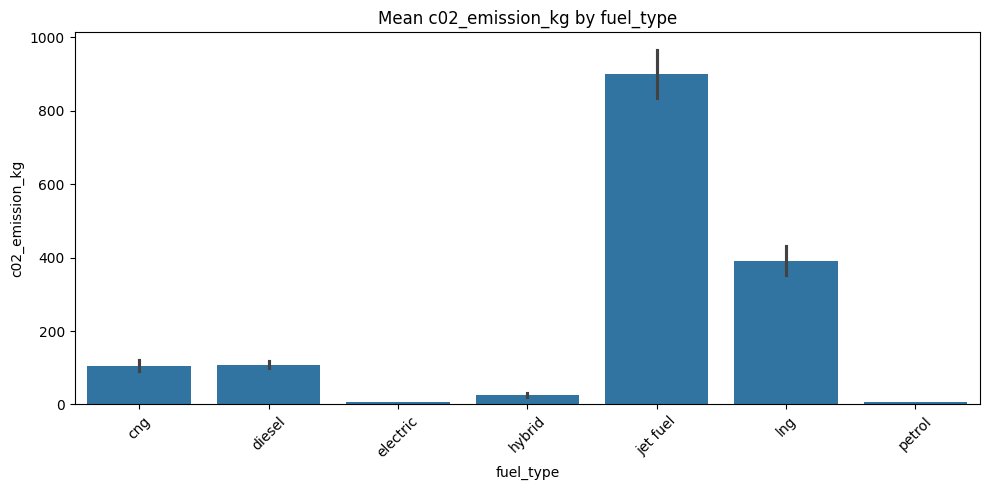

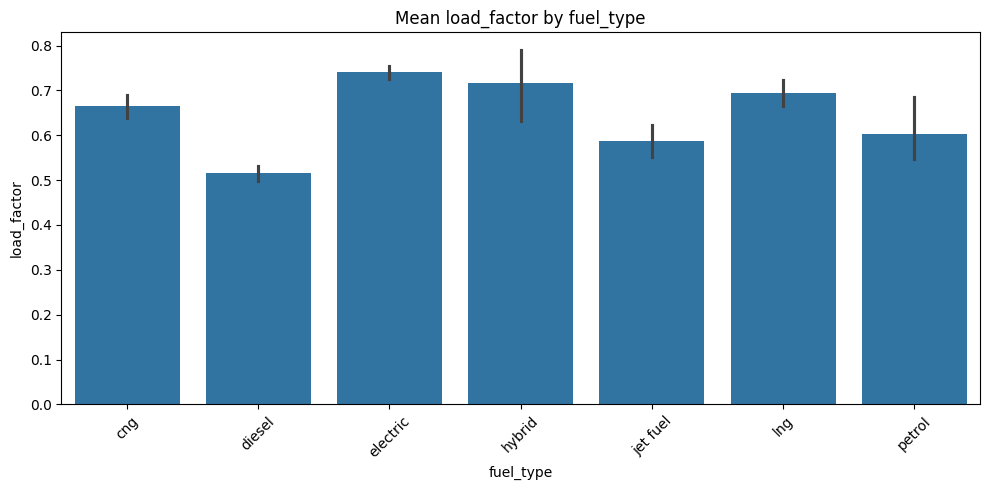

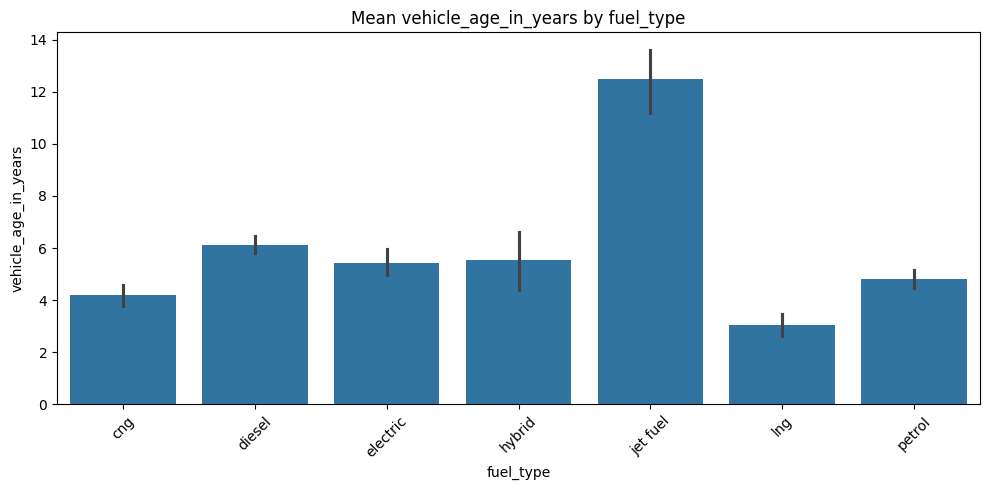

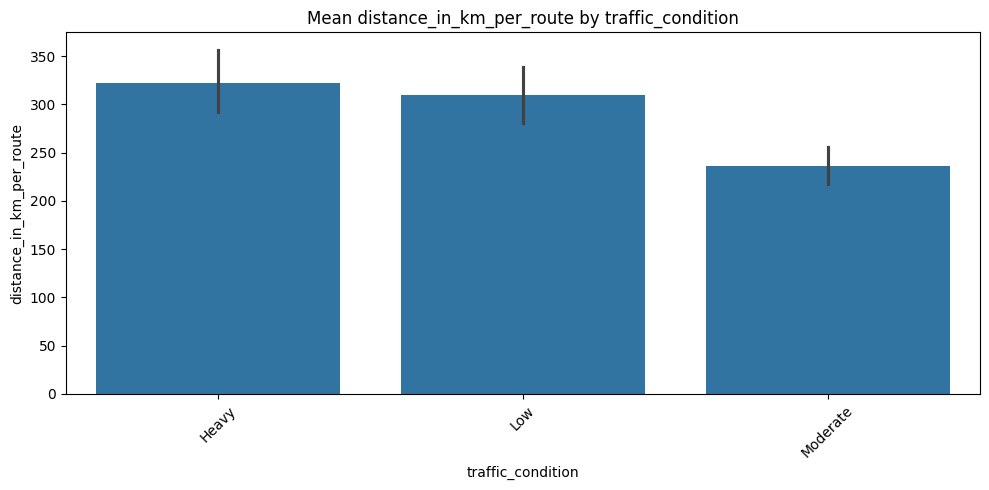

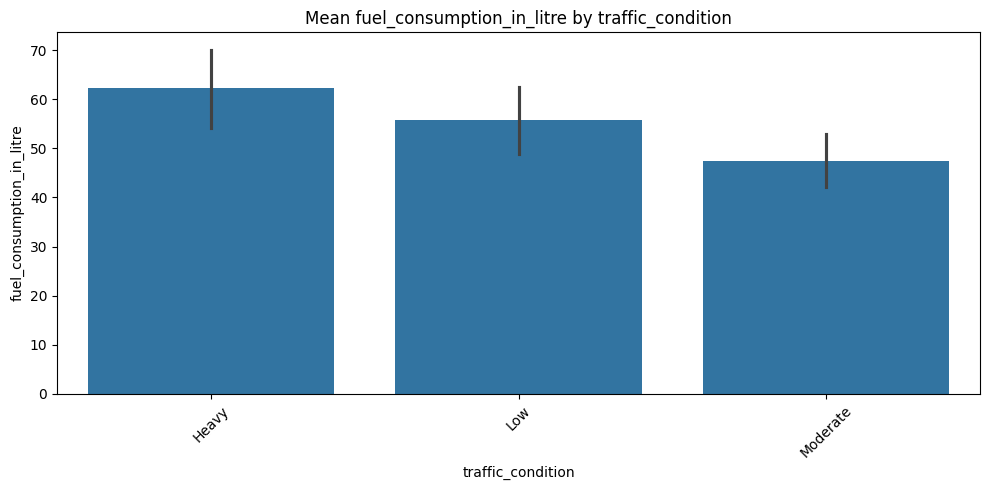

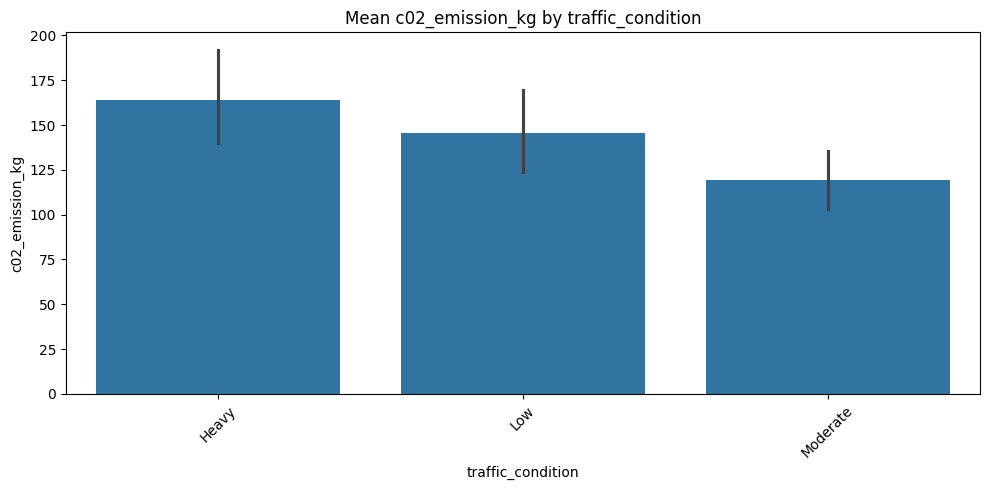

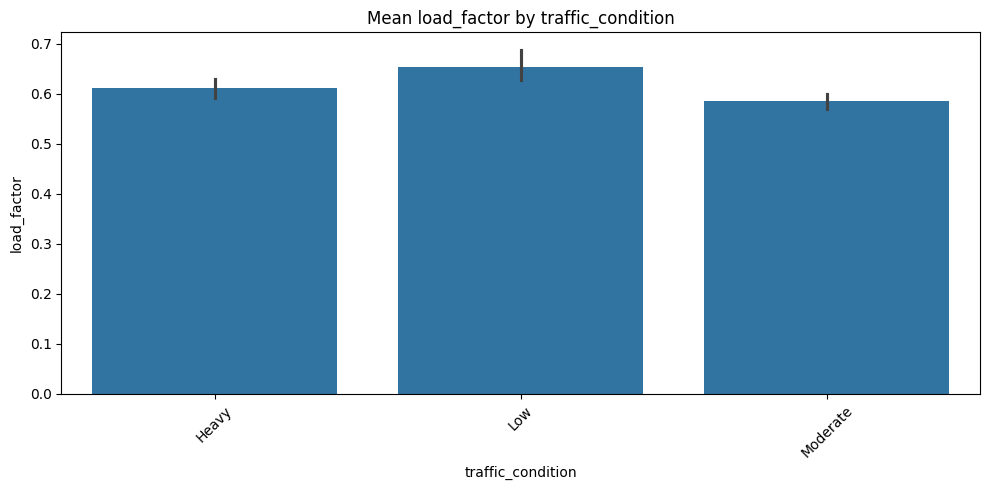

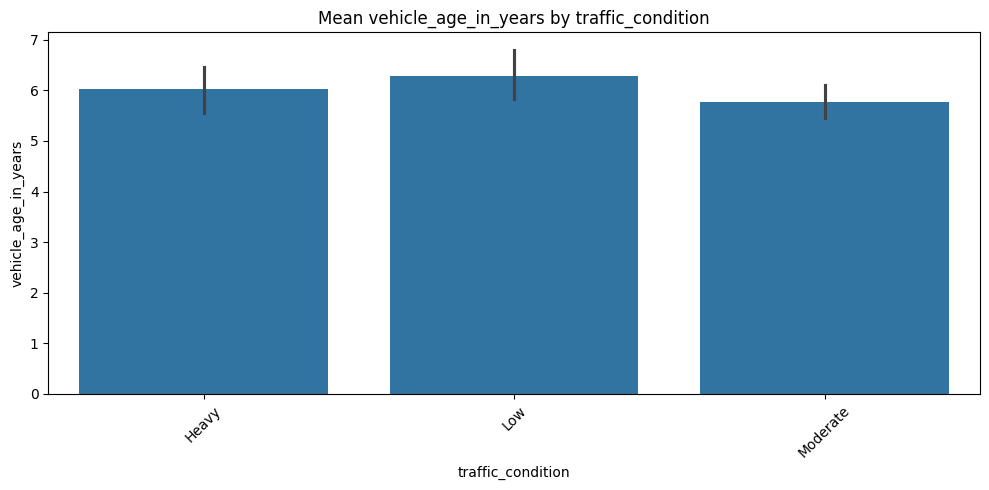

In [110]:
#Bar Plots (Mean value comparisons)
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=cat_col, y=num_col, data=df_cleaned, estimator='mean')
        plt.title(f'Mean {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

DETECTING OUTLIERS

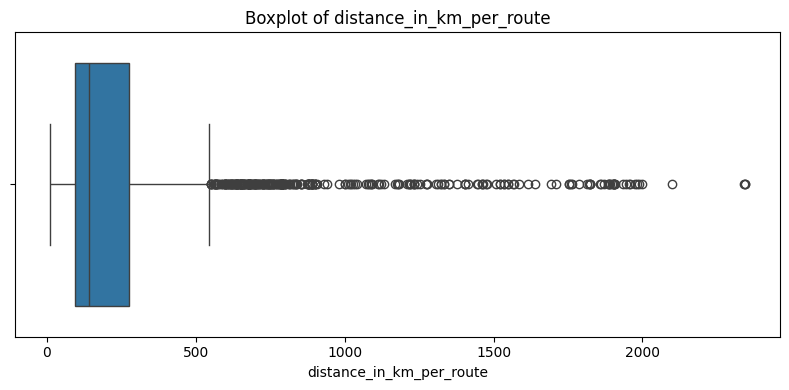

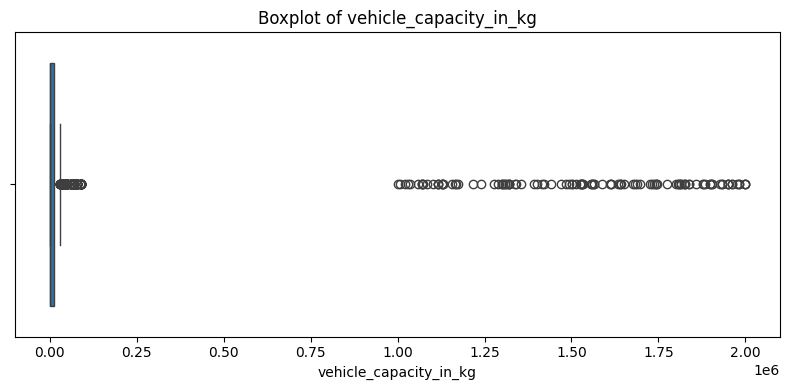

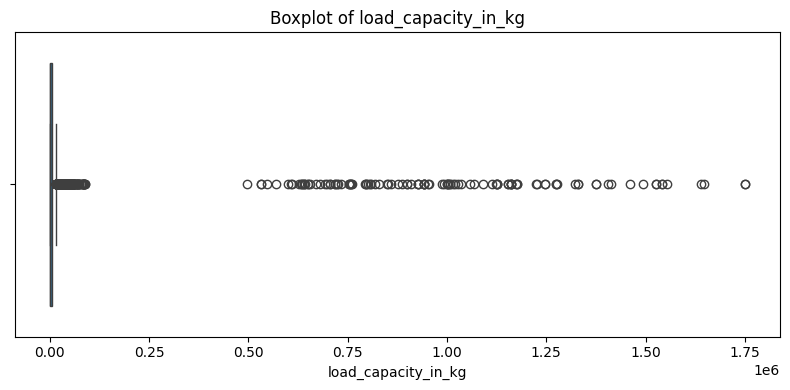

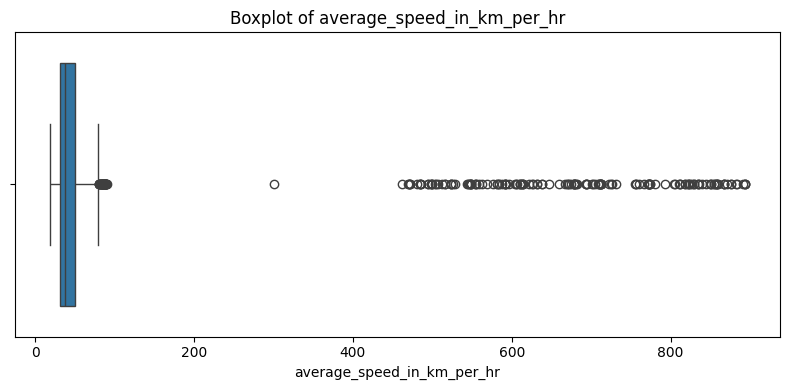

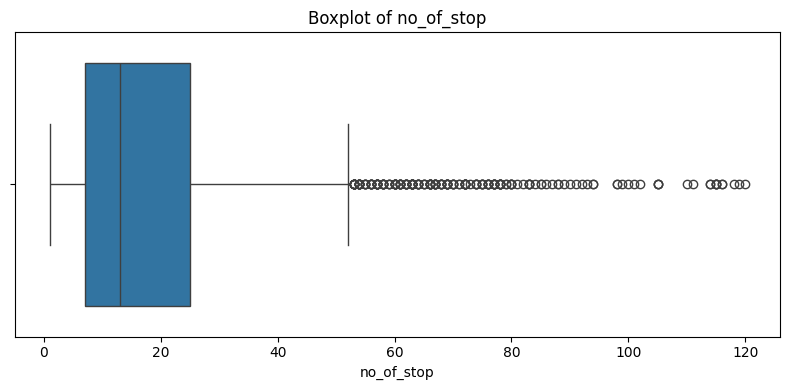

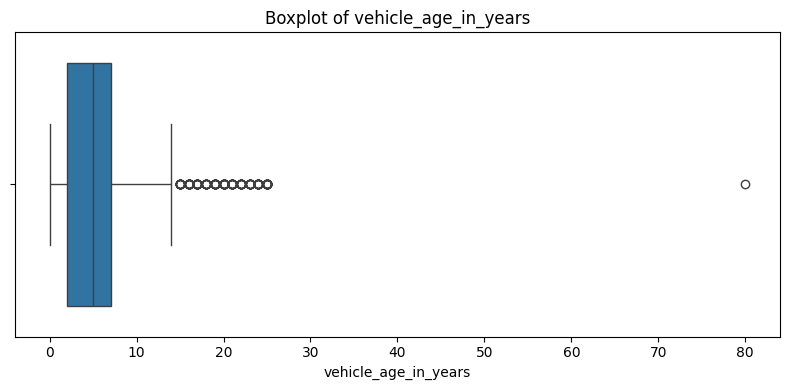

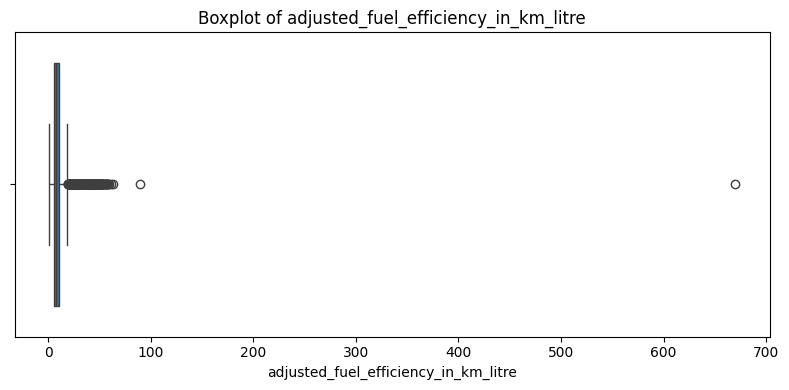

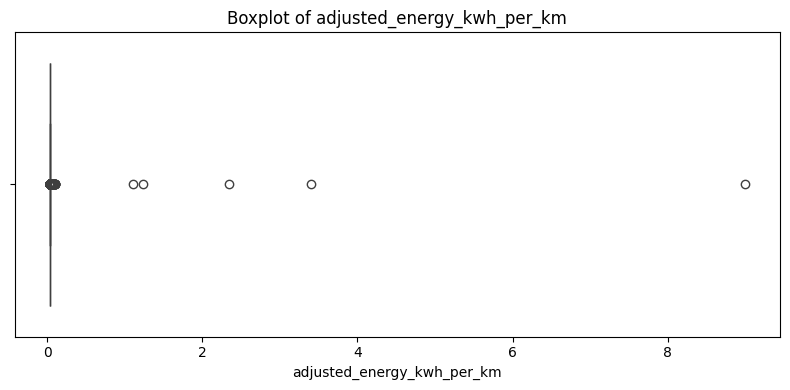

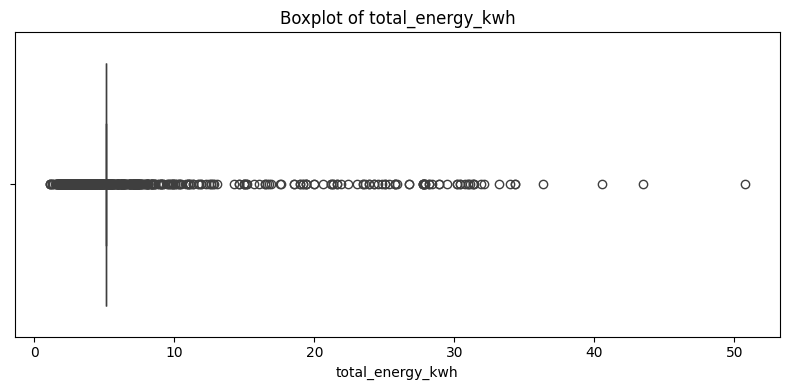

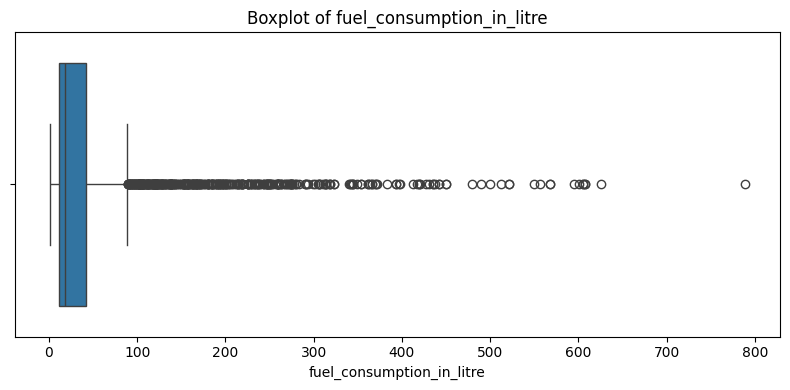

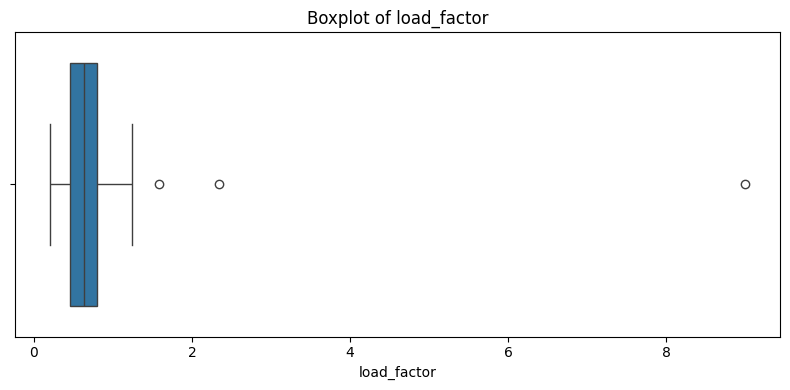

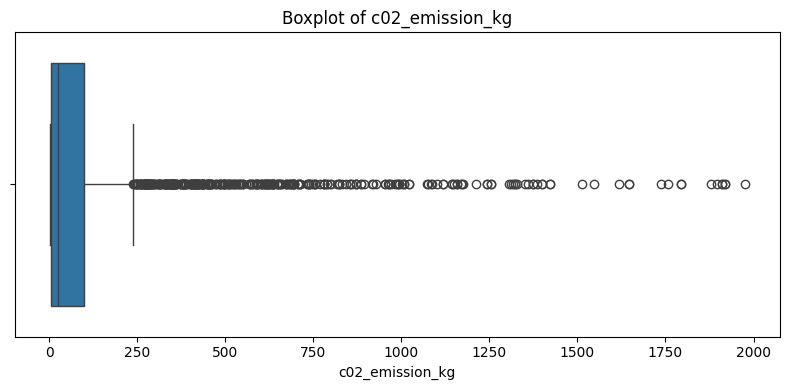

In [111]:
numeric_cols = df_cleaned.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [112]:
numeric_df = df_cleaned.select_dtypes(include='number')
z_scores = np.abs(zscore(numeric_df, nan_policy='omit'))
threshold = 3
outlier_mask = (z_scores > threshold)
outlier_counts = outlier_mask.sum(axis=0)

print(" Outlier count per column using Z-score method:")
print(outlier_counts)


 Outlier count per column using Z-score method:
[ 66  95  83 104  41  52   2   5  68  54   3  61]


FEATURE ENGINEERING

In [113]:
df_cleaned['load_utilization'] = df_cleaned['load_capacity_in_kg'] / df_cleaned['vehicle_capacity_in_kg']
df_cleaned['load_utilization'] = df_cleaned['load_utilization'].clip(upper=1.0)  # Load cannot exceed 100%

# Fuel consumption per km
df_cleaned['fuel_per_km'] = df_cleaned['fuel_consumption_in_litre'] / df_cleaned['distance_in_km_per_route']
df_cleaned['fuel_per_km'] = df_cleaned['fuel_per_km'].replace([np.inf, -np.inf], np.nan)

# CO2 emission per km
df_cleaned['co2_per_km'] = df_cleaned['c02_emission_kg'] / df_cleaned['distance_in_km_per_route']
df_cleaned['co2_per_km'] = df_cleaned['co2_per_km'].replace([np.inf, -np.inf], np.nan)

# CO2 emission per litre of fuel (for non-electric only)
df_cleaned['co2_per_litre'] = df_cleaned['c02_emission_kg'] / df_cleaned['fuel_consumption_in_litre']
df_cleaned['co2_per_litre'] = df_cleaned['co2_per_litre'].replace([np.inf, -np.inf], np.nan)

# Speed per stop — might indicate operational efficiency
df_cleaned['speed_per_stop'] = df_cleaned['average_speed_in_km_per_hr'] / df_cleaned['no_of_stop']
df_cleaned['speed_per_stop'] = df_cleaned['speed_per_stop'].replace([np.inf, -np.inf], np.nan)

print("\nFeature engineering complete. New columns added:")
print(['load_utilization', 'fuel_per_km', 'co2_per_km', 'co2_per_litre', 'speed_per_stop'])
df_cleaned[['load_utilization', 'fuel_per_km', 'co2_per_km', 'co2_per_litre', 'speed_per_stop']].describe()



Feature engineering complete. New columns added:
['load_utilization', 'fuel_per_km', 'co2_per_km', 'co2_per_litre', 'speed_per_stop']


load_utilization  fuel_per_km   co2_per_km  co2_per_litre  \
count       2109.000000  2109.000000  2109.000000    2109.000000   
mean           0.606803     0.179570     0.349380       1.956739   
std            0.237112     0.398199     1.060655       1.547484   
min            0.123000     0.005740     0.006292       0.057189   
25%            0.451362     0.077468     0.042532       1.188129   
50%            0.631471     0.137556     0.208841       2.299995   
75%            0.804014     0.243855     0.505371       2.404255   
max            1.000000    15.830833    42.426667      37.168182   

       speed_per_stop  
count     2109.000000  
mean        27.015266  
std         97.731506  
min          0.194000  
25%          1.290625  
50%          2.686923  
75%          6.935556  
max        884.000000

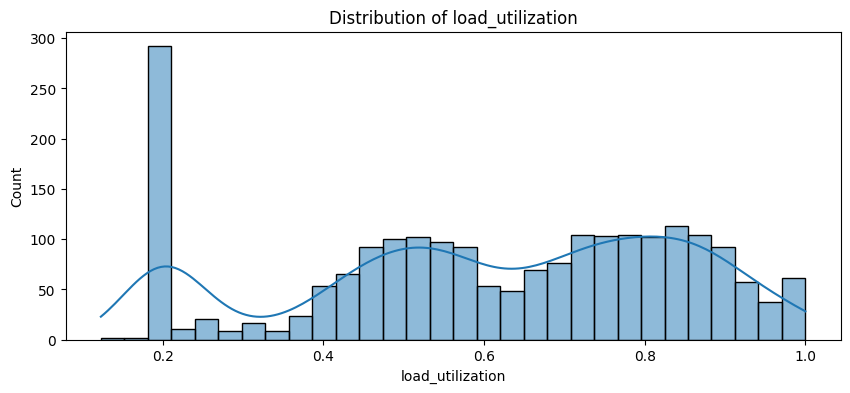

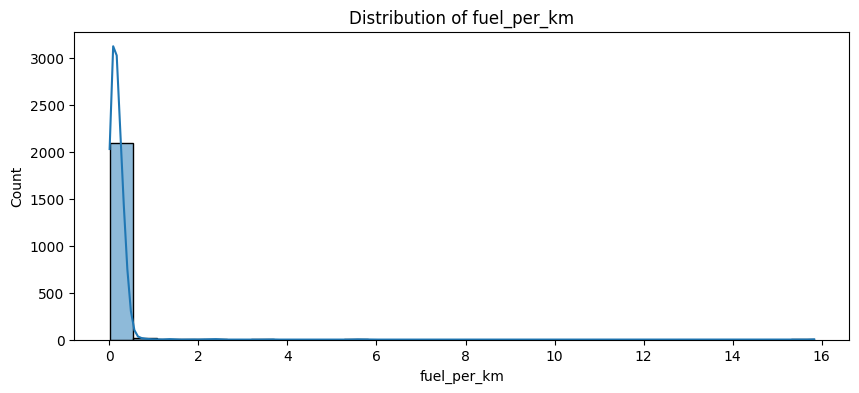

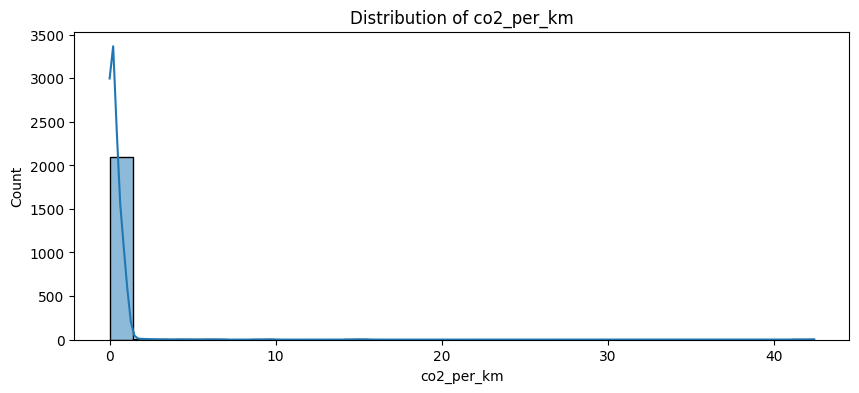

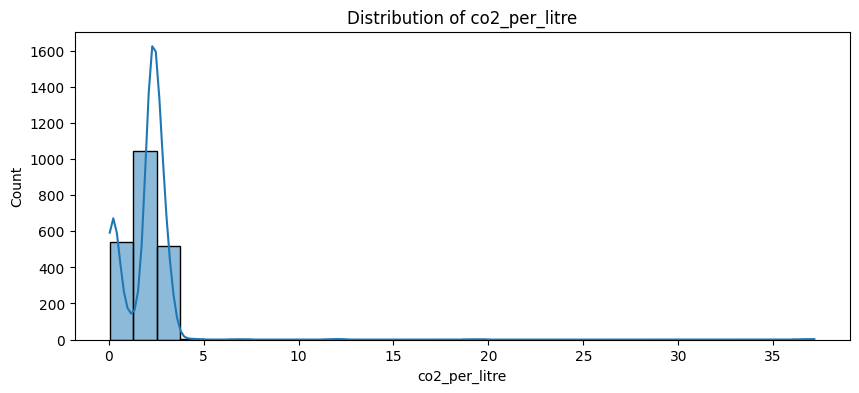

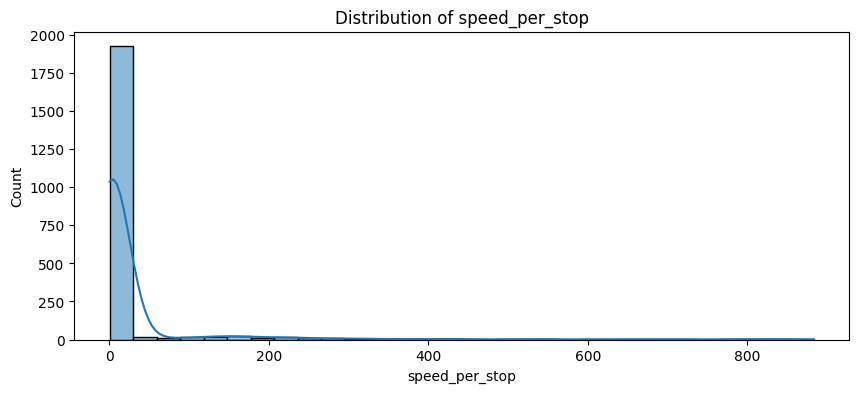

In [114]:
engineered_features = ['load_utilization', 'fuel_per_km', 'co2_per_km', 'co2_per_litre', 'speed_per_stop']

for feature in engineered_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [115]:
missing_engineered = df_cleaned[engineered_features].isnull().sum()
print("Missing Values in Engineered Features:\n", missing_engineered[missing_engineered > 0])


Missing Values in Engineered Features:
 Series([], dtype: int64)


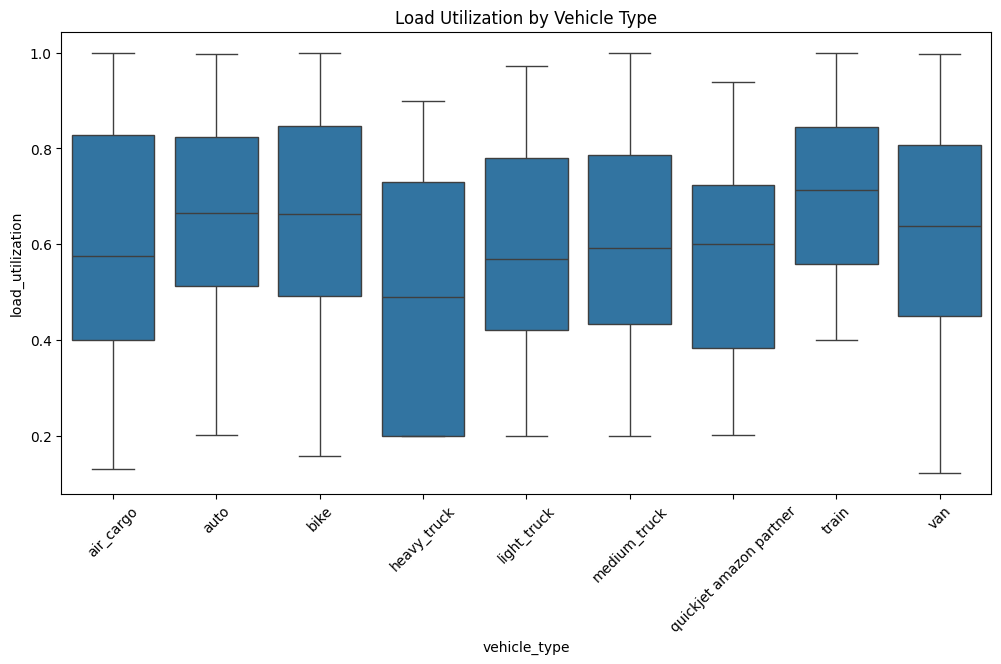

In [116]:
# load utilization by vehicle type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='vehicle_type', y='load_utilization')
plt.xticks(rotation=45)
plt.title("Load Utilization by Vehicle Type")
plt.show()


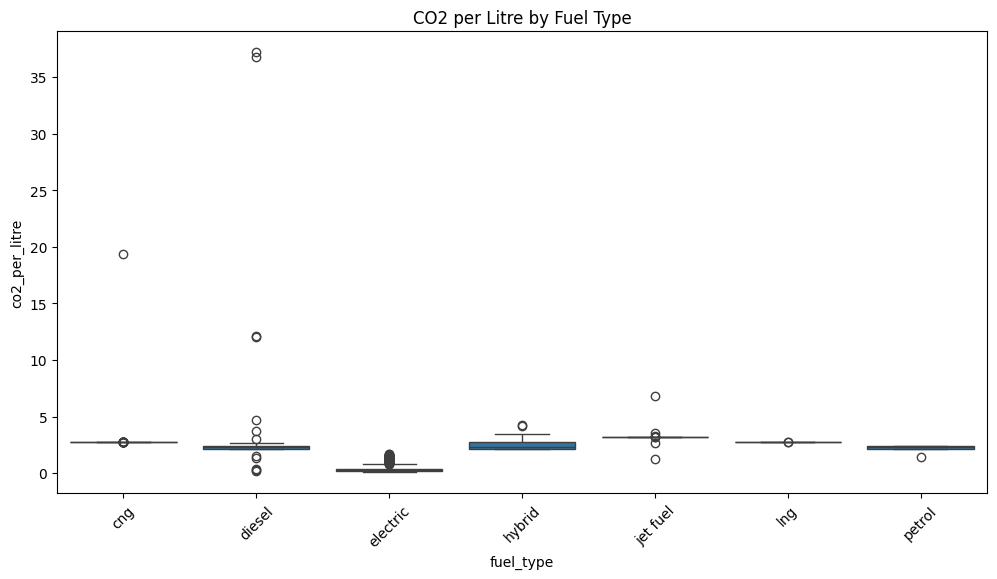

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='fuel_type', y='co2_per_litre')
plt.xticks(rotation=45)
plt.title("CO2 per Litre by Fuel Type")
plt.show()


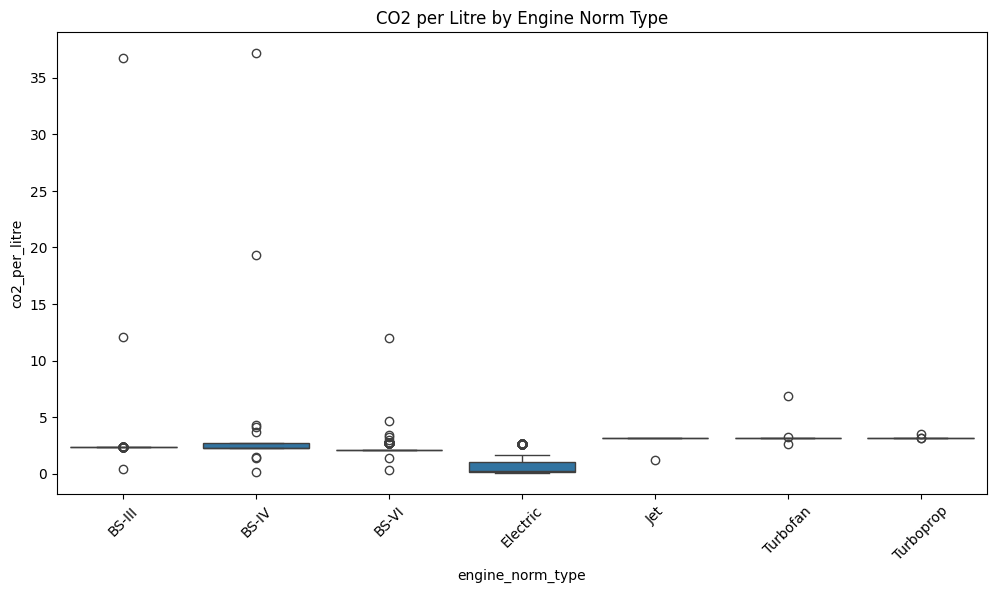

In [118]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='engine_norm_type', y='co2_per_litre')
plt.xticks(rotation=45)
plt.title("CO2 per Litre by Engine Norm Type")
plt.show()


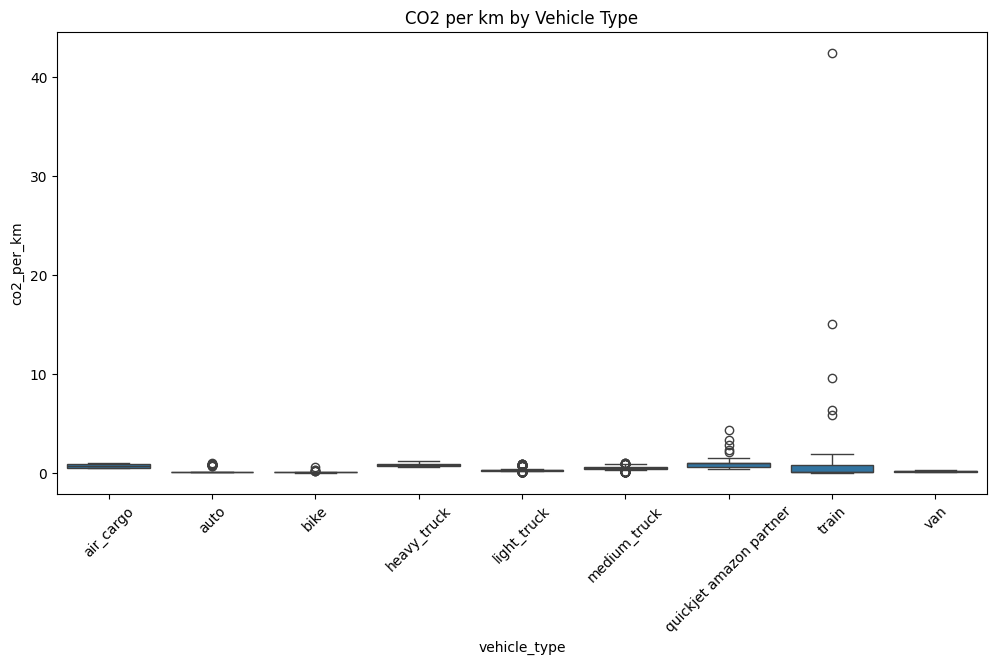

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='vehicle_type', y='co2_per_km')
plt.xticks(rotation=45)
plt.title("CO2 per km by Vehicle Type")
plt.show()


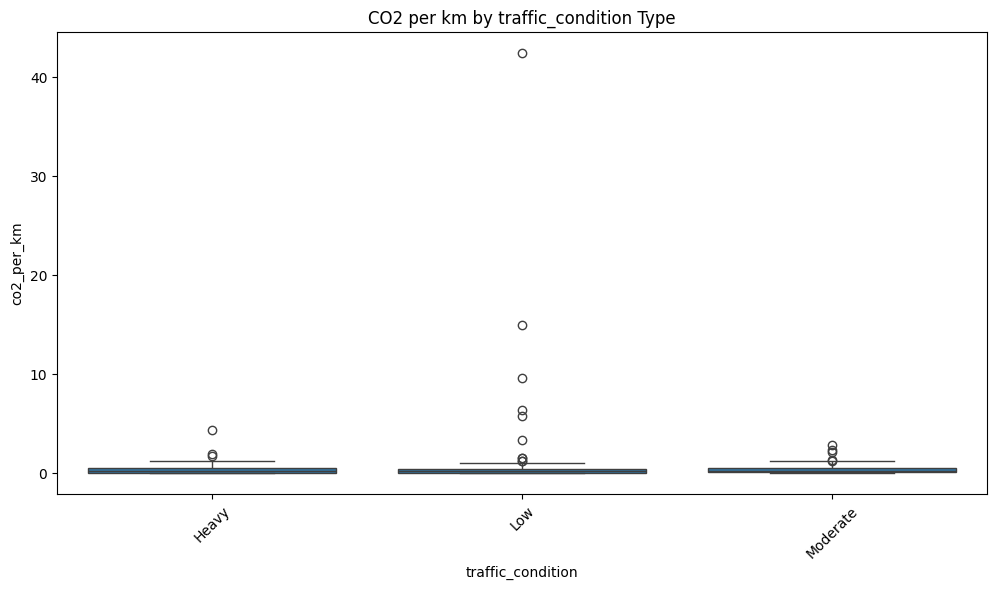

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='traffic_condition', y='co2_per_km')
plt.xticks(rotation=45)
plt.title("CO2 per km by traffic_condition Type")
plt.show()


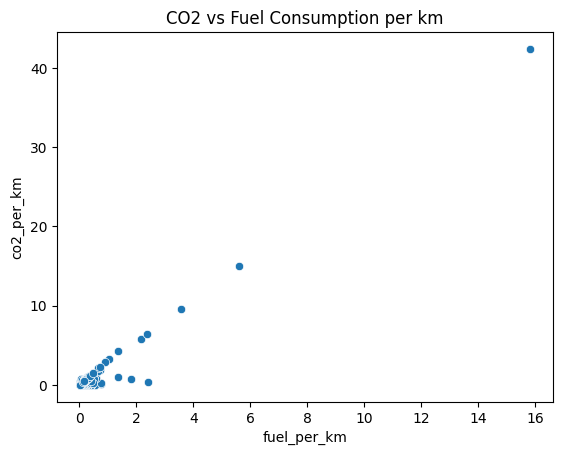

In [121]:
sns.scatterplot(data=df_cleaned, x='fuel_per_km', y='co2_per_km')
plt.title("CO2 vs Fuel Consumption per km")
plt.show()


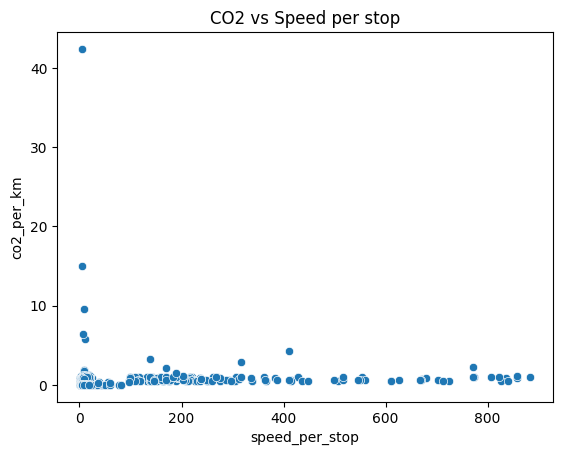

In [122]:
sns.scatterplot(data=df_cleaned, x='speed_per_stop', y='co2_per_km')
plt.title("CO2 vs Speed per stop")
plt.show()


In [123]:
df_cleaned.groupby('fuel_type')[['fuel_per_km', 'co2_per_km', 'co2_per_litre']].mean().sort_values(by='fuel_per_km')


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1660397872.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby('fuel_type')[['fuel_per_km', 'co2_per_km', 'co2_per_litre']].mean().sort_values(by='fuel_per_km')


fuel_per_km  co2_per_km  co2_per_litre
fuel_type                                        
petrol        0.029469    0.066099       2.265435
hybrid        0.052406    0.129067       2.618889
cng           0.093361    0.258014       2.852363
electric      0.167543    0.039824       0.384276
diesel        0.224768    0.529150       2.416361
jet fuel      0.251085    0.790354       3.170560
lng           0.290342    0.798441       2.750002

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\4137784884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_summary = df_cleaned.groupby('fuel_type')[['fuel_per_km', 'co2_per_km', 'co2_per_litre']].mean()


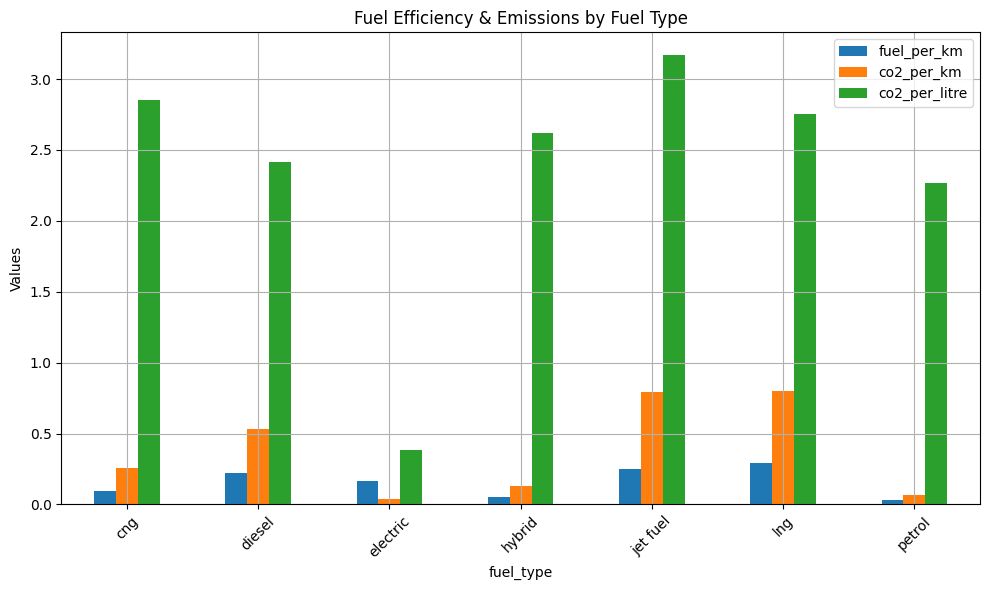

In [124]:
df_summary = df_cleaned.groupby('fuel_type')[['fuel_per_km', 'co2_per_km', 'co2_per_litre']].mean()

df_summary.plot(kind='bar', figsize=(10,6))
plt.title("Fuel Efficiency & Emissions by Fuel Type")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


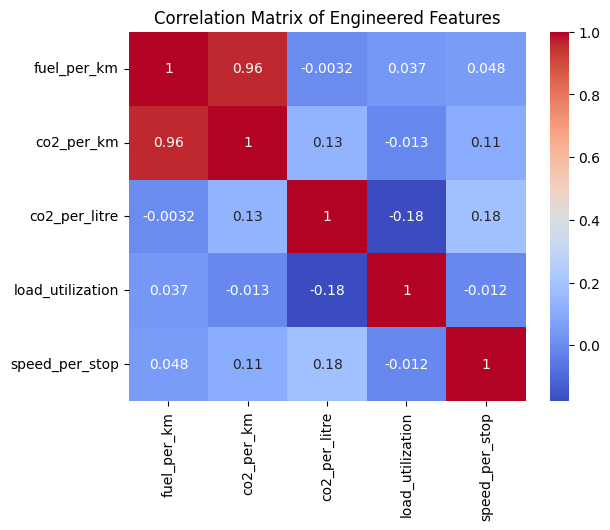

In [125]:
corr = df_cleaned[['fuel_per_km', 'co2_per_km', 'co2_per_litre', 'load_utilization', 'speed_per_stop']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Engineered Features")
plt.show()


In [126]:
df_cleaned.groupby('vehicle_type')[['fuel_per_km', 'co2_per_km']].mean().sort_values('fuel_per_km')


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1886920429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned.groupby('vehicle_type')[['fuel_per_km', 'co2_per_km']].mean().sort_values('fuel_per_km')


fuel_per_km  co2_per_km
vehicle_type                                    
van                         0.113172    0.137066
bike                        0.115581    0.047984
light_truck                 0.134821    0.267205
auto                        0.149271    0.151726
medium_truck                0.203636    0.459688
air_cargo                   0.221436    0.695627
train                       0.294584    0.722705
quickjet amazon partner     0.339294    1.072168
heavy_truck                 0.365756    0.798823

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1437766304.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vehicle = df_cleaned.groupby('vehicle_type')[['fuel_per_km', 'co2_per_km']].mean().sort_values('fuel_per_km')


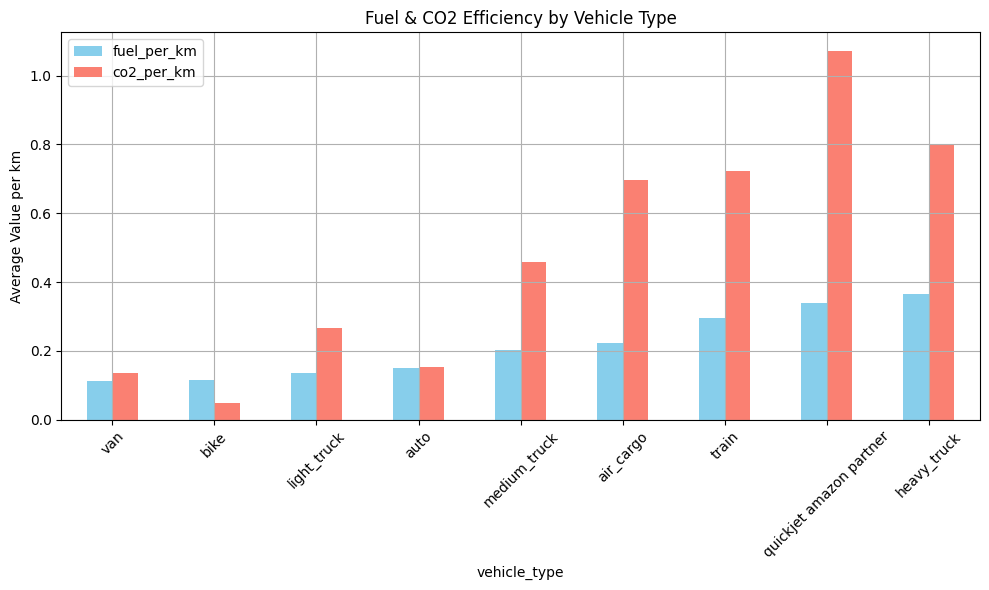

In [127]:
df_vehicle = df_cleaned.groupby('vehicle_type')[['fuel_per_km', 'co2_per_km']].mean().sort_values('fuel_per_km')

df_vehicle.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
plt.title("Fuel & CO2 Efficiency by Vehicle Type")
plt.ylabel("Average Value per km")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


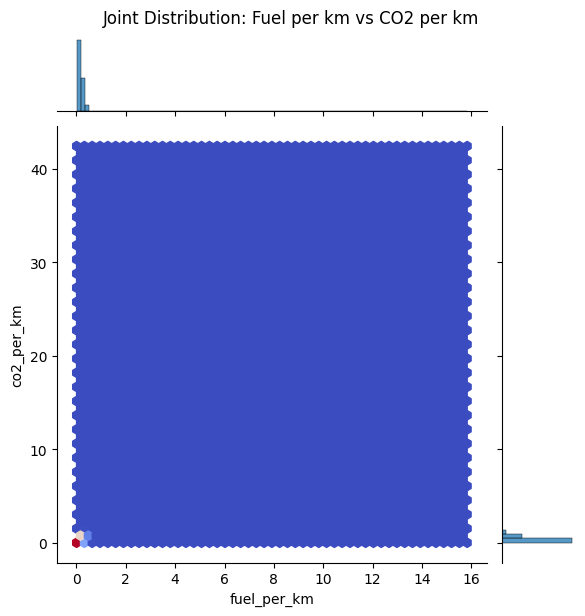

In [128]:
sns.jointplot(data=df_cleaned, x='fuel_per_km', y='co2_per_km', kind='hex', cmap='coolwarm')
plt.suptitle("Joint Distribution: Fuel per km vs CO2 per km", y=1.02)
plt.show()


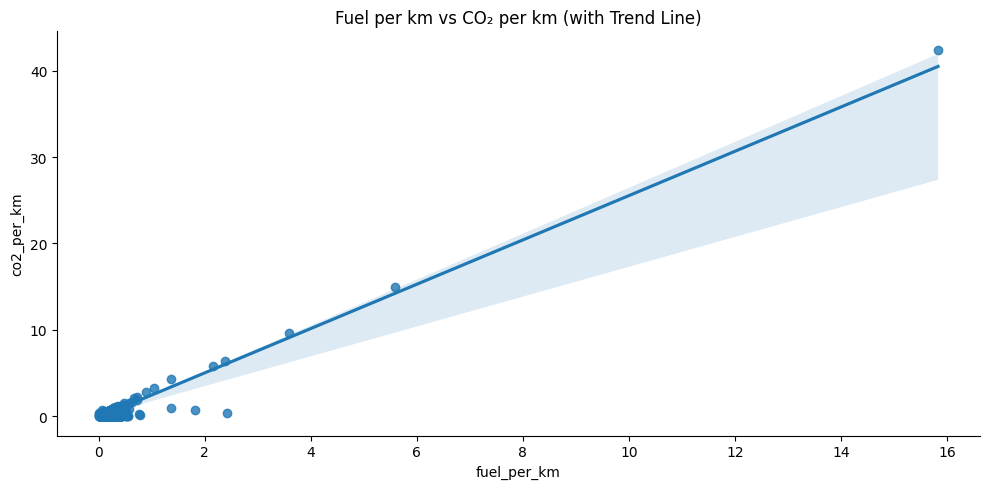

In [129]:
sns.lmplot(data=df_cleaned, x='fuel_per_km', y='co2_per_km', aspect=2)
plt.title("Fuel per km vs CO₂ per km (with Trend Line)")
plt.tight_layout()
plt.show()


MULTIVARIATE ANALYSIS

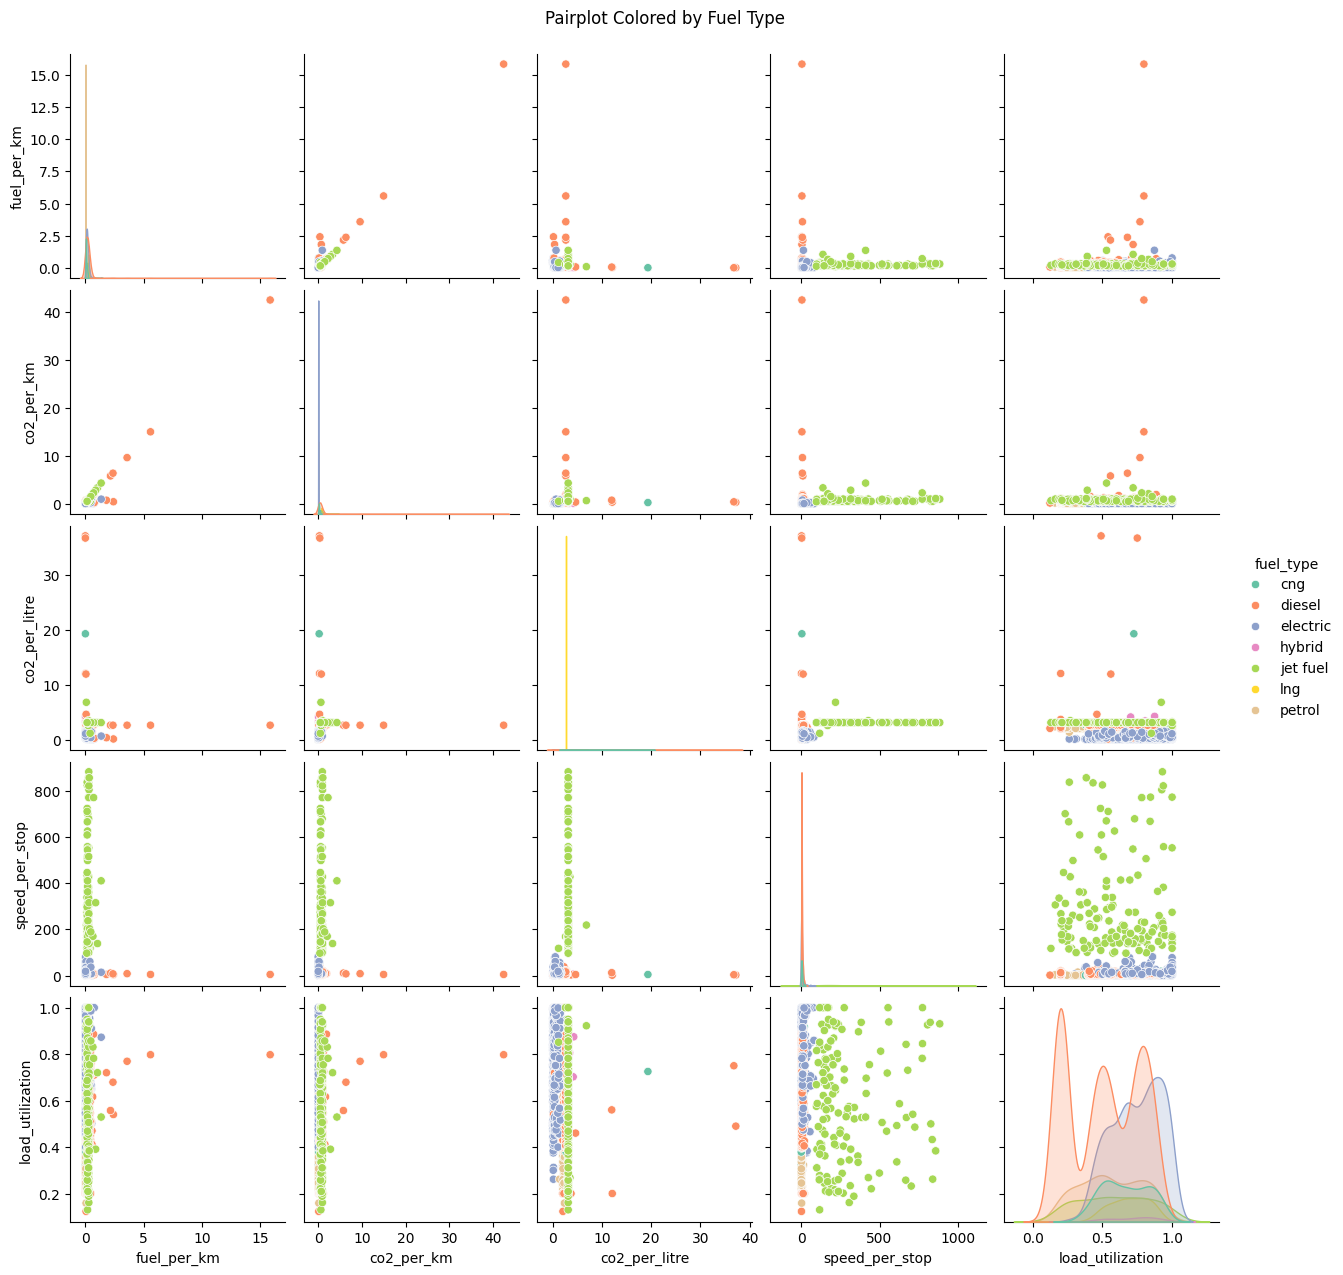

In [130]:
sns.pairplot(df_cleaned[[
    'fuel_per_km', 'co2_per_km', 'co2_per_litre', 'speed_per_stop', 'load_utilization', 'fuel_type'
]], hue='fuel_type', palette='Set2')
plt.suptitle("Pairplot Colored by Fuel Type", y=1.02)
plt.show()


COMPARISON ORIGINAL VS ENGINEERED FEATURES

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\928146647.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_compare = df_cleaned.groupby('vehicle_type')[


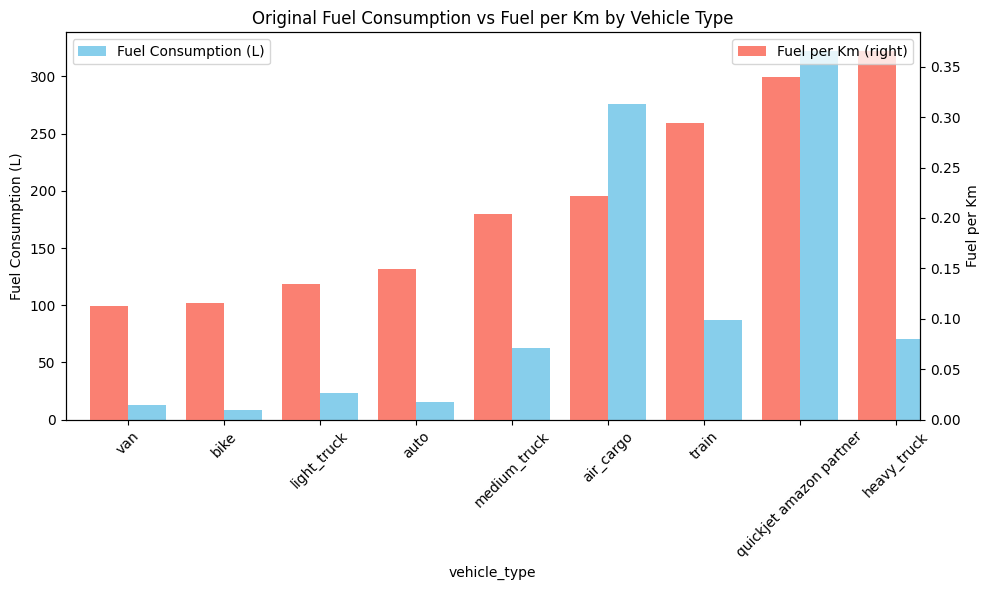

In [133]:
fuel_compare = df_cleaned.groupby('vehicle_type')[
    ['fuel_consumption_in_litre', 'fuel_per_km']
].mean().sort_values('fuel_per_km')
ax = fuel_compare['fuel_consumption_in_litre'].plot(kind='bar', figsize=(10,6), color='skyblue', position=0, width=0.4, label='Fuel Consumption (L)')
fuel_compare['fuel_per_km'].plot(kind='bar', ax=ax, color='salmon', position=1, width=0.4, secondary_y=True, label='Fuel per Km')

ax.set_title("Original Fuel Consumption vs Fuel per Km by Vehicle Type")
ax.set_ylabel("Fuel Consumption (L)")
ax.right_ax.set_ylabel("Fuel per Km")
ax.set_xticklabels(fuel_compare.index, rotation=45)
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\3294298598.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_compare = df_cleaned.groupby('vehicle_type')[


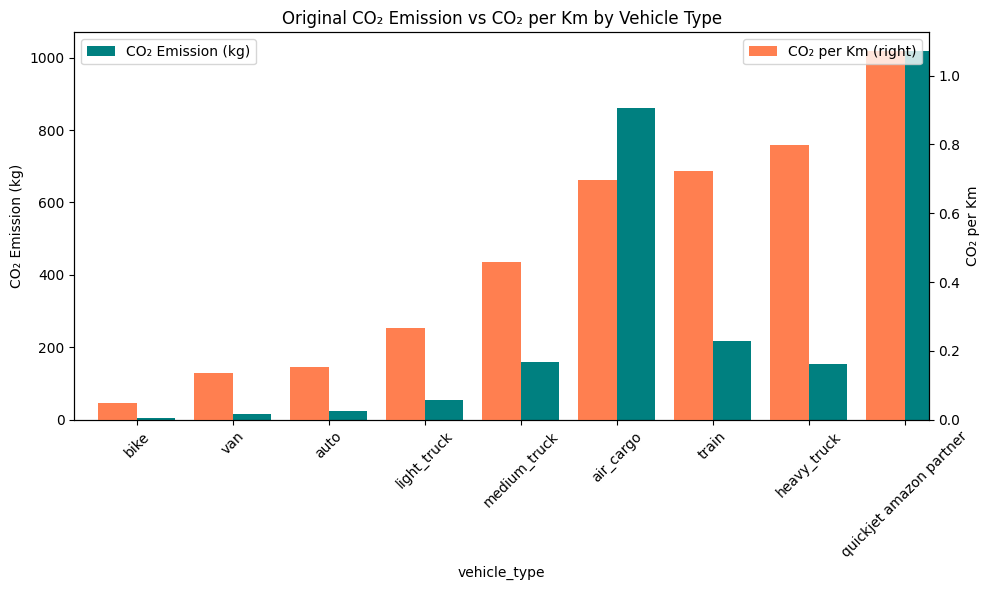

In [132]:
co2_compare = df_cleaned.groupby('vehicle_type')[
    ['c02_emission_kg', 'co2_per_km']
].mean().sort_values('co2_per_km')
ax = co2_compare['c02_emission_kg'].plot(kind='bar', figsize=(10,6), color='teal', position=0, width=0.4, label='CO₂ Emission (kg)')
co2_compare['co2_per_km'].plot(kind='bar', ax=ax, color='coral', position=1, width=0.4, secondary_y=True, label='CO₂ per Km')

ax.set_title("Original CO₂ Emission vs CO₂ per Km by Vehicle Type")
ax.set_ylabel("CO₂ Emission (kg)")
ax.right_ax.set_ylabel("CO₂ per Km")
ax.set_xticklabels(co2_compare.index, rotation=45)
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [134]:
print("Top 5 Efficient Vehicles (fuel_per_km):")
print(df_cleaned.sort_values('fuel_per_km').head(5)[['vehicle_type', 'fuel_type', 'fuel_per_km']])

print("\nLeast Efficient Vehicles (fuel_per_km):")
print(df_cleaned.sort_values('fuel_per_km', ascending=False).head(5)[['vehicle_type', 'fuel_type', 'fuel_per_km']])


Top 5 Efficient Vehicles (fuel_per_km):
      vehicle_type fuel_type  fuel_per_km
155           bike    petrol     0.005740
1936         train  electric     0.007583
1008   light_truck    diesel     0.008088
1311  medium_truck    diesel     0.010680
41            bike    petrol     0.012381

Least Efficient Vehicles (fuel_per_km):
      vehicle_type fuel_type  fuel_per_km
1818         train    diesel    15.830833
1795         train    diesel     5.587353
1827         train    diesel     3.582308
1540  medium_truck    diesel     2.412587
1817         train    diesel     2.373694


In [136]:
print("Top 5 Efficient Vehicles (co2_per_km):")
print(df_cleaned.sort_values('co2_per_km').head(5)[['vehicle_type', 'fuel_type', 'co2_per_km']])

print("\nLeast Efficient Vehicles (co2_per_km):")
print(df_cleaned.sort_values('co2_per_km', ascending=False).head(5)[['vehicle_type', 'fuel_type', 'co2_per_km']])


Top 5 Efficient Vehicles (co2_per_km):
     vehicle_type fuel_type  co2_per_km
1776        train  electric    0.006292
1792        train  electric    0.007719
1936        train  electric    0.008054
1920        train  electric    0.009572
160          bike  electric    0.009900

Least Efficient Vehicles (co2_per_km):
     vehicle_type fuel_type  co2_per_km
1818        train    diesel   42.426667
1795        train    diesel   14.974118
1827        train    diesel    9.600513
1817        train    diesel    6.361532
1796        train    diesel    5.791538


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\2233780600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby(cat_col)[engineered_features].mean()


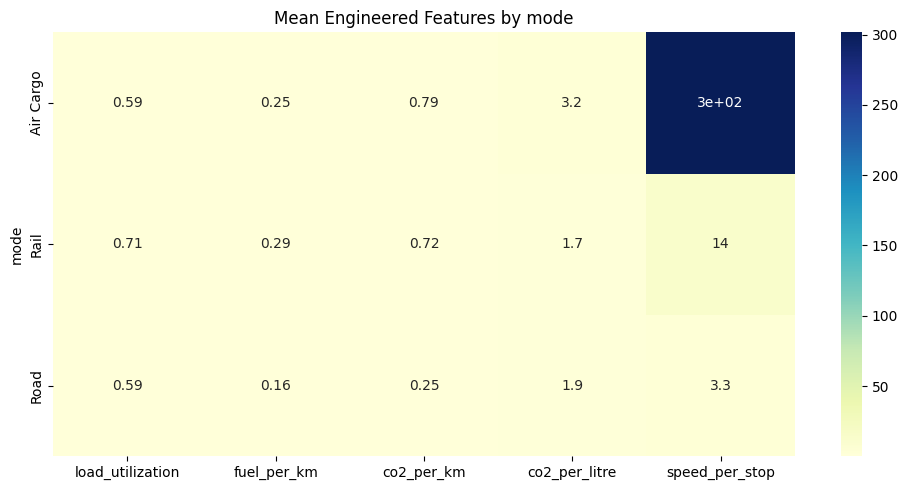

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\2233780600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby(cat_col)[engineered_features].mean()


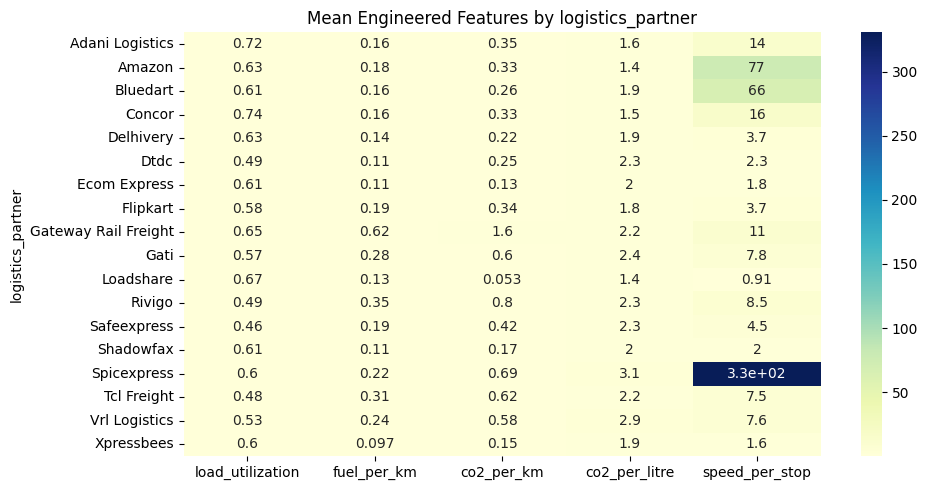

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\2233780600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby(cat_col)[engineered_features].mean()


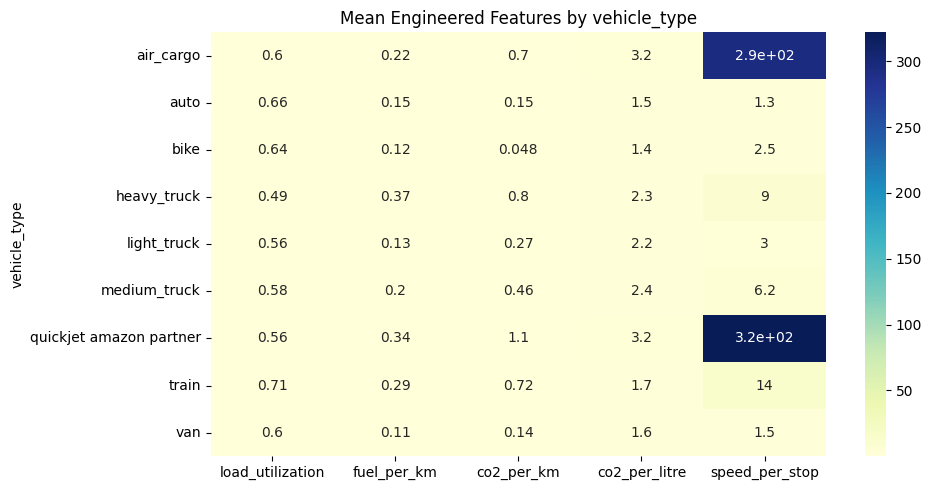

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\2233780600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby(cat_col)[engineered_features].mean()


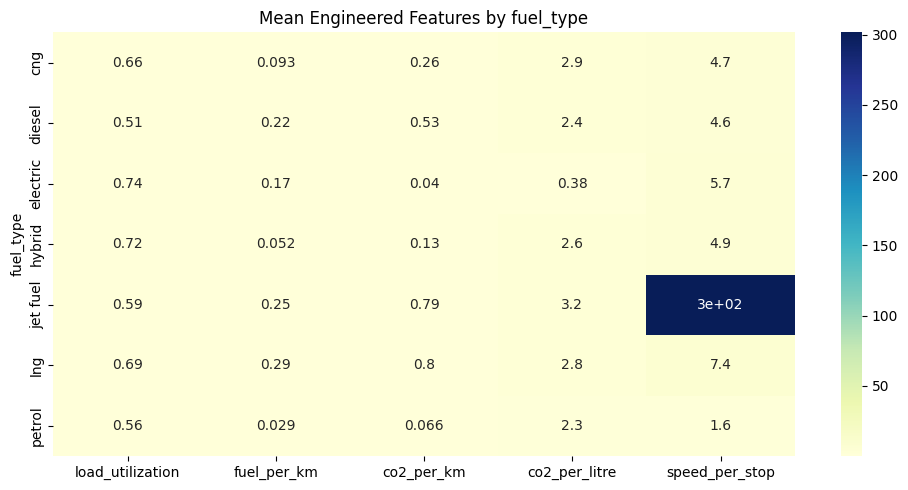

C:\Users\acer\AppData\Local\Temp\ipykernel_12308\2233780600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby(cat_col)[engineered_features].mean()


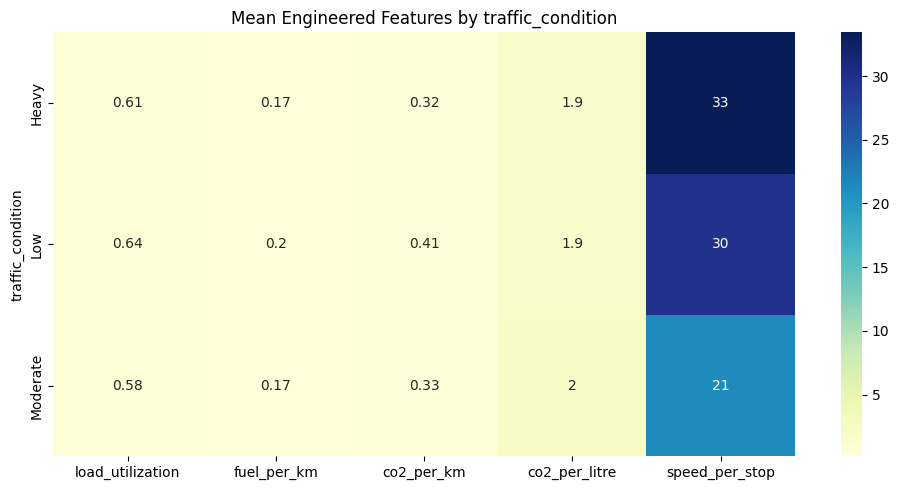

In [137]:
for cat_col in categorical_cols:
    grouped = df_cleaned.groupby(cat_col)[engineered_features].mean()
    plt.figure(figsize=(10, 5))
    sns.heatmap(grouped, annot=True, cmap="YlGnBu")
    plt.title(f"Mean Engineered Features by {cat_col}")
    plt.tight_layout()
    plt.show()


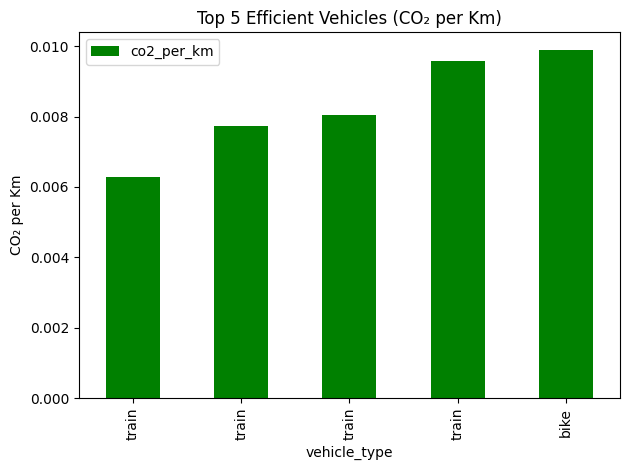

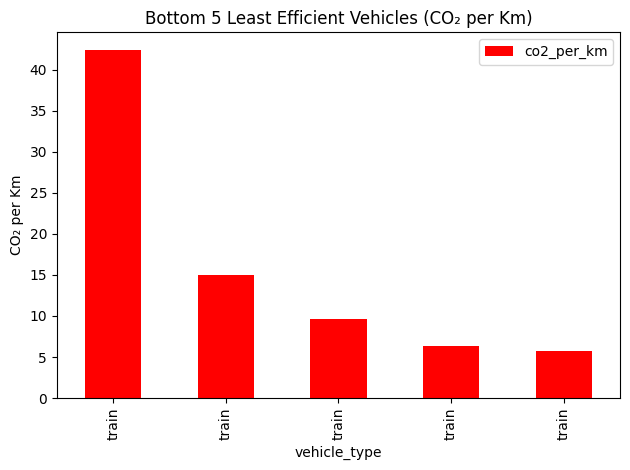

In [138]:
# Top 5
top5 = df_cleaned[['vehicle_type', 'fuel_type', 'co2_per_km']].sort_values('co2_per_km').head(5)
top5.plot(kind='bar', x='vehicle_type', y='co2_per_km', color='green', title='Top 5 Efficient Vehicles (CO₂ per Km)')
plt.ylabel("CO₂ per Km")
plt.tight_layout()
plt.show()

# Bottom 5
bottom5 = df_cleaned[['vehicle_type', 'fuel_type', 'co2_per_km']].sort_values('co2_per_km', ascending=False).head(5)
bottom5.plot(kind='bar', x='vehicle_type', y='co2_per_km', color='red', title='Bottom 5 Least Efficient Vehicles (CO₂ per Km)')
plt.ylabel("CO₂ per Km")
plt.tight_layout()
plt.show()


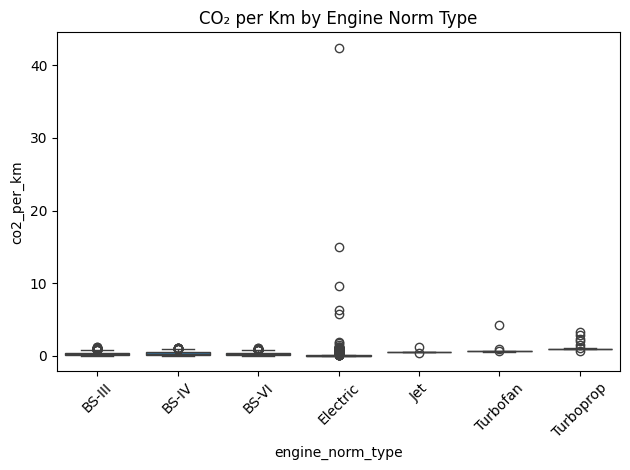

In [139]:
sns.boxplot(data=df_cleaned, x='engine_norm_type', y='co2_per_km')
plt.title("CO₂ per Km by Engine Norm Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [140]:
df_cleaned['high_emitter'] = df_cleaned['co2_per_km'] > 1.0
print(df_cleaned['high_emitter'].value_counts())


high_emitter
False    2057
True       52
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\1548080071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned[df_cleaned['high_emitter']].groupby('vehicle_type').size().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='crimson')


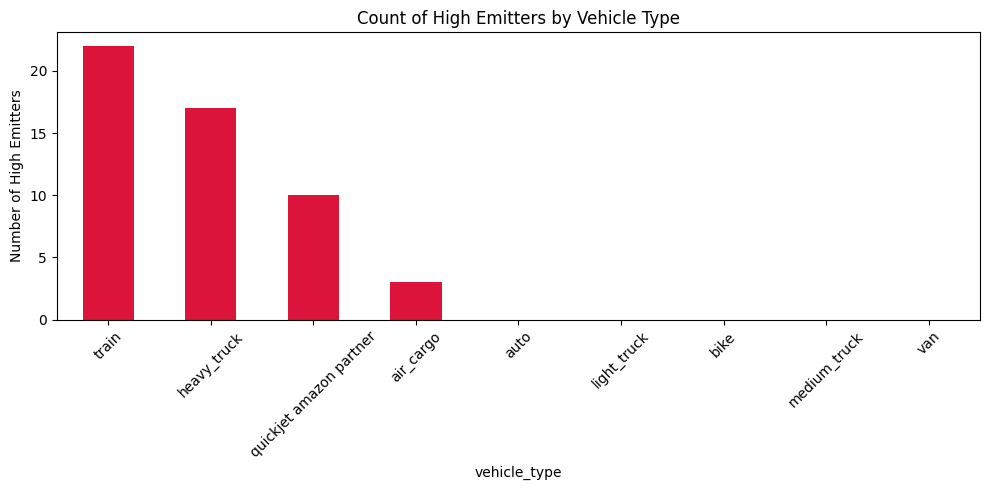

In [141]:
df_cleaned[df_cleaned['high_emitter']].groupby('vehicle_type').size().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='crimson')
plt.title("Count of High Emitters by Vehicle Type")
plt.ylabel("Number of High Emitters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [142]:
df_cleaned['efficiency_score'] = (1 / df_cleaned['fuel_per_km']) + (1 / df_cleaned['co2_per_km'])
df_cleaned['efficiency_score'] = df_cleaned['efficiency_score'].replace([np.inf, -np.inf], np.nan)

# View top 10 efficient vehicles
top_eff = df_cleaned[['vehicle_type', 'fuel_type', 'efficiency_score']].dropna().sort_values('efficiency_score', ascending=False).head(10)
print(top_eff)


     vehicle_type fuel_type  efficiency_score
1936        train  electric        256.026331
155          bike    petrol        249.973604
1776        train  electric        208.982046
1792        train  electric        173.916358
1920        train  electric        148.841086
1784        train  electric        131.460505
1008  light_truck    diesel        126.962767
1775        train  electric        123.900543
41           bike    petrol        119.183865
160          bike  electric        117.880145


low_efficiency
False    1582
True      527
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\3883992273.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned[df_cleaned['low_efficiency']].groupby('vehicle_type').size().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='orange')


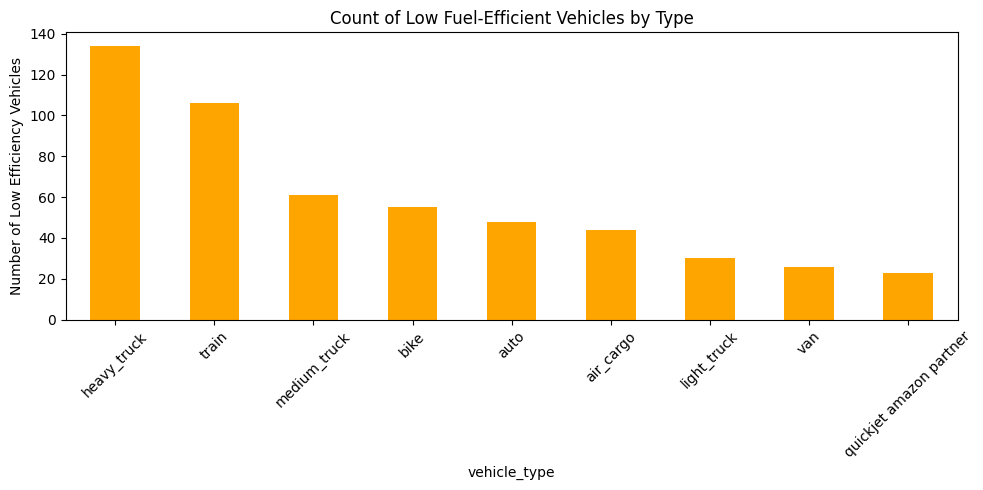

In [143]:
df_cleaned['low_efficiency'] = df_cleaned['fuel_per_km'] > df_cleaned['fuel_per_km'].quantile(0.75)

print(df_cleaned['low_efficiency'].value_counts())

# Visualize
df_cleaned[df_cleaned['low_efficiency']].groupby('vehicle_type').size().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Count of Low Fuel-Efficient Vehicles by Type")
plt.ylabel("Number of Low Efficiency Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


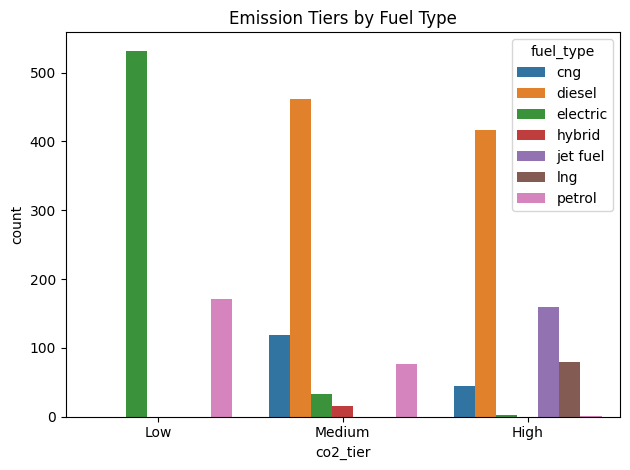

In [144]:
df_cleaned['co2_tier'] = pd.qcut(df_cleaned['co2_per_km'], q=3, labels=['Low', 'Medium', 'High'])
sns.countplot(data=df_cleaned, x='co2_tier', hue='fuel_type')
plt.title("Emission Tiers by Fuel Type")
plt.tight_layout()
plt.show()


In [145]:
filtered_df = df_cleaned[~df_cleaned['logistics_partner'].isin(['Unknown', 'unknown']) & df_cleaned['logistics_partner'].notna()]
logistics_efficiency = df_cleaned.groupby('logistics_partner')['co2_per_km'].mean().sort_values()

# Top 5 most efficient
top5_logistics = logistics_efficiency.head(5)
print("Top 5 Efficient Logistics Partners (Lowest CO₂ per Km):")
print(top5_logistics)

# Bottom 5 least efficient
bottom5_logistics = logistics_efficiency.tail(5)
print("\nBottom 5 Least Efficient Logistics Partners (Highest CO₂ per Km):")
print(bottom5_logistics)


Top 5 Efficient Logistics Partners (Lowest CO₂ per Km):
logistics_partner
Loadshare       0.052934
Ecom Express    0.125398
Xpressbees      0.146282
Shadowfax       0.172183
Delhivery       0.216816
Name: co2_per_km, dtype: float64

Bottom 5 Least Efficient Logistics Partners (Highest CO₂ per Km):
logistics_partner
Gati                    0.599819
Tcl Freight             0.623101
Spicexpress             0.685783
Rivigo                  0.801286
Gateway Rail Freight    1.628318
Name: co2_per_km, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_12308\3048816623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  logistics_efficiency = df_cleaned.groupby('logistics_partner')['co2_per_km'].mean().sort_values()


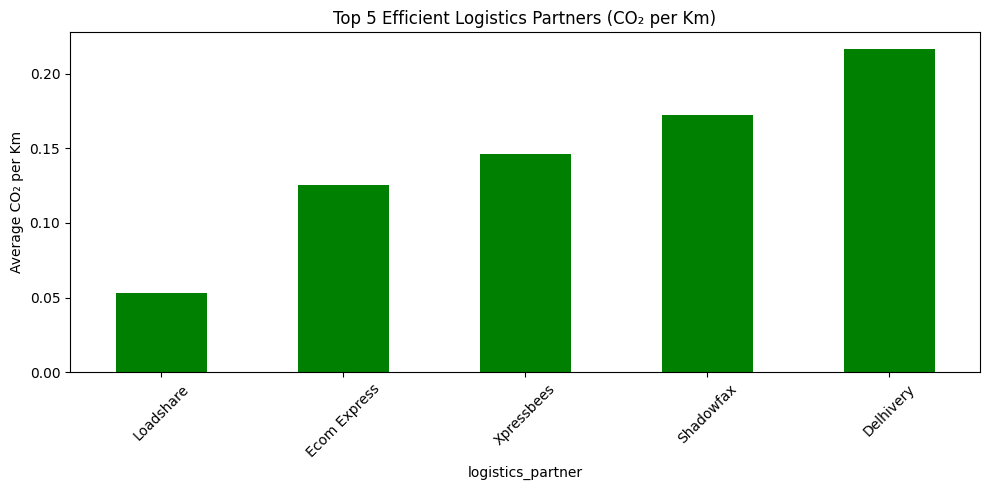

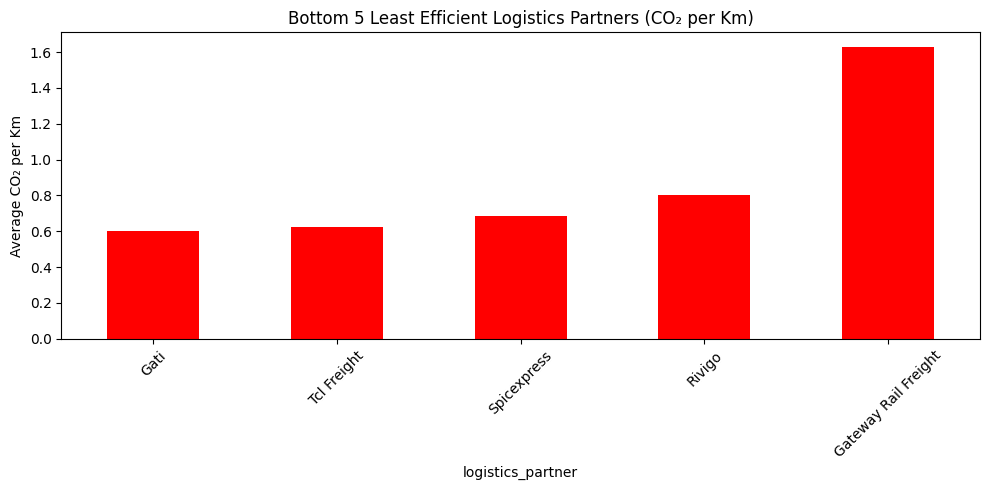

In [146]:
# Bar Plot
plt.figure(figsize=(10,5))
top5_logistics.plot(kind='bar', color='green')
plt.title('Top 5 Efficient Logistics Partners (CO₂ per Km)')
plt.ylabel('Average CO₂ per Km')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
bottom5_logistics.plot(kind='bar', color='red')
plt.title('Bottom 5 Least Efficient Logistics Partners (CO₂ per Km)')
plt.ylabel('Average CO₂ per Km')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [147]:
df_cleaned.to_csv("../dataset/carbon_emission_final_engineered.csv", index=False)